In [1]:
!pip install timm --upgrade
!pip install accelerate
!pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing inst

In [2]:
import transformers
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
from transformers import AutoProcessor, AutoModelForImageTextToText


2025-07-08 06:50:00.026159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751957400.212049      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751957400.264099      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import kagglehub

GEMMA_PATH = kagglehub.model_download("google/gemma-3n/transformers/gemma-3n-e2b-it")

In [4]:
processor = AutoProcessor.from_pretrained(GEMMA_PATH)
model = AutoModelForImageTextToText.from_pretrained(GEMMA_PATH, torch_dtype="auto", device_map="auto")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
prompt = """ what is the old capital of india during mughal"""

In [6]:
input_ids = processor(text=prompt, return_tensors="pt").to(model.device, dtype=model.dtype)
outputs = model.generate(**input_ids, max_new_tokens=512, disable_compile=True)
text = processor.batch_decode(
    outputs,
    skip_special_tokens=False,
    clean_up_tokenization_spaces=False
)
print(text[0])

<bos> what is the old capital of india during mughal rule?

The old capital of India during the Mughal rule was **Agra**.

While Delhi was the capital of the Mughal Empire for much of its history, Agra served as a prominent and important capital during the reigns of emperors like Akbar, Jahangir, and Shah Jahan.  Akbar shifted the capital to Agra in 1556, making it the main seat of power. Agra's strategic location and proximity to resources contributed to its importance.

<end_of_turn>


In [7]:
image_url="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAPPAtIDASIAAhEBAxEB/8QAGgAAAgMBAQAAAAAAAAAAAAAAAAECAwQFBv/EABcBAQEBAQAAAAAAAAAAAAAAAAABAgP/2gAMAwEAAhADEAAAAd4NUDslfTel+jPeFV1MqvotJlUUudDLSkLilF6pZaVSJkQkIBpjEDEDcWMAHFjABpiYAAMAAABiGCGAmAmhpgmmCYAAhggYgYmAJsQwSkhjBAS05t5nfIOuZ3wFB9ebjKaQvV6PQtBTTsoWq+N6QkNBpWSIigARZEIWoqVwtJcFJaypXIrLWUq9rVYVxaUiXOkW50CaCiRaBQ0DE0aAYAAAAAAAANANAMEHOOg+dos0lF0sgAAAYJSQwAAAEIYvAM7q9VWWRvloK9Fl6ZKuhRNZrLb0yGssyGtRmNLMi2Ksi1hkNSjI9RWVanGVayshrIyrYGa50re8oankZqMoajK41xpvKlcS1FyKy0Wl2sCpFxSy5UiXOi0mkwAsaAYgePYHN5vpDU830OnWWmaObrK7BiYJoYAACAAA4Lzq3S8zs0yz7RX3XyY6elRNZLbr7MRtExPWzGtiMhsRjNYYzWGNbEZDW1xmxpiNqXNfGpNKyhrMjNRmRqeRmp5JrbVezM9AZzQzMtTjLdOpLTOLpWcNJmDTXVetbtIqLQpdqG6Rbilpa6GXkZAIsqq1hkepmRbEV2UQNSyhqMoaSkOU0NMqZffi0Jt0YdBdnlmmr5QvSk0NnM9AuY0FZ1pUZ1oDMaEUSnWSlSi50hcUstKQudDLnQFzoZc4uyUJBnWkMz0BmNTMhrZmudBe8waDOGkzBopVxQaQzGkMz0oToiaTOGkzBdEtlqLkVlrITriXqpFrpC4hKnFhSWicEuU0mnZLRn0Jo057wybMM1psjK5TTRAAAIBRAEWgQhiYAADAAAAaYRkpai2RQXhSXhQtAud3oTrRcUhcVIuKRLyiwlRoVmY0hmNLMpqCuyqo1GYNJmZbUryk0hmegKLykvWcNDzMsjGyIO1LUWBxxCji7J6M0zbp5+mLsV+NrougZuKOFqejfl+onTfMyL3TDdF5QLaVRLo8u2ze8lstzoIvKazWZJVpdciQkTUEWlbLHBpIixgA0DAATGmoAFKrQoLwoL2Z3eopslVVpQ4uKSrygL6ZyTOaHWZ6GZpXxGUI0PMGimLErpGY0lcEmZ3WTdi2ZtFmnThmmvC8ub1TGtZ2+a7PlOuPbVeX6cphjXqeiv575613cGqvRHF25vJ08e/tjv6eHt5a6EubZm7ubow1bvwbzgd3g+hqCm+eqo6Kqw7+P3rK3YZ1WWyKrFWXGblWd44vUi50RNL5brpGa2LHASZFkkgYgYFDCAAACuF4tJeFJcFNk6yZUFjpC4qBQ0FZjQJ5p6S3K9IlN70Et2fSksG3n510Vnrs2eZ7XA6Y9Vy9HOlxygdcejzGbnvndDmdHecPpfM9vF488q6Z63N73DzeZK7R0nouR2uTx3ypdvlbzU7q6hs5PRIbep57NfS8d72zFd5zr5vTvj5zGvSS8X1NTp805mp1PQeO3R6TPTLnuvhei8/vPVy93gx2yw57rydDj2dKjRUXQ1QlJwhF5SVcUhc6AvK7BpCSEEhA0wTTUTRUrmUloeepsv0yPUJn0S0ENEtSZM3Vw53pmO5ZESSSJEQaSJJIaUQi3VMdETItZVFO0OLq6UbOZi9FE8vt7xWLkelcebr9Q68rX6rPZs8/1K83g3dqjUyLVRUOhi1RZ0eVsxq/zvd4dnb8r7Tz1mParaywLLNe2y/lvJPRzje6IxqeRrrWUNhmiaYRulonNlcbmVRvBypRa6JFpUi4pmTAOGoDUysSV0dVGlaZKMfTxTVruLnJze6XPAfddcFd4rgrvh5876OAd+JwTuo4Mu6HBO8HBO8zz8u6jkW7KQty0R1HyFXYlxXHajxw60uO17L4odt8e+OiZNBaRCNGgTPXtDm1dcrztvdlZx92olzQ2URh1SK0rORpVCNRmCddlxkNgZDUGR6mV210rpeVmkzBphSExkclNNJp2S0Z9CaNWXULDsx51sbNZQxIkQZKIwATipFoQIYAxANMAQwAGhgiQmAMTCBoqGfYHNo7LrhncDhvticN9xS8RdwONf0Kajbkok6j44vZXIsOmVEtrpZe6ppGq8M5odmY0MzmhrnvKS55g0mdGmNCLCsTnKtTcysq+/HoTbq5+qLcduWa6SpdzOIkrZMUbolbsCtygoRiWFAXFIXFSW50MvVAaChlss7LygLpZw0OqxGAMQNoJCBiBiEbQAA0AMAAAAGmCGVwvFpV7KC8jO7mUSsjUnSFrpFuKRLSllhETikaLq8yu52aOdedHVwOomvDLPnXReRazqWJm0ws3PCzcY0azGGuOVGkyhqMoaXmRpMqXU8gm14lLuMUzW6bCTiLGFuE0uyUUu1Fbsa0u0KXcRSXhRO3ztnoXQpbykq8oIudBZeUEXlKrQeb06z23w+xLYJwxAmmAmDASklbjJBNLWWB5fQFN102a9HM0FPo/P77ndmrqxvqrKrnQs8K1HANZ9Eefivol55noI8AO/HgB3jgI9AcBHoFwUd9+eZ6A4U47b5Fi9WGO6JV6JGU1Mycr0HndSdWvB0z3ndZx3yc9mLrnuOnpctYXytu5uu8uR6rz2XPrPs1lOXTU8YazIGt42a3ihHR5OXp6nCXcp3Odbl6cdEtlz3SXoodziicq6vM7i5VFXFLLikLSoPOPUVRcBZfmvNerHrSumyGdahFyRaK5wnUoiiSCkERxcQQA0iTiiTiBCbM1e0s5tXZVYpbFLlNZGXn9wrzuf1a1nBPY868pH1z1nhdW6rN4GvD2emeJ0N+KXDZ0MqdmXH3Y1qMjjWZA1mQNZlDg96rJqbFtnm4Dfls4nY4fqqzLWs3KagourqNRlDUZkusyhqMwaDKHJLlNUlpUL46EeqvZGKGpTUVpdxmNAZnezKtQZy8My0pcxoiUF6KS4KJXJaS5lJbIzu9lBeGc0BnelFdkIRes8i50FXlDLXSHD9Hx+jZc6Vm3lIXFBZeUzLBMBCFdpXB6OLs2cXF6gTzd3eK891+b3oyGszcj1FU2V0mt5RdRmRqMwaTMGgzhzAJUIqWjPemnXi2FQnnVzrNZsUBJlbJoStIBOA4iBxBiBgiQgbTATBgAAwBgQADEwAGmhghgAAJgqhYFBeRQXhQXhk5Ho1ZjuwV10OPr6xkt0GbTY4E3Qq0Kki8oZeqUXuh1cUWEgDhFaanBySF8dBLVVsTIrlNRNEbml2tM7vitbtZnL0Uq9GdaKyotZQ70tM5RSUqUt7zsvKGXOgLyhlss7LygLykjQqVWh5w0GdpeQmAAxACEkRajQjEDEiQmMQNxYxMBBIAAAaYoyQ2mKu1LUWBwVmK0GYrXdguTbo8p665zK6WN1x2rWcT2MxrYjK9KKJXRK2VFyzxNRkDWsoa3jDWZYmwxs1vGGx42bDIGt4pRrWTnV3TEza8t0s5RcSSZ5zu8L0epSXLOqi0Ki1xSXK2p2klRaFStdtRa5KS4K5vFW/nZehVNVWOz05Q824oUaCgq8pRpM8i5RkABwDMVoWcs1X8+0h3/OdbWdRkXPfSjkNZ1xzRJvEtZ3S5odR8mB2HxIL3jz6rvnnyT0B58t9A/Ph6B+dZ6A8+R6F+eR6E88z0JjebseWyLvO9/gbmLdLl9cexrvOHTznO0ZO/P1j1Ph08tKFnXGiqjYLoZuRm9bfDbjWU1qMhrZjNgY3sS5VStZrdWuqtC8ynWx9S6vP+ng83YZDN1PIzU8gutZXGsomFdzKC8OInBoK0XaMN9bdnN2SCgprWUK5vedJpVKL5ZpFxSluVKLVSFhWybiyQFJgg0QxMYim4gVXhljsDDHoOzGbHLxafQGphlsM3jQ7pZwcnqSzmed9fzLI7tpjWI2i4jaGSWiApVVpyO9y+NudSvXXZ0Ycm+Xty5xm9E55G8yi61mSanlDWs0lnCyxMj1oymoOA7FOkQSS0Zr7L9uLZFYE1fCauE2UgQwIEIE0Ri0sY2BSXBQXhS7WUlzWguZSXhQXhQ7pFC0BQtAUF5FBezOaAzvQipzrPNeppNS4pM250BcUhcqirikLuXuE4kNmjecfeoMavKHF5nZoVBVxTYTTSOubM8dQZTWqymkOKiM00KpX570v24dsQBZ1oEawxBERRKLGkQ0lSi0AgkKJJxImRY3EJCSzcQbiDcWjaYADIg3FjEwaAaBpNQBAAAAAAAaAYmAAxMAYJiwjYFMdLMzvIpL0tKvLM5oDzysi1WWIhfC5LNVGwojfDOpFprFauRVDVAzzskUl0SuFyKVdErLBay1FTnIqdoVFsjO7gqdyKpSjE3XEvM7NBnZcUlXOhRoKHV5QReqefZ1iklvKUXqpFxSFzoC50FXvORopXF1JW9aSZN3J6wwJROI3ESbiDBK3EGRYCK8wtaMhrVZbL5Jh7HH9JZjhujjdC2vWMZtDEtqMM9cjEtyMC3owR3xMRtZhewMc9CKmBKdETRLGLtMbTYsouwxhswWcuzvnmbrPQPIY1rfm5bz6JZVjWp8A1ntcSzDuesjwulz1sMjl1LKGsxhrM0o0lLLivHWfoZtdlkbOdNY+tXsKS4ilXhnd7KXYylXpanZIpVyKS8k8uty0wm1GSO2+zidvRss563rG8h0VrGGjqs80ejNTzku6zhPtQORLpROebIFEpwHOqJplhR0p8cO0+FA9C/Oh6I89cdsyPOtRlI2ed63P3nJqyX9M+ijmhx3yM0od+fsDG+HTiyiuuLYQor0Gbk9HN7j5uvlu4rkTSZGFyKKtqMXK9HytZlzO5rORkt7pzrNjzcprS5o7EmV6gymoMhrFyvSGR6WZjUHEUYzpNQSWXZb01bOfqLCpZ1tjUaxas8TWZrC5VIuVKLVUlsjBFpSFxSy10stdIXFDLo0svKguK2lsUxgDExiAAGIGIJIBxYQha0zx1IyrW6xraLiW0TFxujxemdd/W0ZvK07Vm43sZkWtmRbGYzWzGbAxmwMj1hkW1GQ1hxYyjNJNBdTdZfrya4QE1cBcVxtdQmECaCLQRaIpixkgGmAMTTGgGhEkMiphWWi0F4UF4UO4KS8igvCh3BSr2UF4UF6KDQih3Mzu8M9G6FeE9bz/RbzQXSxrOaFFDuZQqttULSRnNECuRGrnQRe8zq95wvKA5irS2KpF1uS1N2rBsJOBLoSLgABqJYkwQgiJRERkWSaBiCRFjSBiCTiwaCSQMiyRFjEEkmDQMEMTGhEkgbiDaRIiDBDEwaBgIZL+PqR7uPaNozWJEiISEA01GmICziLLKavKpE7Kbav05tUkYWxmg0FxQXooLxc87GUxvRSrkUqwKnMWJYFZYECxFZMIOQRJkRGxEpVWTREsCslJaywSBYFZYRU7RaS4Sh3OqC8il2IiyJJ1hcUovedGgo5lSsx9jWdSoM6vKFF5ndaFSF5QGkzyLilFpUHJjMrPDUkyzvw6lPe4vprMi2Lnuk1vWMRtDE9iMRsZjWxGNbEYjXEzGlmU1BleprjWwTItiXGbGY5aXGV6gyvUVjxdXz+89K/zndLzZXjWWfEr6Z78tK5apPKrrj1s/J6pfRPz2Y9W/Ks9SYjGthjDYskTa8Mo2GMNpiVWczNs3np6MRi7TE5dqyI1yxhsMga3jDY8UjSYpGsyhx1tTWOOxGSzROzNqv1JkjthnVRsesYsvXK85H0rs8w/RuvMr0yjzK9KjzR6NHnH6IPOr0gecPRs84vSh5o9LFfOP0SPP6+oRVKRmjig4fbW5xjsPU1c3Qc7wV2p9M7XkOe+Q+kbzzY9KdLgdSuzVz11Y028zVz3pMyjS8lVdFc8ToPn4jt+Vtr6Zt9NzZ5u988zegc8OgsspdDyibFmRqMwup45F7zhoM4c2OhZ6Z46FZRZOZbry3JfCtZ1sKTWblUJaqkWqoW1VIsVSJlaLHSy50MtKgvKAvVSi4pKudDludDLnQWXlLLZUMuKHLeqQuKWXFUavKHJbyuhz9zVsw3y3lBFyqReUMfOoW8zydjFZ3ONVvzdz5W6W90OLlWFqrZYQCxRZOIhyjIAVMA5MZRlSaCdc7NOnNoiQpTVyUbiZGVCjEnFMIyiKLiCEDTgAGhg0laaAQOUQkRY5QkMAkIJCBgDQDEwCJITAEMSGmgaAEzgbtfM6Z6fGv60ZtiedJpwlIIFiIEpFauChaEUO6S5jQJnLw5SpJqxVqrZUSN2jDoS+Wa3OtBTHWLp5kXSysulQi+NIWRgElEJOLGJjQDTAQgaAGA4scoMmRZJwCZCY0mskgkREkIGCJJIYgaIkkmDiEivm6nWOVcb3B5siITIomk0aUatihZxaG4MkkxiDkrMF6oiaZ4667Ojh9FNV/Nvxrasi1nZHOzQVTJxREYyRCNkVrjYiCtCotCotFqV6SktFpVwVObKnaFZaFbqsG5yissKg5sqdgVlgQJsgWBUWBUWBWTCCsCtXc2zN1a82pvxOUU9DkdxanYZtauCotCpXxKpWMrVwUubKyxFJoDkmYsvWdGnFPPqb+t5ntpp1YduNzi1cQpvpIFllZo7VGJa1WOO2JjNRGU1BlekrMtYuRbEmNbEuQ1hklpIyvSGc0M5VF0euc/Q5nYLjQ+esPK7XK3l9XgeojP5/1PnapnY9TTl24DZkr7Ji6PI9BjWU1LFy1byufl7VdnmujLdvPLzatBwvR5OzGG7QY1nd7lzvQJnWpLmeh1nNKjMaAzGh1nLxOcqrM9CMoopxdmqyrQZrltlxrarjDh7KrgHoHqecXpQ8yvSI80vSRPOHohfOnog86eiaecfog86vRpfOr0aPOr0SPPb+mRkNZm5JaWcinuvU830elIyvU83lYPSPU812tRLl5neDhHddnnq/Slec6PSccC7soyGtZuWOxVkermWV47dO88SPVt1LtGPXz2T1GLmNIZnoZmWpGZ6GULUjMaQyvSGU0lc6m5Z1Qr4lLskTuLzNrp3TWdaVcY56IlNjiTK4F0aUWRrS2FQWlQXFLLXSi9UkWqpVaVBa6GXKpFzpC8zyi8olbc87i+Wdl6qC5UsudAXlKq9VKS8odWlIXKoM1MJ7zHZmiX5Ofp1N+bqc3N68ubtxq10ovKQuKQudDLyhF5Qy4zsvKAzJIItCadmq6i+IbsWyaaI6wyDG0DQEYzgRTiCCBoBiViBoBJoBANANAxBITG4sbixuMhiCSQSQDEDEAIGCGmqzyuEzakzLDY6KLyKNCBiYxBITAiEkIJRY0IYByCxZ3Sro2VSmGq/HcWbebsmrK1C4sIQNKpZeqUWxriWKpLYVIuKQvKAuKQuKUXKmJoVKLnQF5na3lAXukS90C6CgL5Z2l7zwNZktLiig3KoLSkLikLipFypkWFXPrqnEhc988/I7x56S998Sw60qHm2ukLymJa60lxS1tKgtKQtKiuUtSTLHWjLdPlWd+/g9M07eTrzrUsprGlZUaZ4WbTGo2RypdKzMvVQXKAWEGSUSWSSJRiiaiVIgEiAWOoLVzN5cUhoKEaTOjVz7sGpq38nZGvz/AFeHqemMpi6XkZqWVGwxhrMTMO/zvR657qxvndiyQNzwzNmR56r63l+9WszGLpWcNSzM0qiJpM6q95GaigOatilxPXUHN11WW9ji77NO3lasb1mRXGqObBZ2Jcaddc5s5d0M4W1sK1aRQaCsppFzQ2KMhrDEtirItYZTWozGlFDuF87C/X2xh7/mPTZT5vX83LHqc7dudbkdjmc7j2U1bhjtjvMvTeb7PPWwRz0wQ04jIhxy+jrjj9GPeryU/Uxjy+X2fG1Ft1cvF19XBPOtplMtRmK0vMGqOdLpMzLZZw0GYKGV43JQjZN1Buvx60W7DtlYjWSEgy16yzBHos5NfajXCh34nAj6BHAXfDgHfDgL0COAd+JwV6CJwDvC8DpbHGM1kuU1o5x0yzidPSzLR0mvI0bxMq2EvOh1CzDHohge6JmNRLlWsMpqSYja6w+b9j5zeezLz+46j5Ll6OLJO57XFx9xegx89AgkRkMQri0MTAjEmQDInGVRlFEmGiUdBRtz7pqg0K5oWhGeOlGWdkyiOlGWOqC0FqK20DSGRCSUSSSJRAEwirAgrZFDulLQ7nVJeRS7mUq8KS5FRcrKnaoqdpVJcFSuiVlyKlcHLyd96nFO0JxV22Y7rjNpLwzl4VlzKVcFMdMVodzSktCktKwqtZ1OMFZMQmq/PeG7BulbRrJBSAiDEwTRCM4CTQAoASsQCASEJoATE0USixyi4coMkJjAGANJghgJjEhiBiQwBoLG4sHFjcQkRCaQSSBuLCUWNCVkWNAAg55mDRHOyam5Z316CrZm6EtMrK7mcs4XFIWqpF6qRZCEVsKQtVQWFQWlSLSpFiqCx0ouVQXKoLXSy50Nbill5Sy50MuKWl0aOfXYKSLnw+tVxVGLymJoKAtKwmlIg5sqLgqLQqdjStWspc5FRaitWhUXBUWBWTZUWlYDMjTVVcZqOhTZm6mfpGXXDoZ1RdDPrGtZQ1PGjWsrNSykaFmiaDMl0mVGoyo1mRGuOWJrMiNRkF1rKGoyhqlkC+fGv1Om+TrjYZMp1jg9Q1GbKdDk5p7z335+/Nr7vkPTaajMc7pMqNRlZqMyNRmDUZQ0rkdKyyEpy1LQ0zO8rOtQZjSFCvZnWpLmNIZXoaZjQGNQnncMuuKZKOiVm2T0JR0sF81pWaOsa3j5dnoF59V6A4Cj0L86Hoa+DE75wpL2TjzOquY46SwBtWNLrMSNphRvWPZDEK0kcTNc+3Ofe8f6jGtPE6XnB+m8r6DU38Hq8nN7Pmr7t56/Jo0Svu+c2x1nlfPWqOcNJlZqMzL3mDTCkrk+gyuzUZjN0xoZYiRCOkrK9IZTSzMakZnpDMaHGU0BkqujNUwviUTlWadOHQWdDlbpb1Srm5RnYk4k1FjQiVc0Uw0Iy17FWOO4TBHoo5q6SXmx6cTnHQZz56yXKagyvSiiVrK5yAGA0xiBtMBOAGAACQ3Wi0pZaVpbXSJcUMudItrpaWlSLioLXUFyqS3FKNEINHGTKywXMhEYyiii0W6sukW/n9CVoes113EUFwtC0IodwUx0Izq8KFeLQXBQrwojoRnWiJSrkUl6KVeFBcFLtCtWhWXBU7QpdoVlrKS5FTtZSXMpnMISBGIGJ0AQAUyMgARiBoRJxRMTCMojAAEAg5zsU1UWQBVhfpxaCzo8nqysUdYEICLJOLGIHFoQAgBAgAEmoimlQFIENCAAGnA4yBopiYxMYnDEDEVITGkDEDE4ABoAIwLSkW8oaXFIXFIXKoq8pIvjWltKgtVRVpQJgekMsr6SSoRs08vSX7Of1s6phojc0q4KJWszu0KpWIUq4lyoFuKGWlIWlKLSpFqpCwqiXqkLSpFxQy8zheVMkKZAsZU7GVloVOxlLtCotCssZS7UVOwKy0SpXohKQARqRXBLzNIulnVaDOzQ8waChRpjQqullkXFIYjWS47pZS4oRp1c3cQ10dGXMtTuMUd0DKtkayzviE8sDcYpGqOdS6TNE1GUNJmRpWVGqOZGhZkalnDUsyXSZ0aTMGsys0vIzUs4miEZkVoZmegM70ozrSGc0hlehmV6Azu9mc0hlekM0r2VSmhNQLCmNaTM00rPIuKEuhUBa6EXmYSuyVOdzjCJNQmjnDTWTdR0pchsVxkjrRkulTV5kcaTIGx5HbqMoaTMk0mUl0mZJpWaK6Y50aFnDQZg0rM10GcL3mDS8waXmRqeZGp5WmsyM0xqmKN8zKagzPSGU1BlNSMz0MzGkMz0BnegMy1BnnaERgMAkgcRKOKJKCSRAKxEpCUSNNyWvRXoM/Rx9GaU6oXFsYRLo1IvKEXugL3nkXEJDTVggAFKkIItCBACAAYgBRLFULcUMvKQvKQvdDLnSF5Qy4qReUovKUXQUysuCkuCouZQ7godwlK0KqC9lBcyhaEULRErLQrchEAuKVSltjUySEj0ZdFR6XM6WdSEawAgBDQAICLctatCh3IqV6KC9GdXpaY3ooLgpLkUlwUq4K5SBSEkhMbixuLJOLGANxdNADAGhGCUAGIGIGJJMiySSJCAcQkRYQaWRFo0kMQc6yiK6aqpiJEsb6riPT4/QmtKoLi8oC8z2FhEsZEJEAmQZIiDEpZKKSUUlYkMSAQMQNIGIqRFxIQScWEoyGKBa6BbykLillypZcUhcVBcqkXqlGhUsnFySBYistVVO1FZYFTsRWrkVFoVq0SotDmyzpdFCtM60Io1QkS6fE3y7VlVzrMgaq1YtJaogrGVFgVlqIFgVFgtStCpWoqLUVqwKi1FRYFZYFZYFZYytzkVOxlatZXOTBkUm6I1oM6TUZmaTMGkzBpWcNDzBpeYNBmK0RrmJWCVq4WkuEpLgpjelqL0lKvRQXBiKLs7hn0xszK9JDTnit/S4u5dxz7rjVEUQrvRSrwoLwoWhVSXtc5oIzmlGZakZjQGV6AyvQqzPQRmWlFBpRmd4UmhFErZFDuCovCkva0O8SFqCSESaAMlNnRfPtNTyhpMzXSs4mgzM0mYXSs7LoxmRU2lZaFEdCKi0KY6IFJYH//EADEQAAEDBAEDAgQHAAMBAQAAAAABAgMEERITFAUQIxUgITAxQCIkMjM0NVAlQWBDRf/aAAgBAQABBQL2J2b3f+qL6f8AjXRscPpWOOEntTs3u/8AVF9LoZsNjDbGbWG1htYbWG2M2xmxhmwuny7/AO3dEM0EVT8Y1HmCmsfG3OKNmOtpinyfgYoYMNUZqYammswUxcWkPIXeZqbENrBHsX/X/EYiNROydm93/uRfo+3v2simqM1tMDF55DJ5mbWiPYv3VZe6K+GZs8bnRSNk+0uiG5htGvkPMYzCskziiVWaDjtOPGcaI40Jx4jjQnGhONEcaI48Zx2mhDSpqeYSmM55y85nKbVN6HIiEmiURUX5SoimphrQwcWkLvM1NjTYz7KpjdI3CWSV2y0n4W0uSS/PycpjIpqQSNiCdm93fuwftfbq1qiwRKceM0mt5jMheczkQ2m+MSaJx9fkLZTWw1oYuPIZPMzYwRUX5qoijI2Rjnuau9g2RjvstsaDaiM3GyQV0uyLdrtOYTGuU1yGp5qeanmp5qkNchrlMJjGctOecymM5Tc43nIjOTCJLEpdFLfKVrVNERoaanGMyHmQ2SG5EN8Q17HFverGKa2mCnkQycbBJGfLdExxoYa5EPMhschvjGva737WmUimMimoSCMa1rRndf3of2ftVYxRYIVOPEaENTjCUtOXmQ2SG45EYk0SnwX5KxxqaIzUYynmQzkQ3Ib4hFRfd8DWwwLPLyGamxoiovylhjU0IhhIheZDaqG9hsb7UEG91/diVNWbENsZtjNrDaw2sNrTa02sNrDaw3Rm2MzYXb9krUU0QmhhqUwlPMZSm1TewSeJRLL71+IsMamlpreh5kM5EN1jdGoiovuVjVMEMXHkMlNjRHNX5KohrZ3zaZCK4TMa1xrNTR0bM442YYp82yCsYpqjNUZqYa0NZi4tIeQvIZPM1NiG1gj2L81URRYIlNDDUpjKheZDY83Ib4hFRfcvxFhjU0oYSIeZDY83NEkY73K1qmtpip+NDJTY0RzV9uKmDe6CDO7/ANTf0/eWRTVGammsxcWkPIZPMza02RqfBflfUWGJTQw1uQtMhlKhtsb4xHsd7la1TTGa1LSoZSIbRJoz6+1WtUwQxU/GXf7UEG95BPp95/38pYmKamGsxeeQvIZqbGm2NRLL8l0bHGhhqUtMhlKhtN8Yjmr7fqLDGajGRC8qGw3RiKi/IQQZ3l+3v92sbFNTTBSzzyGTjYhtYJ8fkLFGppaa3nmQzehuQSWNfcsTFNSGL0LS+7NiDZWmwzcPVxeQ8h5Crq6iKp39RKZal7Kl0kMDp5U6dBskhxeYyFpC0haUq6l9M2pmfBDG9748nmTjNTYOmY1EnjVGyMUyavde9y/sv9trYa0MFLSF3mZtYI5F96oimmM1GMqF5UNtjcwRzXd8j8ZZxggjGCDe7/p3k/vCR6RsrZGydNn+HQqX+K52LYZWys7XOtft9X/gUvwprly/bqK/kqH+EhTtReq6ozUwWMRij0eiUM8lTD5DJ5mpsQ2sNjFPgv3asapraYKWeXeZmxgiovvdExTShrUv7EEEcxDkQocmEdM1TebnG2Qqt8vU+P1IkfLHSVD3L0qqWROkQOmSCaSVIYKjCj9URSmruQbXnValHv6jUtnoYq+nZG2rhei1cCCVUCiTRKdSc3g0Sfk0KP49U9kn6Oi/wr979rIprjNTSR7m9SqJZIqq0h5BXvROZGkba2nUSeJxki/cKxqmtpip+Mu4zNjPZujM3qeZTB6iQoJTxEcMSCIidn/Tunx66dSX8hP8OhV/9PF+1XL+TZ8OhdLajKKFEb1o6t+71myUNPSwtp+lJhNBLTzT1L6eJ+LHJ1SKNtFS9O2QULcaiiiR1f8AmpKh8tXTzV08tKcyqbGk8k1N0p7m0UNayYXqFOjkq4HCTRKI5F7vmVtXJ/dVv9j2qGrJBDDem6pBDEJ06Br4UavVdTDWhi4qpX08LXSK2OqR8mxDay6Oav2qmtpgYr3v2QQZ3crbLNEhyYDkwDJG+rcmIr5Wy0k636XWu2dPZURoysma+ly/4iimYykjkZ6ryYDqszMuo1EdRQsczDpllqaPVTSVEtNsRLJ1b+BRPbLS0/l6v0/+dFLVVjq+OVjurpeR/wC30z+sZJLxIWsZFTvZSLRxxJKqNUgjYzqU7sa/qF4Vc6VvUJOUnU658kVUvUJI02vVEmN8Z1WVjzNqlP8A23fq38CFfFHFjOf94tU1MNZi48hd5mbWiPav2Kua03sNji8ymMyiRvUbAcaM4sBpjREjYhZPm2QxaaYjjwi0kCiUcCLx2klK2Ri9LivBSrTthpZIZGUVRE+WgqZFq455pHyPVlIj4aGiwSgoJ9aU9ezGjRjuo2Oo+GobBs6TSO5dbJ/dP/uq1L9T6j8aGh/hinWB0UaiwK/qUjZaWaqfLE6Wesp2dRkkWjpJ3vi3WORGJNEoiovtv3VGqa2GsxeeQyebDawRUX5LYo2r3QQZ3/6+x+Pa5cuZGRkZFy5f2LGxRaeE48RJSRytbTYx09GtMjqaXlVFNUPnkiqHVNW58lNSSaqbkRCTRKdWVF7U/wDb9X+lZNKlTWxVKUlT/SQfsdpqZJahYYlXQw1GEqHmMpDbY3xiSxu+QrGKa2mClnl3mamxojmr7smoJI0Y9DNTJ5d9vIeQekyt41WcSqOJUnDqDh1Bw6g4dScSqOLVnHrTTXGvqBbqB/yKGzqBvrUOVVHNkPULHqcJ6nSiV9KolXSqJNCp+BSxYt7Pj2uXLl/arWqLTwuOPGJSRtknpNxUUb5nzUVTK18My0FI+dke9ok8Q6phbJUUTJpKeHTHYt7XMa40RmmxhIeZDOU22N8Yj2O96taprYfjLOMDBoiWEGd0+n26oiixRqLS06i0FKp6ZSnpkB6fY4UxxqxDDqCF+oIbq1Dl1CHPPU4BOo0olbTKJLAoitUsWLdvj2uXL9r9vqOhicceI0Ia3GMx5kM5Dcb4xJI3fIVjHGiM1GMiHmQzehuQ3RmbPcgzson0t2t2sWLC/fqxqi00Ci0NKovTaU9NiQ4LkONVIa69C/UEN9YhzJUPUGoJ1GmEraZwksTj4Fu/x75F+6tapoiNKGt5aZC8xschvaJNEoiovu+Bgz3IM7KM+nsuJ2X/AC1aijoInC0VMp6dTnp7UOJMhqrEI+Yj7vM1NiGxgjmr2t7bl+1kUWGJTSw1OMZULyobHG5puj9qCDO7PofAyaZtFewR7DZGLJGbGGxhmwyaXT2W/wA5WNU1MNaGClpDyGTjYbGCPYvylc1DNDJT8YmYiOGsU1ixNGsaaozVGYMMWmKHwLIKiFkLIYtMGmthqjNUZqYamGpDWYGLjF5aQ8h5S8hk8zU2G1pujNsQjmr/AI6tRTUw1mLjyF3mamxDYwyafT2IIM7s+na/2Hx7fE+PsuXLly5fti01RmphqaazBxi8tIeUvIK55mpsQ2sNsYj2L/g4tF+As0SG9htUzkEWcfNLG5GzixzDI3KaHCwHHQ47TjNOO047DjMOMw47TjoaDQppcapDXKYTFqg/MH5gynNkxtkN6nIQ5MZyoBKiBRJI1PgWLFirlfEW7/H5UaIvWdUZqYa0MDF5aQ8peQzcbDa02sHVckztNWqbainGqjm/Y6IhERO9xFJ4mpOO+kf17W9q/MuXL+6yKLFGpxoDjQnGYaCtdLA+qlnimmqK2mPOXqCprFp0XqjGiT3TkNFq4WnLp1EmiURyL2i/uvlzVaZse2kfoiUiSnpjp341xcWkPIZPM1NjTawRyL8xVahuiQ3xiToSufI7bPm981mrNleoPzBaoMagWjqb8KpOFVC0VUcOrOJWHGrjj15p6gYdRQ/5JDLqJt6ghyK5Dl1SHOlQ9SseqRnqlOonUqYTqFKpzaVRKmnUSaJRPb1T96tgbUSvmrKRGPyaVstPFNWVUk1L03+Cda+MHAgWGkmwoaTp7JYaeJIa2Kmd6joNTjCUtOfmDKY2SG5TkNOZAVdW160+iNlTTR1COoKd6L0zzPZxBqo5PcrGKamGsxcWeeQycZmxpsYaTRGJDEgiW7IM7SfpZ+vuvZOy+5fk2RTWxRaaBRaOnU9PpVF6bSqNpkY3S81ymE5aoKmnnmkq6eeWSaKvna2TBm9Cqc5ldV1j54enzRJRpLGp1pfCnUYNVPTvf07ptTG+la5Kjq8H9x/38nXnBogenDgOJGcdTTKUqzMnTkmcptcb2nIiElYp8PnoM7S/ob+57vgL3sW+zv8AK+oscanVoo2tWjp1OPGSdOp3rFSJC2bpySySUj31HnLzmcxskNxvacmI5EIs0asoVbw7rRKxyPb2qJ2U7ImOjqvarGKaIjQw1KYSFpi8xsebjfGb4jIup+M/GWcI1RjBI0Jo2pGkbduphqYaozVGa2GthrYamGqM0xmmM1MNTDW01oazAwUxcYvLSHkPIeQu8ycZqbDYhtYbozbGI5na3yOsfOsLFGpQQxOh4kI+gxTX1BgxOoqrKF6S1e5arKc2PNxvYb4jNi/YJ9GCE/7P/wBv8BWNU1RmmM0sNSGswcYvLSHlKynlqC8hk8zcbDYhtYbYzZGZN98y8Wr9tN+YrfZYWJimiI0NNJrkLTF5jOQ2m9hvi9yDBCf9n/7/AOng01RmphqaazWpi4fG57Mp6FI5Vkbd46XBJah1WkWuKPaw2MMkX7NBqiE/7P8A9y5ftcTvf2XL/wCfJQROdw5RtBHkiI1O1jWw1MNTTWYuLSHkLyGbjYbGm1hk1fZ8DNpsYI9o16CSEz7xZ+XNxmpk4ycZOM3GbjNxmpmbDYbENjTYw2sNsZtjM2F29rf7SsaprYYIYNMG90GiE/7SfvfZWQwaaozVGamGpprQwMFMXGLy0h5TyF5TKQyeZuNhtQ2tNzDdEbYzJve32yKi/ZpYRzRJYiWaJWJUQpJyoDlQHKgOVAcqA5UByoDkwHIhN0RsjMml07WLdrfYXLly/a/a58CuROfqjNUZqYamms1qYOMXlpDynlLyGTzJxmpsNrTaw2xmxhdOz6i7kpsyJsbav5uEhqU0oaIzjxGiLFaRsESRRkrW4NRNnu+BZDFprYaoxYITjwHGgONAcaI40Zx2mg0qaXmqU1zGFQWqD8yXqDOY2Sm15uU3nJYOfTrWrV04lTTiTQqZsPgWLdq1P+S+R8fZcv7rITvhiEp3TjYImJVqraejlSSpwcYvLSHkLyGTjNTYhtYbYzJvyE+lP+YmaTfob+53d+FORCb4TfCJLEbYzNpknt+PvuX73Lly5cuXH/3dQ6NnU4qeB9QrGGmJSWg21ddTspE40RxmFXGidRR8s9RWySQEruoQxS1EzaONZnx0lRNUF6gynNkptkNzjechpyYjkwnJgH1MLGJJNOItTEOmmkIadkRUV6Xjmkp3wRVWmnhSGH5StapqjNTC8xacxmMJDU80ZNZ02BFbSNR0kCIjYGq7jMOMw4sY6kjcnp1Kem0p6ZTHpdMelUx6TTHpNOekwHpUZ6Wh6a49PlODUHErDjV5p6ihh1I/5Iy6kbeoociuQ5lWhzpz1FxyoDlQHIgU2RqXaov926palVKyBKyxYazm13U4KanjT6HUot3UaNVoqzqDXO6m6mq0bRU6cGGpWLplFFopvk1M2L4KRjVnfSRvjhppGLTQollqXQ0LIiSl2N1SImE55zzmUxskNqm9DkMOREbY1LoJ8ho0Qm/Sz9z76yKaoxaaA4lOLR07htFTtXjtOOS9Nilf6VFikUqJhOPpZXVFZSS1LamlmqIn0le+OFJIY1jdJ1WsfVOj3KbzkMOTGcmE5MBviNjFLtKxFbVxPbLGyJiy0iuirKpqupqVrOPb5isappiOPEaGmlO10M2GbDYwbI0bI0SRpLImLXpnsQ2IbENqGxDYhtQ2tNrDaw2sNsZtjNkZmwyafD2W+6mkSKLpcapF7rGLVNMQtNApP0+F8UbImklBG5Iun2Wq8ZSU0qU2moMKotVl6synM5Ta83G9DkRnIiN0SmTV7W762GLfY0b9Wkv6Wfr+dZDFprYaozTGaozUw1NNaGswUwUxeYvLSFpDynlPIXkMnmbzNTYbTahtabWG2M2xmbDJpLOnUHolk+XVQLlTVLYUmrlkWlpPmqxqmmM48Rx4zQhp9zRBpL9Gfq/zMUNbDTGaYzUw1NNTTWazBTBxi8tIWkPKeUnpVlfBFoTJ5m4zNhtQ2sNrDdGbGF0+e0aNJfpH+r/w2KGthpjNLDU01mCmLizy0haX3NEGkoz9X2d/bf8A2fxn4z8Z+Ms8ajxEeI2Qka8Yj72kLPMXlpDGQtIWkPKeU8h5DyHkLyF3mTzJxk4yUzMzYbENjTaw2xm6M2xmyMyYXT7+aRsUcUM80eipjKWo3J9hf2tGqNUkGfX5Ny5ftcuXLly/sv3v3+Bi01sNUZpjNUZqYammtDWazWpg4xeYvLSHkKiokhl8peQvIZSGTzJxmpmpmbENqG1ptYbozbGOe2sqc2F0KxNb/sNkhnIZymcpnKbJWthrHyPY+Ye+Ya+Y2TGyc2TmyY2ym2Q2vvueb3G9Teb0OQ05DDkxnJhOVCcmA5EBvhN0RsjMmnw9li3tgmdJP8j49pJWRnUf5hfvcuXLly5ftftWSOe+GJkUWLTWwqUSaRIY0TUw1MNTTWazWpg8xkLSHlPKXkMpDJ5m73K1r2ZqvUGkn1Z9nZDFosbDREceE40BxYDiwnFiONGcdpx0NBpU0vKaSaWeGasqFpp6mSfGctUDa2ofJHWzrUXqDKck6jqkTqXkq5WnUJVSr9VgN5yEOQw5MZyYjlQnJgORCbolNkdtkZk0q6hIY6Kn0skdZxVzLGU0CQR/YciI3xnIjORGb4yWdNPI3TRVkajqmJVZUwocqA5cBy4CWugjZ6tEerQnq0B6rTnqtMeqUx6nTHqVKeoUpz6U5tKcymOXTnJgORCbohJIzJpdO9vd8e3T/wCUlJI1aWqm5Aq2IqmRw/f6jftAiL1nrX7PVv3OosSWuq42yUvSnq6huXLl+9kMGCwxKcWnOJTlLSRPmfR06NpaVHktPBFHSUebeKJTqhqea5DCUxmLTnnPOXnM5jZKbXm5Tcb2nIZ7miDST9UX09liyGKKYNNbDTEaITjwnGgOJTnDpjg0xwKU9PpT02mPTKY9Kpj0qnPSYD0mE9KYemHpriOiljfjUFqg/MF6gvUFNDPDJHTVkC08NQ2fZKOe9zaVK2lbrqVq95yGkDseodUfui6jI2SXqU16qo6ltgilhpaGmq45YdkZkw/CfDtYsWLFik/ku8jyT83VfbtEGkn6ovp3v/mWQwaaozREcaE40BxYTjRHGiOMw4zTjFKxXROfi5kNcrYKR0LNcxhOY1Bac/MH5gvOZTmyY2Sm15uU3G9Dew5EZyIjkQlnlnFnlnlnjUeIjxqSD9mUey3lPIXkPKXkLyl5C8heQyeXeZPMnGTjNTNTMzNhsQ2NNjTaw2sNsZtjNsZsYZsMml0Ph2sW7W+26lPppYc5kghZAz7log0f+uL9Pawhb7iyGDTWw1MNUZpjNMZqYamGppqaa0NZrMFMFMXGLzF5i8tIWkPKeU8p5TyF5C8hNK6KKfa5KVmiHNTNTYbDYhtabWm1hujN0RujNsZsYZNLp8xog0f+uL9P+y5qPbB0xkcvvlqoYn+xUMUNbDVGaozTGaYzUw1NNae5vZo/92L9Htv/ALlTNqY9ixxtSzfm5tNjDYw2MNjBr2COYNc0cqbIv0Fixbtb/be9sbGuxSmjVjfsb9mlkEa0VjNkcbFZpjNMZqYamGthrYa2mtprQ1oazAwMFMVMVMXGLzF5i8tIWkPIeQ8h5DyHkPIXkLyF5C7zJ5k8ycZuMnGamamw2Gw2IbENrTaw2sNzDdGbozdEbYzZGZsMml0Lp2t2t3cqVM0CciX5++E2xmbT4dm9mjv3If2/uLly5cuXLly4jkUuXLly5cuXLly5cuXLly/f4FmmLTBhrjNUZqjNUZqjNTCqS7tDJJEiahrQ1oazAwMFMXGLzF5i8tIWkLSFpC0hYVjBYYzjwnHhEp4Sja2aVlNGLA3OOBFZxzQppcanmqQ1ymEwjJzCcxqC1QfmD8wfmD8wXqC85lOZzmcwskxsmNkptkN0huebnG5TcbzehvaOnZajfBDDz6U5UKpyYTkwnKgOTAciE3wm6JTbGZxmTC7T4drFixYt2t2sWLFixUTJBHZ8DIIUhi+bc+J8fdWK7VRzZVbRf3of2vk3Ll+1y5ftcuXL+6/a/sl/bomud0iknpGx0ETIoyW7o44qKBnTVYlf8CyHTqZtQrqVE6j1CljpTqLUfPN0uLSmuXpNHQNlgoYmtqONCcaI40RxozjsOM04yHHNBoU0uFjc1qZK2np5jXMa5zCcxqC055zzn5g/MF6gvUF5zKcynFdMJJKbJTjRHHYaENKmp42OQbBI18MU7G2n2R78PzB+YL1BUc1xj1It1Iv1Mz6mbOpG7qJv6gcmuOVWnLqzmVRzag5856hMeoyHqTj1M9UPVWnqsZ6rEerQnqsBBXQTLtiEkjM4zJpMrdNCr29KSspJ4ekN+NjqGSUdItC2noH7Op2EQ6J8Yf8A9vrP7Vf4OoTVMUUMcax9EoJmPo6PzdSa9jn27WLe5VslbVch3T4Vm9vx+zb2aL+9D+191ZDFpg01xmqM0RGiE48JxoDjQHGhONCcKmOJDfjRnHjGUkLDiRZvo4pB9Kx7U6ZT36jFjRQdOhlgjpkia2iRkup5rea5BY5TXUmupMKoxqieaoiWq5roJZ3T07UqmtvVmVUZVRnVGypEfPbOUzlM5TZIbJDa82uNrjcpuNxuMlMzYhsabGDZGCOaMF/ehTw/5/Vf4FH/ABPe+RsbfUKYlrsmwwVHaVGMlL++/a/zkMWjY2GqPdFExYtLDU01NNSGo1GtTWpg4wcYuMXmLyzyzyzy0h5DyHkPIeU8h5DyHlPIeQvIXkLyF5DJ5k8yeZPMnmTzN5m4zcZuM1M1NimwzK9HTUsDsINiGxDYhsQ2tNrTawrLOlStUiqY5GvnZNVNqfycKwsgpZGMTbGbIzZGbGGbDJpk0yQuh8PZb5SCDT/7Q/s/7UzX8qpYkNBIxFgpWVD4KaJYk72QxQxaYNNbDXGaozVGaYzTGaYzTGaYzTGaY/c3s0/+sX7XZOy9r/6ksbZWOolx4bnNa1Gt+Rf5V09zezRf3Yv2/wDwq+//AL9mphghipZxZ4mwvINc8VzsmPXDYbDYhtaJKw2sNsZtjNsZsYZsMml0LofD22LFu1i3a3+A9yMTmZGyqI57yfLTsvy07NHfrZ+nsvdPZZDFDFpgw1sNcZrjNUZqjNUZqjNUZpjNUZqjNUZqjNTDUw1MNTDUw1MNTDUw1NNTTU01tNbTU01tNaGtDWhrQ1ms1mBrNZrMDBTBTBTFRUVEiidVFlyxcVWFm745MXlnmLzF5jIWkLSFpBUeWkLSFpBUkLSFpC0haQ8hoYalMJC0xeYknfE2Gq2jJh8yXSojtyYTkwG+E2xmTT4FixYsW+2qJFihicr4/t666xVD1ihbRxIzjutHBHG6W7IPloL2+PyapHuSnlermj/qn0FLIosbBYYjjQHGgONCcaI48Zx2GhhoaaENKGk0mk0mlTUppcanGpxqeanmp5rea3muQ1yGuQq1lgp5ppYqSReoMip1kmhwlMJSXOKOGWvmZSTzyy4zGMxDV1czubVNlfVVcL6ueWnSWevijWol4cVVWTNo6iapS05actOWnLVR+bKvkpBnVK+aKolGb4IUppM53zc69UXqi8xeYvMXmLzF5i8xlMZTGUxlMZSmUxlMI6YylNby0yF5jN5tJp8SKpassNRE9rnNUT6d3Pai5J951X+DJHHNRa66mSjqOTB2qJUghjdXTMoUcnU+3Rv2/r1vrP7NdUa5ajnLTt/oaD4UVB/P90rNkUDVZPNOyEbVqjaCdro4WNlrPn/ES/vTsjUUkijONAcWI4zDQhN0+KV69KgPSYj0pp6WemuPTpTgTnCqTh1RxKs4tYcauOPXGivNFeaOoGnqBp6gauomrqJr6ia+omvqJDymsymMpjOYymKxk1RT1EEk1M6PqKspmSU8OUpnKVTJJ4I2dQZFSU01PU5ymyU6fFNTR65vUK+OaobVxTyTzMrqhqQz+m06yxwU0c0VREtUlRsebHmx5tebXm55VzJpSvinilY1sjqliEEzdW5xuU2qbVNqm43KblNqiSqbVNqm1Ta42uNrjY42uNjD6+xBBpJ9O/8A3/rPmkkfNTtaVKJTmVAhTqlTNFCjkjke2T5CCfJWNimtpgWcJmJsGueSOW2w2IbWG2O+2MzYXTtYt/n2Kxysp4mcV1a1jFja6SmplyREV9LQsbqnkV70+KFu1u9u9ixYsWLFvcgg0k/T7LGKGDDVGaYzTGamGphqYa2mtprQ1oa0NZrNZrNZrNZrNZrNZrNZrNaGtDWhrQ1oa0NSGpDWhqQ1oakNSGppraammppraa0NTTW01NNbTW01oVEaLU1rEbTU8aS060mJWOfClNTbma2jokTqFKxNOtpraa2mtpqaammphpYamGphqYaozTGaYzTGaY/cgg0f9P8AZWP8xOzbFTRaYCph3w0sKwMFjvPFHgv2qCDR/wBP/JYqfjLuMjNoj2jfijR/0X/zGtijYmjmfDBTF4qSHkF2GTzJxk4zU2GZsQ2IbGmxpsabGmxhsYbWG1htYbWG1htYbWG1htYbWm1hsabWmxpsabGmxDYhsQ2IbENiGwfO2NjJ2vZsNg2qY6XNTNTNTNTNTNTNTNTNxk4ycS18US8mpkMa95xZlOIpxJkEjrmG+rjIa5srryF5C7y8h5DyHkPIeQ8h5C0haQs8xea3IeZDORDchujGuao0aO+n2t+1+1y/e5fvcv2v3v2udQX8lQfw79qX+2Ll/kVCunqYKeKFPfUQRztpXSRzfK+PyatjVdS07UGwisehjOfmDKcWSVDc43m9pyIzkQnIhORAb4TdEbIzNhk0u0uh8PZ8D4e34dvgXQu0qWveZNMmmyM2xm2I2xG+E3wlfNE6jo5om0u+A5EBTSxp1LkwHIhORCciE5MJyIjkRHJiOVCcmIr33rIuox2bVRKnIYLUxnKiOXGchqm9CStiiIpnzV+42qbXGxxsebHmchnKZyiOmMpi8wizW85aZDN6G5oksa9qmNH1FKiMnaO+hfsv099kFY01sNUZpiNERx4TjwnHhFpoTjQHGgONCcaA40BxoDjwnHhOPCceE0RGmI6jGxJOpNjSpfQxPakTLa2FZTOmKqmomQ9NXOjsh1WJjqSOGOPpnS/4MP8Acsp0qOpV0DaQRbp8jqS4Fa9Vnc2KMkp63BKWdq4MQVsSj2fGGnrMGUsMCdPRdX2KtRTRGPpmPRlJjGxJkFWW2yQ3G9hyIR3Uqdrk6jTCV1McynU5MBviNsambS6fKXt8fk9S/kVEsSzVtLFTxwK50B1Bc6yqhpKen6V/BsdT/gsc2XpnTaiFKKhekvU4J2w9S6hI2pJ5o6ZlixYt3+BdDqCJJR5bYppX1RsYbYzfEb4SOeLfyYCvqI3xpU06IlVApviN8ZvYb2m5DcbjaptU2ONjzZIZyCKi+5v0aL7VaimqMWmgU4dOpwKYXp1KL02lF6ZTHpdOelwnpcJ6ZGemMPTUPTUPTUPTT049OPTz049PPTz05BsT0brkNchreanklIkjpqNsw3pkLV0qaVJaOOUZ0+Bqx0rI26EFpmuSKjhjF6fTKqUkSO4UA2jgYOpIXHHjOPEceI40Rx4TjQnDpziU5xaconQMTjQHHhNERpiJGRsjoYU0P1sbSObNWoifPVrVMELOPxmSmaDHsGi/T2r/AJf/AH8l8b6ZsLWqZ1zDmTIc9SeeeeFiVbWuajpKeBWu+RYsWLdroXT3olxI2GCGCmLzyHkLvMnGaoZmxDY02MNsZsjNkZmwyaZNLoXQuh8C6HwLoXQuhdpk0yaZsM2GyM2Rm2I2xm2M2sNrDaw2sNjTY02IbENhmZmZmpkpkpk4ycXcXeXeXeeQ8hNStmG0czDVWoIleaqxxwFescWtMXmLjFxgpgazWa0NbTUw1MNUZqjNbDBhgnvaNF+nyl9lkLIYtMGmDTBprYYMNbDBhgwwaYtMWmKFkLJ/np8togvtv/4hfdip+MyM292Ce3/vtcv/AOPwaYjEeJmZKbENrDNiif6vwLtMmmbDYw2MNjDY02IZoZmamamTjJ5d5eQvIeQ8haQ/GWeYvMXGKmtyF5UNthJGO7sEX2K1FNUampprQ1mLizy0h5DyHkLvMnmTzJxk4ycZOMnGTjJxk4ycZOMnGTjJxk8yeXeXeXkLyHkPIeQ8h5CzyzyzxUcjaCSSop8VMFGvevUsDBDWhraa2mthrYa2GDDFpZC3tv3v9k5rXGlhKydpSyzyCPkQ2nIhGyxOELffZty7X7X7X7v/AG+kfwu0f9x8u3b4GTTYw2xG+I3xG+M3sNzTcbjapscbJDOUylLzHmPMeYtMWlQzchuj7zv1w0jNUKd1jY4WnhOPGaTXIhjMecvOZTGcpskNrjcbje03sOQw5EZyIzkRHIiOTEciI5ERyIjkRm+M3xm9hvYbmm9DKFayStiidHXRSO2qbXE1YkK+pMRc5DOUqKl0DJK5+vpqyNomVlRIU1VJOsb6n1C0xjKYSmEhrea3GpTSaUNLTQw0RiwwokE1JLIkUZgwsnsv9gqIosLDW5CeOaSN0kqMSdgkka/4X/7MrnU1cySlqp+1Q+ngquoVCzU8P7Nyr/H1KoRHQNVU6JSIjaV3w61D/b/MkZsjo+n6Z7Fi3a6GTTbGhuhFniN8ZvjN7TchtNqmxxseZyGcplKZt9zBBURRaaFTjtNTkMJkFp6u+vqCF+otN1ehy6tDnynqR6pGeqQHqdMepUx6hTHPpjnUxzaY5lOcunOXTnKpzlU5y6c5dOcunEqoFX2fARU9YWtWGpmkhqanbEbohJ2wdQrqlamKGePTvjK7yLLUVM0VOz8hTvrIY6RkjZXx1KVknJWfOQylLynmPMeYtMYymEhrea3Go0oaWmhhx4jREaYjVGYNLJ81TBCzkLuM2ifEYJ8i3ushg00xnHhOLAcSA4dOcOnOFTnCpjhU5wqc4VMcKnOHTiUcBx4jjxHHiNERoiNMRqYa2iNaWT/Juhk0zYbGe5WNUYws8/GZONhtYZtXtbtf/M+Bk0zYbGGxhsYbEM0MzNTJxk4u88h5DyFpDF5i4xUwMDWhraamGphqYa2GKFk+Qz3K1FNTDW01mCmDjF55DyF5C7zJ5k4ycZKZqZmZmZmZmZmZmZKZKZOMnF3F3l3l3n4zyHkPxlnlnmLjFxgpgYGtDW01MNTDWwxaW/w2/wDlcEPxoZiORe7fkX/8OvyVaimB+IarkM0Eez/ct2Wwr2G2M2MNjDYhmZmamTjJ5d5+M8h5CzzF5i4xUwMDSiHlabbDXtd3b2X4mphrFa48heQyebDYbWm2MzYXTtb7Sxbt8DJpmw2RmyM2MNjTYhmZmSmTi7y7zyHkLSGLzFxgpga0NbTUw1RmDCyfbvjY41WPKgkjkXexBHNd8lO1kMGGqM0xmphqaa2mswNZgYGBgYGBgYGBghrQ1tNbTUw1MNbDBhi0sn3Fu3wQzYbYjdEbozcw2obTYpm8zkMpC8p5TynlLSmLzBzTJ6G1nsQQcxjjjxoanGMyHnQ2SG5UN7DkQiTRKI5q/wCBdENjDdEb4jfGbmG5DabVM3mchlKXmPMWmMZTB5rcajShpaaIzREaYzBhZPslS5paYyIZSIJM0Y9jvlWRRYYlOPCceM0NNJpNTjU8wkMJTCUxmMZi0xaYtMYzGMxjKYymEhhIYPNbjWpqNRpQ0sNEZoiNERpjMGlk+2t2+Bk02xm6M3Rm5htabTabHGbzN5lIXkLymae5BY2ONSIa5DzoZym4WdhyIRHtU+v+Pk02xm+I3xG5huQ2m1xm8ylLynmPMWlMZDB5rU1GlpoYaIzTGa2Fk+Wpftgh+JDJTJvdPfZB0UanGhOOw0mpxrkMZS055zzl5zKYymM5TOUzkM5DOQzkM5DOQzlMpTKUylLzHmPMeYtMYymMhg81uNSmk0tNDDREaIhIo0MU+/uhk0zaZt9q/EwaWcIrzI2MEVF/1bHwMmmyM2sNjTYhmZqZOMnl5DyHkLPMXmDjBTA1mtpqYa2Gtpg0xQsWT5Cd1Y1TW0wUxeeQu8zcZmxDaw2xmxhdPtcmmxhtjNrDYw2NNiGZkpk4u88h5DyFnmLjBTA1oammqM1sMU+6Rb+9PnWQwYaozVGamGphraa2mtDWhrQ1oa0NaGtDW01tNTTUw1RmqM1sMGlk/wA/FD8SGRdF9ifT/wAm1yO7q1FMVQ/GZDXt/wB6xbtk02MNjDYw2IbDMzUycZPLvLvPxn4z8ZZ5ZxipiorGqfjabBHIva/ayWxQRqn4y7zM2NNjBFRf8S3bJpsjNsZsYbEMzNTJxd5eQ8h+Ms8xUwMENbTUw1sMU+zRe7o2qYuQu9DYgx7VQT3KxqmphrQwMXFnnkPIXkLvMnmTzJxk4zcZuM1M1M1M1M3GTjJxk8yeXeXeeQ8hZ5Z5i4xUwMENbTUw1RmLftboZsNkZtYbWG1psQ2GxTNTNxk8ykLyHkPIeQ1l3tEkavtwapraYvLyobHm5DdGI9q/5PwM2G6M3Rm5ptQ2mxxlIXlPKeUxkMXmCms1ILEw0xmthi0shb7BW3NdjyIZiPaonZPasbFNEZqQ1qYSFpTyl5TKUzebHG1TabjchuQ3NNzTc03NNzTc03IbUNptNimxxm8ykLyF5TzHlLSGDzW41GlDSw0xmmMRjU+2yQzYbGG1htabWmxDYbDNxm8ykLyGSt9ytRRI0LOEWRB1QjCOVknyL/d3+wWeNDmRCVLVNqmbzKQvIeQtIYvMFMDWhqaamGthraYIWQsW+T//xAAiEQEBAAICAgIDAQEAAAAAAAAAEQEhEBIgMEBBAjFQAxT/2gAIAQMBAT8B8MM8RET+Fj/T8sfb/o/PwrGWc+NVVVV41xET5mGfg1VXmInlE9uGfk1V5ieuJxhlrx01zERE+FV9F8MfAqqrTSIie6r4xjCM68InERE9tVfCJ6qq8Y4/LKs8dlVjKs/pjL8cqrGVa8J7L4RPPHGWf1x9MMM85/Xj+OWMq7M5Yzxn9cVnK+ET0Xyx6ojrh1dURGU5wyz6aq+c41xjK/Iie6r44+dET1ROcca401xprwiIifAqr4RETwrHsvhXZVVVaXHMREX345qqqq7O2FwuFx4Z5zlhcqznxqtsZyq+M+JHXCIjrx143UT049VVV0qquVVcqqqvFaaaa4iIiInjEY9v18qqq8XyiIic64+lVVVWmmmmmuIiIiJlPk/XwaqqrGVVVVV401xpERE8/rnbbbbbaqqqvOec+FY88tsY8qvERE0iIiIiemJx1xxHVnCfBvh9eiquVyqqqqqtNNNJhricRHXLqiInq+v4lVVVVVVXSqqqqqqtNNNNNNNcxOIiIiIie76+DXbjtx2wzleLzVVVVVVVVfCPrmZbbbbbbbbbbXPOWPD6ZffnE9UTmaRERERETKZRMoieuJxlE93176q5XK5VVVVVVV+K8aXDTTTTXMREfX8LHpvFXSqqqqqrsqqqqqqqtNNNNNNNNNNMcxERE5ywz+vg5YzxeO2XZV+DOYz+uI6uqIiZTKZTKZTLfMTLLrxGcNsXxrOawvpvGmmf0001xOIiIiI6oiIjqiIz+OXV1ymUy2iIiInqz+v4VVVVVXicRnCIiIn8aqyq81VdnZXbLtlcu2XbLtl2y7Zdsuzs7Zdsqrs7Oyuzsxl2VVVVVecsM/Byxxl+LPhjnKcYx6p4Z4jrh1w6urq6urq6uqJzE4jGIiOqJ4bRj11VZaaaaaaa9emmmmmmuNNcaRpOdNNNNNNeOfnz11ecoiIiImUymURMplMoiOuUyiIiIiJxvmIiIiJ45+BVXissMrxeKqqqsZ9WWGeKvuywyx+2f0xxjxyxh1Zw165xnmIjrh1w64dXXDrh1w6pzERERE8IzjjXH79lZyq+GuNNNNNNNNcaaaaa5qrxV8KqqqrxeJzn+ZVZ8JxERERERERERPPXOubzVVV8c+dVVXxqqqqu1Y877Zxnmqqqq4VVXxwy/FnnHnjE9l5zhPOIiIie2IiIiInlrxzxVVVVfRVVVVVVV+BeY/L+BERERPRnKqvGmmmvLXGuNNNc1VVVVV9+f52f5lVniIiJ7IiIiJ4a8aqqqqvlnzqqqqqqq/Kq8ZRE+JERETzqqqr5Z5qqqrxVVVVVVVVfkZ/lf//EACgRAAMAAQMEAgMBAQEBAQAAAAABERICECEgMDFAQVETUGEiAzJCYP/aAAgBAgEBPwH9Y9CZ+Nd2E9ed59F78J3KXv3al2pS+jNp6T7tL6c7r9il9V7JUahOielOq92DIf8AND0CROTB/A9MFp8D0sxZpXI/JrXJBI1KPoSvdnde2j5NPkQvJq8GsXwJ8M+TT/6K3aPyRcHD5P8Aokh6UhKmBp0j0Nwhpbp5IaVyT0aUfZpkymbZmz8jFqMzNGlwyE0fKH5NHk0uHk/o/O03hCdx70yMjIyKUpUcHBwcEIQhOimRmN3a9uE9mlZSl24ON6Xvvv0vtwhOxCEIQhCbykJtN0um7Qnde8MV9mK+zFfZj/TD+mBgzBmDMGYsj2po8im2nSn8DMVDEWmXohCQ4HO1fQpkzNlKLVD8hTMbpxEZJ+Som06tXXCe22Xa9WRkN/qITeLsX2qX2WlvwcdHBxtCEIQhBaTHaENS8EJtOxHO25twcH+T/JNP2TT9k0/ZF9mK+zH+mH9MDFmDJtoPOy+tvgiJR+embJUqG71QnTefQpTJlM9RTIzFq+S9PDKTj2J3m+pMyQ3SlL+7ntXaiL3dXa424ONuN0h/8yH42Qw1GnSPS0QhCEIMm0IQhOnjZu7cHBdP0XT9F0l0H+D/AAf5JoJp+yafsx0/ZivvfT4Y/BNof/QhprTH00RSl9ml7dLtS7afA9RS+9CE6Z1an8L9ih9iE7MIQhOud9D7aNRSlKUpdqXe9KVRq0pHBgtvx6fswRgh6F1Qk2nRNptSlLvTP+Gf8M/4Zr6M19GS+jLT9GWn6MtP0Zafoun6G9O61KD1qRCcM1tkqLUhNeENrmDm0IQ0KcmrkhPZpSlKUpdqU0vkb5KUokil/W8Ms652aUpfaSJ3YQRCdUIQhCEIQxIQhCE2hCEEiEGtoTeEJ0Ia671UpSlNPg1eCmnwa+GafDZxZBIcRq87UTG+eDlGt95bLU0ZszZ+Rn5GfkZ+Rn5DMzM/4Z/werda4PXSi1weqmRmfkMqZboUMh95e6inxRPvL3btfjvropS7XelKUpSlKXovSiHBF9k7aVGhEIQhCE7UIQhpXI1yaVwyEIQg9LnBDFmLEn8GpEJvCdCGIgkzFkfTzvyc7Uovg1+DR5NX/k0+R1o5NVnSh6mfkYtRWx3uLesyZmzNmbM2ZszZmzNmbMmylMmPU2UyZTJmTMmUpSs0P4GmYsnB4XdXvZMpeqdhfq5uvWnzs1PUQxdEIQhCEIQhCEMRoSHpaMTH/JgzWutqd27LZIwMGYMwZizFmLMWRkZGTo1o0I1rg0eRcIkpqV62757666ZMyZkzJmTMmUu191etNp6y/Wz24QhCdEIQm0J/+Sv6OlL+nm0/bX2J6c6JtPTm99iEJ3f/xABDEAABAgMFBAQMBQMFAQEBAQAAAQIDMpERITEzkhJxgaEEIkFCEyAwNEBRYXKCotHhECNQUsFDYrEUYHOT8CSDBcL/2gAIAQEABj8C8izf/Au9f9nXtQ7SbyUPf/Au9TEmQnSpMhMhMTEyEyE6E7akyVMU/wBkXNUwQmShOpM6ozGpKmKkqUME8lghI2hI2hKd7Upc59TMdyMzkTNodypJzL4bi9r9Je6zeXOSv6v2IXqph47Div8An0q9EJULtpPiUue8nq07iklFL2PL7U3oXObX0qAiOVtr7LtwxrnbbH3Iq4opso9LRdnsWz0S9TGhcx68C6FVTBicSdicBtsWjRPzX8DMiajGJrU72pSXmpISIZaEiEnMl+ZTvalMYmtTMi6jOi1Lo76IZ1WmYzT9z+ktTLZq+xfBo5C+DEL2xE+BSazehdEZUuVPJXohIhcrk4l0ReJM1eBK2pfDcX7Sb2kyehM2LNprkdeQ1i7LWsW27tIe1tbTYiKqbNyXkVrbE/O63Z1R7Fs2bEVE2rbPQOqxeNxe5E3HWc5eJKnjM3KN9IvRKGUyhcipuVS58RPiLozuKIZjF3tJYa8bC+DRyF8KInC0vVU3oqF0RtS7yF5Khcrk+IuiLxQ7ql7KKXtcnAms3lyovlbxdhqJb6hfy3KnrQ61rd6HVci8fQr3tqXWruQuhRNJdBdxVBPy0tsXvDbPB2WE0NOBmt0Gd8hnrpQz3UQz30Qz30Qz30Qz3UQz10oZ/wAhmt0GZD0fcxhUUwhVUy2azIXg5C+BE5F8OLpL9pN7FMxvEuiMqXL5O9EUy28EsLlem5yl0Z/GxS6I1d7SWGvGwvgrwVDrMiJ8Je9E33FzkXj5C9qULrU3KXRF4mLVL2UUvRycCZPJ9ZjV4HV2m7nHVirxQwY7kdaE7heXrZvuLlRfH6vW3FzKqXvRNyF73rxJbd5c1E8RPdUZu9GvalDKZQubZuVULnxE+MujRORnVaYw14WGWxdzi+A7gqF8OInwl62b0sLojKl3kb2NXgXJZuVULokRONpdFq0whryL4S8FOs2Inwk6cbi5U8a8lQuc5OJc+qGDV4l7HGNm+4uXyV7EOq5zeJdEqhK1eJ1obkMbN9xMnkvhGX9iEzak7akyGPI7aKdulTt0qdulTtoY8iYnQnZUmbUxT0K9EUy20LttNzlLo0TkpdFTi0/prVC+FRxfCif5L9pN7VLojal3j3mW2hcr03OLoruKWmLHci+FRx1mPT4SdOJcvjXtQuVycS59UO6vIvYvAvu3oXKi+RvJU/HEua6hLVTFqGZRC976ne1KO6vdG9RuHqME8rghI2hI2hKdupSZ+ozHmZyJ26TuEjdRlrUy3l6PT4VJrN5O2vlb0RTLbQuV6bnKXRn8bFMxq72krF4l8F3BUOs16fCTt4lyp415I06rnp8RdFqh3F5HWhLwU6203ehc9tfGvRFLrU3KXPXid1S9i8C+1N6Fyp4t7l4GFu/yET3PqJ6beiEjaHbwVS576mYvFEJm6TBi8TLopex9C+1N6E7al3kry+G2hdtJucp1YruN5Mxd6WF8NF3OOtCiJwtL3Wb0sOq5F4+N1kRS5LNy2HViP/yTNXehfDt3KdZj04EycS7xb0QutTcXOXidikvPyUb/AI/r+kXkjaF1qblLnvqZlUMWKSJwUvhuL9pOBOhd5G9jV4F1rdynViv43kzF3oXw0Xc460OInC0ms33Fyovi3kqcDqvenEuei70L2NXcp1obk5l7rN5cqL5WP7n1/Ur2NoXWpuUue8nRd6GDF4l8NeCl6OTgTIXeQvY2hcrm7nF0VeKHcdyL4VFOs16fCXPTxr2IXK5OJdEqhizxr3IXWruQuY+hlu5EXqdnrJW1O4YsoJBhtY9VS3AyGi+HsYtuFg+Ij06qftP9RtJbZbZsjHq+ZLZTM+UzE0k7dJMzSYsoNVyNdatlwsRzWqiepRr0YnWS2Yy/mMtaoZbyV+ktdaie1C1HoTtqXKn6DKhdtJxLojuJi1eBInBS9jzGzeXKi+PeiKXNs3XHVe9OJc9F3oXsau5TrQ3oXrZvuLlRfxuaqmCIXuoheqrxJULvEjcPEh+79fwVzrmoRHsXqqgnup/khe6grnYJebcNbW+JBT+8fwIXup4sbcQfd/DpKKiWWfQkQ7aqXOfUuiOJ/lNvqJfYYMqZfzF8Nxej9JNZvJ219Mvahdam5S57iZq8CVF3KXscXrZvLl8e9qFyuTiZj/HvcicTNZUmt3IRLEfeqd1S6FF0l0CLyPN31Q/KTYi7PrM35hfDwUeiN63XxF2ILWQlT93tGorE2bG37RD/ACmyp3x6xIDVZZf1zwsLo9kJL5i6C9fdW0XwcJyqmKWoZD6oQ2bLmuY61bR2w1+yq4qgxrnKjkROwtarlT3VL4iJvM5lS6IypFsVFuIPu/h0rxXbj4vGvRCRtDBU3KQ4LXu2HNtW8gQ2vuiesnbpMGFqs5jYj0c1rsFUzELojalyp6Re1C61Nylz1O6peyil6OTgTJ4ly7XupadWE7jcf028y+LpaXviL8Re23etpdDZQuT8Invp/HiO93+Pwjbhu5P8kPc0ZuQje4ovur/kh2YrepGs/b+HRU/vLE/cg1PBtW1L7UOlQ0ka64fE6Y73WrgMjdDem1be1O0t2W3+wiKjGot3Z7Rr4kRzXKlyNInRo9qubejtpTpSbT0sXscPZAe5rGdrxiR3orHLZtIgy17HI5f2m27o3U9Z4RrG7KoveMtVbat9ouxDiLZ7DZc5Wr7ULoiF0RlS5U/FkLYXZclu0Qvc+p0P8YjExclgyH0lEerSD4NiN2nWKI5u0li24nSEVLrEuoYULnPTiXRFoLEudZ7BF2W3+0exGO2mYkr6F7rN5c5F4+jSoXK6pOvkn3pOn8F8RlTNZUzGj4v9PZsts9hiulSIyHtK5f7VGwka/wAJYl2ypDhMa9XpZdsKNRdu5P2KRWt29pW2SKeCsd4SzDZX1kJr1VFRPURYirYxW3LQzGnR3scjtl19iiKxe/guI3rNw9Z0z3vqRIHSmtxta5yDGdHgQ4r1XsT8InD/ACQ1auCWKRXsla2y06ZvHrBe2HDRbL0IPho3hLXYWHRU/vHbiJb/AHf4GNVHJ0ba6zkEbCub2DofS4N6rPZaPidGiflu7idheiEaE5jVa5Nptx1bUgtcjXWKQmwHvSI91kwyAkZ2y5tt9g2zZdFROruOjPi7O0iW3COi9Gc1q9oi+BWxfUqF8OInAvtTe1SBsuReuXOQ6T7qfx4j+AzchFiLZ1vV+N7UXgS0LnPTiXRKoYtXkXsTgpex5etm9C5yeg9ZUTedVdr3UtOrCfxsQlYm9xOxNzS+M/giF8SKvxF+0u9ymW3iLZDbmJ2FzG0MPK4EqUL4bKGUyhfCaWtZsr7FsLnRNamw98WxfaXPiIbMKLYntaRHtiNVX42tHLAjNZb2WG097XRLcdogu8FItq9YX8iJyIkJ8OJtrb3TwHSEc22221qj+jxHolkjx0PptiuRcbLUUV/RUsg2X/h0fpHYi7KkZ6zuXwg2J2Q2JUhe59SH7n1OiWka31EH3fx6P75ltoRYcJdhLMU7CFtRnuhvXZxGMguc57/WhtxGQ1b2qhe1FY+/ab2CfkuuREL4cSheqpvQnbUuVPIXoimFm4uc9OJc+qHdXkXsope1ycCapcqeRuY23d5H/wDT9BvY1eBlMoXIqbnKbLliKnvHg2xX7Flllw5IMXH9zRsfbYrkSyywbGhqxr0SzEgRXMRfBpfYuJEYkF9rk9hDZEZERUSyVSazeXRG1Oj2Lb1/w6T7qfwdH/5BnR4Fm05LbVIixYzVb6kQT3GkP3U/GHE2pOyzEkaXbSbnF0V5dFt3tP6a8i+FRxfDiJwL1s3odV7a+Qvahdam5S57iZq8C9qVL2OPVvQuVPGvclTGhK/SZb+RlrUTqpmeswZU7gqNexq+uw88+U89XSeeu0nnr6HnsSh56+h56+h56uk89+U87TSecs0mdCoTQFJYC8TIhL8Rf0RF3PL+hO4OOt0OMdbo8dPhOsyKnwkyp8JmpQzmVLojNRc5K+Qw8je1KF8JlC5FTc5RXtc9Hr27Q3ajP6q2oNf4Wx7cHI0siRkenZ2H+nViKtllqONmPCW6xEVpej03tUnQYxXJa7AV+29rvYps7avvxXx72ovAks3XHVfET4i6LVD+m7kXw04OL4cROFpetm9LDquavHx70QlQwahe+iF6uXiSoXJ4rf8AkX+fSMEL4bKF8GHQyWmX8x1XRE3OOr0iOnxHV6bF4l3TKsM2C7ehJAdxL+itXc863Q4nBTrdGjp8J1kiN3tMyzehnMLorNRcqeW60Nq8CWzcXPiJ8RdGdxMxq72mENeJfBo4vhxE+EvWzelhc9tfIdZjV4FyWblsLokROJdFq0/pryL4S8FL2vT4SdOJOlfJQ/8AkX+f0e9qUL4MPSZLS5lm5TqvjN3POp0uMm9Tq9MXi0ujQnb2kkB3Ev6Ki7nnX6JF4HWgxm/CXuVN7TOaXRGVLl8ne1F4EiJuLnRE+IujO4ohMxfhJGLucXwn8LC9HpvapO2pd48raeShe87+f1O9EL4bKGS0ua5u5x1I0ZvxHV6XE4oXdIYu9om34JW+wk5mW4vR2kmTiXOTyV5I2hdtJucpdFfxsUue1d7SRq7nF8J3AvRyb2k3koO9f5/HFCZtSdtSdtSdtSdtSdtSdtSZtSZDFP1K9qUJaFyuTiXRHEyUMGrxL4a8FL2voY1LnJXyUyGCrwLmKYNqYtoT8jMdyJn1O9qUhXEjSRtCVtCVKGCGCGBgYIYISoStoSNoZbaEjaEp21UxfqUmfqMx5mOohmfKTt0mLKGDKkjdRl80Mp/IkfpO9pUmsMxtS5yV/R70QlTgXK6pOvExavAlReJfDcX7VCZDFKl3kYPu/oMqUMttDCimLtSk76mY7kZlWkzNJ3CRuoy+ZfDfyJX6TFaE7S5za/oMqF5fEbUu2l3NUuhRC6DVyEkNPiIbVWFtPWxEvM1mj7mfRhD/ADXS+pLjPi8i+LF1GZF1k0XWpNE1qTRNamMTWpNE/wCxSaL/ANik8XWpmRdZmxtRnxqoZ8Tl9Dzh+lDP+QzmaPuTwtK/U/pcySFqX6GUzX9jI+ZDzeJVPqXwItC9kVPgUv2k3sUzE4mbD1Fz218WH4OGr7VsX2eWjIqJZsYUJG0MOZi7UZjzMWhO3SdwkTUZa8FL2PoX7WkmQd4DYZDas7jzlvBp/wDQiPh9r29gitW1F9CkRd95ciJ4sGJ33RE/GF7n09MvQvhs0mTD0klm5S7wifGpdEip8RASHGf13WLbYQ4MGJtxHfuRBFjJD2FWzaRC5YS8FJIS/Ev0E8LDS/BGutPzIMVu9BF8DFsXcXsip8CnWcrd7VQzmVLojKmKfhH9z6eU8HAZ4WJ7MEHQOlNbsv61qX2H/wA3S0RPUoqxukbbl9SkbwavbBt6hmLQnbQwYpJzL2OL9pPhUmQuVPKXqiGY2pcqruapcyIvwEHZgxOq/aXASzo67HtchkJrGWMbLd1iWFqU/o8zGDRSaFpU88ceeOPPXHnjjzxTzw87Q85bQz4f/uBmQlP6SmXCUyIdfuX9EQv6G463Q4h1ujRUL4UWhg+hi7SZnIzWmdD1F0Vmou8XonvjdmKjI7cD/wChrYsL1iObgt6fhDdEYr4ySohEReiPRtkzuwg7vwhomO2bCsv/AHdpH8K1rnQVsvQSJGVdp991w7o0Xro5LWu7SLDbGemyk3apdEi6i6NE5GdVpPDX4TCEvFTKbweXwXcFQvgxKF7YifApe+zegyDBitbt4v8AUhswnMs3l9zkwch1oaW+tLhNlqJDtx2uw24dvge8z1e1BFTBfHva2hLZuLnPqXRFJm0MG1JKKXsfQ7U3oTIdaJEXkXoq71tLobaF3iqM9z0e9EL2NoZMPSZLKGSlSTmI1kWKiJglpd0iJRPoXR6sQzWaPuYwl4KhCd+V+WtuK3jIsNrWRW9qONiMieD7diwRvgItiJZ2F8OKnwDOkQob3pZYrVaqDobYaw7r9shtdEa1ydiqXPZUhbOO2bSrY79nadIVU68XrIgxquRHNSxUUR0O9kNuJ0j3foWW3+SXpWza7wm3Z/aIvg4aovsMtOBcsRNz1Lo8VOJd0heLUInRmRGdS9LUL0hLUyqOL4Ty9r0+Ems3lz219DduE9z9KvY2hB2WNTr9iGS0u203PUtcjrd5ZCiPanA23RX7frsQZGWMm0zDqmMJeCksNfiMpODy+A7gqF8KJQvbET4FJrN6KZjai7MRmHrIN6SIX39GXt/Z9i1q2ovb+O09dyes6PGiXPjKtqerxr2pQkQu2k3OUuixC6LVpMxeBIxfiL4K8FQvhxE4F6qm9qoZjS5rqEnMwbUxbQn5E7uRO+pi/Uo5etgveUw7pIhltoZbaGWyhlsoZbKGWyhlsoZbKGW2hIhKYczvalMX6lJn6id9TMfyMxaIZnyk7dP3MWUO4Ss1fYkTUZa1Qyn8iR9DB+hTt0qToZjNRMlfJdH9/wAvextBWPht24blatxJzP8A5YjoS+q24m2/btF6tantsEiPipEf/ch0Vq7CuttSwvhNXc4vgu4KhfDiUL9pN7VMxpc9tfQ4nuqL7qfoN7W0MtlCRDt1KYv1KZj6ma/kZnInbpMWUIV7E2HWkjdRl/MZTuRI+hK/Sp26VJkJ21Jk8dI39KJc/wBi9i+M+P3GdRni3l7G0JE4FyvT4lLosSpdGXi1Cdi/CSw14l8Gji+FETgX7Sb2qTp5F/uqO91P5/VJUoSNoSne1KTPqZj+RmLQVrnNVq9itEa/8yB2O/aWw/BuT2OJPmLXsVE3obEBHpD7z7BGNa5Gp/apMTtqXKnoz9w/3U/n9d2mWw3eti2F3S4ptRXPir/cpYlyfjgSNoSodtSd9TMdRCdNJ3CVuoy1qSPodukmQucnizNqTIfYwdpUlfpHdV1B3Udghlv5GW/kZbqoZbqoZTqoZbqoZT6oZb+Rlv5GW8kfQlfpJX6VO9pU7dKkxO0zGVJ21MU/XL2oSNoYuqYEraeM4fuT0PAlbQy2aSRtCU72tTF+pSd9TMfy+hmuohmfKTt0/cxZQ7hKzV9jLTUZS1Qyn8jLfQlfpU72lSbkTtqZjKkyV9JuW30PEmSpmMqLZEYvxDl8Ky+ztM5lTNZUzWVM1tTNZUzmVM6HqM6HqM2HqMxmonZUmSvp/REsTEy2UJEMOamLtSkz6mY8zXUQzPlJ26TFlDuErdRJ8xlrVDLeSPoYO0mPInQnbUxT8Njo7fCP7fUhb0h22vq7EFSBdY3romHlr4y8GoXxYnIvdE1qYLqUkQuhMt3EKJZ+dtJb7fYSNoXNSg+71eQwJUJG0MtlDKh6TJh6TKZQy0MF1Kd/WpPF/wCxS6LG1GfFqh5xEon0POHaUM9NBmw9H3JoVFP6K8VJIWv7GS3WZC6kL+jxKt+pkRaIZcXQXti/9bhkVYqo9Es2VapfFam8ujQ9RdFh6i5za+L0T0TBDrolvYll6lsRvgmftTHidVuynsU8J0ZVX12OtFSGsRqObtO3mY7kZnykzdJ3CRuoy6KZbzB+kx5E7amKeR8M7Lblp/JZbehxT/JE4eIqrchnQ9RnQ9Rms1GazUZjak6VJjH0ZnuD16axXMVOp6hkbocRqIkzU7S9raGVD0i7TWw4CJdsXWjHwoirfexykrk+JS50RP8A9FOit2n39quwNjokaJ4Nsz3XjGw4r3RX4IqIeEc5jkTFEQTpMJ7Xt9SsGva+FY5LZV+o9Wth2NWy2+8khL8S/Qym6/sZFHIZD6oXwYvIy4ugliaFMVTe1TMQzWVNpYjbPYpbDVkJnrdep10SO31tuWhsQYTmL2uiJgbS9Z/a9xsdHTadhaPb03a2HlvRXflvXtGtu2kSxVTt8ne1KEiGBLDT4jGGnBTMboM75TOfRBUdGiWLuO/UVyRIu0uK7RPFxTvqP60S7+9SaL/2KYxP+xTGJ/2KWKsSz/kUy+aki1JVqSuqYOqd+pjEqTRKmbELo8Qu6VFLumRC7pjy7pil3SkPOGf+4GZDU/pKZcJTzeH/AO4l/RUL+huL+hRDrdFioTmaypnQ9SE7KmKCe4RIHTGsRndVUxIH+hXr7V+yt34xmR4jkRmDEUa2En5lvr7Px6PDtstQd0V6/lvvYpARH7FrbnVFt6YmzZfa0dB22xGutvaRYa5jF8HX/wAoxnbZf5JsKG1ror8LRXxLIkRcVsNhYTXv9TWWiOYxqtX1Ftlie8pssV3W7m0tjU9aiKj37dlm1aWPivcntsUsSOulDOboJodDCHUym6jJXUhfBici9kTSd5N7VJ0LntqXKnlOKf5Im/8Aj0/BC+GzSZMPShksoXwkLWs2V9jlQmi/9imbG1G090Ta9dordt9i7hETpC8WoZzdAyMsVm0zDqfcbtPho5q2o5EUa2J4Pabg9LUNh0drmjWNgNsT+8dZDW6x7m2if6eE5j7fWhfBi0Qy4ugliaFO9pUnQzWVM1lSdtTFDaZe/Z2me2zFOY17L2uIvR4qda1Xsf2iwnYums9f7uJFRMdlRiwk2Wqlt3lb2pQy20JS5Xp8SmZE1fhihM2pM2pMY8jt0qd7SolzsU7q+siXOx/avqMH6VMH6SV+kwfpUwfpUwfpUwdpU72lTt0qY8iYnQnbUnbUnbUmQx9Oc92CJaOjPnirteQlShlsoXwmUF8G1GP7FPCOa5IVuy9qOX8p30Oq6IjkwdtW2G3EjRHRMNpF7BWM6RFV3batzU9pDsjvZdLYlx5zViGexd7CaCvBTCCvFS+GzUZPzmQ+qF8KLQvZE0nbxapOhmNqXOSviyNoSpTx095P8kT3v4Ty+CEqUJG0JG0JGkpgupTvalJn6lJ31Mx/IzHcjNWiGZ8pO3T9yZmk/pmDKkrNRImoy/mMp1UMp/Iy30JH6TB+hTvaVMeRO0zGVJ21MUGQYSO2LbXqpYnlFiwmo51lj2fvQRqrb0fuuXFn9qmxAtsXtRL13COipYmKM/lfX5W9qUMtlCRC61PiUufET4jNiV8i33k/yRPe/hP03BC9jaGWyhI0wO3Upi/UpM/UTvqZj+RmrRDM5E6aSZmk7hgyorpHLcuy/E/Lgt37Rl8zLdyMt5I+hg/Sp26VJjMbUnbUxT0JvvIRPe/j/Y+CEjaEjaEp3tSkz9RmP5GYtEJ00kzaGLPIt95CJ738f7SwbU7pi2hM3STN0kyaSdNJmJpG9fvJ2D+v3v2mZ8pmJpJ00k6aSduknbpJm6SZlDFlDuHcMGVJWVJG6iRNRJ8xlrUy3VQy38jLeSPoSv0mD9Cne0qYrRSYnaZjKk7akzamKenue/BBIkTpD2K6/Zb2FsLpG3/bEFRybEVszfSWe8P9703AlShI2hlsoSNoSmC1U72pTF+pSZ+ozH1M1/IzXUQzFoZnyk7dJMzSQWdRfCLYdwwZUkbqJE1GXzMtaoZbuRlvJH0JX6TB2lTt0qY8idCdtSxXJ4CGvb3lJm1MUGdJbi253tb6DkO1IZK6kMn5jJ+Yyk1iqsJtif3iNSAqKqWptLZaZDdY22CmP7x1kFMf3mQmsyPnMj50PN11oebu1Iebu1IZESqHm8XkZEXkZEahkxtJlxdBJF0KYRNCne0KTclMxDNbUzWVM1mozGVJ21MUMfJRYas2UZgvr8m3wjrNq5DoXv8A08unRoM7pl/ag1jUuQlQkbQ/00Frf73WYEiEp26lMX61J36jMfUzX8jNWiGZ8pO3SYsodwlZqJE1GXzMt1U8ZWuvapCR7dhrbdlf3fgz3h3vL6HgSpQkbQymaTKh6TKZQymknMwXUp39ak0X/sUzIuszYuoz4vIu6REohHYsZbIa2J1UHrAczwaLZa5B8GK5rHtvltMyHo+5PC0r9R7YMJsTZutS4SDEhNhvX9ykkLUv0MqHr+w6G6F1m+pwjHQHtcuFpCTpHR3zdXrdp0V74bm7K232GD6GVF0mXF0GETQp3tCk3JTMQzWVM1mozGVJ21J21JkqdXrPdc1BVeu1Fde5RrUvc7/H4NZCvjPlQsxct7l9foOK6VMXaVO9pU72lTvaFHeCV232dRSBbDexGLtKqtHbSObYtidVbxnWW5f2qOtd224E/JTMM1ptI7bX1IZcQkiEsShhEod+h3qEzqE66TM5KZvJTNQzmmcypnM1GczUZrNRmNqTpUxMfJdMX+76jonQI6bKrhaeA6UxEiWXKn4u/wBD0ZuxbjgdG/1Gxb2bP4x1Xsb9CEvajzon/J9DorHYLaRGqiWI272EO3su8fBCVtC+GzSZMPSZLKHSHPaliP2Ub6hV8HZd61ISuZEbY3rq52I57liI1P71PCxXREe7DrYIZ8fWZ8apnvohnrpQzvlM1ugnh6T+lzMIVVJGajKTWZC6kMh9UMmIZcXSXtiaFMH6V8jD97+FHe8vj4ISpQkbQy2UMqHpMqHpMllDJZQyWGS0ykqplcyTmpK6pg6p36k0SpPELosQu6RELulRBHJ0py2djkMyHo+5NC0qf0eZhCqpJC1r9CM5WMd4RbZh3+n2UYt+yq2ixo7PCRMEsch5u7UgqL0eJYt2KCsZB2mW3WkKPEhuVUW9ETBDKjaSSLoUjxHMiIxyXLsKQ0htetj7V6inRVZtKjX2r1VuwID4K27F4sOHDVr33Wu7CxIjHualtiOxGvVzWKvdVxmMqTNqYp5Dpfvp/g2e42b6fh4NMmEvW9q+r0uH738KL7y/5/UMCVKEjKGUzSZUPSZTKGWhJzUwdrUxia1J4utTNjax8RsSJtRHrs34+0WH0WLFixO29LEOv0hE9llpssjqnbKh5x8iGc3QZkPQTQtKn9LmYQqqSQ9RlM1mSmsyF1IZD6oZMTkZUXSSRNBg/QpiulSczGk6aSf5SdNJMmkmTSTN0kzdJMzT9yHa5uP7fYLYrZl7PaYsodw7h3DBlSVmolbqJG6iRNRl8zL+Yy1qZbqoZbuRlv5GW8kfQlfQlfpMH6VO9pU7dKmPJSYnQnbUnZUnbUmbUmSpinpjv3O6qCQIHVRG2Od+32GzDbYnpsLf/Ci+8v8An0zAwQlShI2hI2hI2hIhKYcztqp3tSmL9Skz9RM+pO+pmP5GY7kZjqIZi0QzPlJ00k7dJMzSYsodw7hgypKzUSN1Eiah71hypbiOfHVVVJUtwVRrGwne29DLfyMt5I+hK+hK/SYO0qdulTHkTE6GY2pO2pO2pMlTHy8Pf/B8S/5/Wla7BblNt71eiXonkNh70R3i4GCEjaGW2hltoSISnbqU72pTF+pfIw96/wCDiv8An/YXVS2I65rfWp4Btj+kRb3Koiery3bpUx5EyE7ak7ak7akzakyVId6HFf8AP+wVe9bEQXpUZOu66GwV0S+K69y+i4ISpQZ1G9vYXsb29hI2hI2hIhKYczt1Kd7Up3tSmL9Skz9RO/UTvqTvqZj+RmP5GY7kZjqIZi0QzORmfKTppJ26SdukmZpMWUMWHcO4YMqSsqSt1EjdRImok+Yy+ZlrVDLWqGW7kZb+Rlv5Ej6Ej6Er9JK/SYP0qd7Sp26VMVopMTITtMxtTMZUnbUnbUmQxTyF/m8K9f7lPDukS6Gn8+gZrNRmMqTJUx8VnET9Cu9FwQlShI2hI2hltoSNoSNJTDmJAg2+Editq9VBOjwrUgsnW3H2F21qUxfqUmfqJ4lSd9TMiGY/kZr6IZrqIZnIzPlMxNJO3STt0/cmZp+5izSYEraGWzSZTKGW0k5ka1HI27ZTaXA7+tRqbUTt76iL4SKnxmdG1GfGqZ8Xl9DziJRDzh9EPOF0oZ/yGe3QZzNH3M2Ho+5mQtC/UmhaVMYVFP6XMwhVUlhalJIWv7GXD1/Yyma/sZKazI+cyPnQ83XUh5u6qHm76oZETkZEXkZMWiGVF0mXF0mXF0EsTQotqRNCmzCc9zbcdlTN5FqOu91SbkZiGaypmsqZrKmazUZrNRmMqTtqTNqYoY+XtxctzU9amyi7XS416r6hGNr6/RkRrXORy2O2U7CL+W9ttmKYfgzcv8Df0F+4ekOZbbBIXSIWy7tVWjvBRNtirans/ByMWxy4KbMd8N8TtXEjNgL+SrbU/DBCIsW1WNdcgvR2KqQnpapCiQU71li3kLosJrWq+9Vs7BfBK7bTC3tHxPBsSIl1qINiRXOtcl2zcRujRmo9W3o72GWhLzMF1Kd7WpjE1qTRdamZF1mbG1mdG1GfFqhnxeQqr0mIiJ67D/Vxor0RMu5LTwz4qtiuS+5Ljzj5EM/5DOboM1mgnh6SeHpJoelTGFzP6XMlhVUkh6lMtmoy2azKZr+xkt/7PsZKazI+clop39ak8TWZsSpnRORnu0oOcka92NrSxI6L7zPuN68O2xe7u9o2xYVntRT+jzJYOpTLha1+g3wXg2evrW/wTQzuciVnIy4fIyWGQz/3E82aebIeanminmbjzN/M8zfzPM3nmkQ81iHm0Qv6PEMmIZUQy4hK8lfQWxdmz91xmQ9ROypO2pMhEvSVS2FZ4S+5RP8AUom3ZeitI72oqQXL1UX8Ivg8Rqu2Nuy/axIrkbsorbk9l34xffP/AMyD750eO6SVf/cRX+EavqsXEi7Xe63+CH1k6rbF9hHjNy0TZRRWI9FcmKeStVbEQSFDcng+1XXI72CRX7XgmyMctt/pbfdX+Bm70zBCVtCRtDLZQymaTKh6TKh6TJh6TJZQy2mWhktLdi/12mDtSne1qdRHN3PU2utt+vbUTb21s9b1Nl7oit9SvUuR1SKvhIi4XKvtIb3be0rUXE2YcSI1vqSwdEbFiI92K3GfE5fQz30Qz3aULo/yoecJ/wBZ5wz/AKzOh6DNhaBGo6G+IuDEafmsZsW9ZGiQmOgO8J1Ua1FtQRETo9ibyWBVSSDqUy4WpTJh6zIZrL4LdZlJrMn5zJ+ZDIXUhkO1IZD6oZL+RkxORkxORlRaGVFoZcTSZbuRK+hg7SpjyJkJ21Jkr+DfdX+CH7v6hF4f5IHuJ/jyG09UantJ+NhZ0Rjoj/duPznpD216zu8vs/BvS4dlkr7PV6/SpUoSMoImw2VezcM6qSoYczvalMX6lJn6id9Sd9TMfyM1/IzXUQzXUQzFohmfKZnyk6aSdNJO3STt0/cmZp+5MzSYsoYsop3DuH9MwZUwh1UlZUlZq+xKzV9iRmr7EjdX2JG6iRNRlpqMv5jL+YyvmMpaoZTqoZTqoZTqoZT6oZT+RlP5GVE5GXEJH0Hw2MftLZ2ENqsfajUTAkiaSV+kwfpUwfoU72hTvaVO3Sox+x4Zrbtk81fYWotnsXsGIjk8FC6yr7SNFV/WW1Wt9XqGwtttiJYPh+ESxjrG2r2E7amYypmMqTtqTNqTNqYoYp6Gnur/AAQ/dT9bWF4TwcKN1rfX2WEVsNLERo5nZs2DHt6Ut6YK20dtO23uW1V8TAwQlShK2hI2hIyhlsoZbNJlsoZbKGW2hltoSNJEJE8j8KjPdT9b2YiWtFa3pEVGL2LeI2L0iI9vqwEa1LETs9M+AZuT/aUtDF2oncT8iZuk7hK3USJqF/LWX1jfy3YewkfQlfpMH6VO3SpjyJkJ2mY2pmMqTtqTNqTNqYoYp+m7TlRE9an5UKLE9tliGQzWeDisWG/st7d3pj/cE3eSwQwShKlCVtCRtCRtDLbQy20JG0MttDLbQkbQkQkQlQlJSXmYczDmYLqUwXUp26lO9qU72pTva1O9rU7+tTv61MX61MX61MX61JomtSaJrUmfqUmfqJ4moniaieJUzIlTMiVMyJUzIhmPMx/IzH8jMfyMx/ItWK5ETcJGjPds9xtiVNnwy2+q4zFogjY8fZtwuQRkWJa10r7P8mZ8pmfKZnymZ8pmJpMxNJmJpJ00k7dJO3STt0E7dJO3STt0k7dJO3STt0k7dJdtJucpdFiIXRatJmL8JLDXibT4V3scXQYlxfCi0H9WJJ+1RLdrQpPyM1lTNh6i57KkyemOejdpU7BrlSy1LbPSGs7Ij0Yp1E60rT83rP7X9p1ekxbKi2rtRHdr1tVSNB/YrVZxW70iH4JLVR1t46HGREel92C/hE9z6ifjghI2hlM0mTD0mUyhloS8zBdSnf1qYv1qTRNak0TWpPF1qZkXUZsXUZsWpmxamdFqhnReRnReRnxeX0M+Jy+hnxOX0M+Jy+hnxKJ9DPfRPoZ76J9DPfRPoZ76NM91EHREjKqp62oMi+FVXOssTZQ21dDWzFES8bE8K5LezZQz/lQz/kQc90fqpfIh4Rng0YuG0RIUVyMiM/tM5NBnN0CthNYrkW+64dCe1vhu61G4jEjthta5bLUvGptMe962NbsfcV7oUOxMbD/UI+GqWW2bH3NqFCY5vrW4flse1bFarV+pPC0L9SaFpX6k0LSYwtKk0GimMCiiucsGxnWutGwtpj1cu2i/tsUbtpBcjb9m+xRYiQoMNFW9tq3Doawoe1Zb4RVX/Iu1s2tVvV7F9X+SWDVSSFqUkh6iRmr7EjNX2Mtmr7GWzX9jLZrMtmsy2ajLZrMtmsy2ajLZqMtmokbqMtmokZqLozuKITMX4SRi/EXwXcFQvhxKDHMR9y3t2VvQixn9VEbso1cVEXbalvZtEWxySfXxb3Ii7yZDH0t/D/JBZFcjbUTZW0tY9IrE7FEiWWL2p+LojkuTsEczwUJi4EdHv23I29afjGX+8T2QyF75DYyEkSM6X2ERYiwmM2b0Q4f/AOiBZ+06b7318dzF7yWH5zUSKtqo5FuX1ieEWy0cnSYcTrYJs9nqGQlX8xElIsfFGrst+vpV6IReo25nq3mU2hLZuVTv61Lnxdam1EdEVfeJolTMiGdELukPLulPPO3nnjzzxx52p52edHnKHnKHnLTzhp5wz/3A84Z/7gZ7P/cDPh/+4GdD/wDcDOh/+4GbD/8AcDNh/wDuBZFRj3evas/gyma/sZTdf2Mpuv7GU3X9hYaQ2tt7dsZD2ERzMHbZsbcPf2iMbCS7t2/sZKazJTWOhrCRLe3bEYiw7E7R0TZ2kcli2vvMn5zJ+dBzXQ7bVtuceH8Fds2WbSENGwrNl21e5CHGgw9mI31qhsRWo1nqYuIvRvBdb17Seu0hsWCtrW2TIdIiOgqqRFtTrIRHRGKsNZUtS4yHVQyH1QyH1Q83fVDzeJVDzeJVPqfmw3ssvR1qXKIyPCvWgit6OzwPbtPv/wAmz0eE6HBWZyJeqCeBgv2PZZ9TIi8jIi8jKiGVE5GVEoZUShlRORkxORkxORlRORkxORkxORkxOX1MmJy+pkROX1MiJy+pkRKp9TIfVPqTIXL48b3Pr+tqzoyJdjEXBBrLViR4t207sTtUY9Ie3DuY5v8AgVXMY13a1W30IqrD2YaNRqIvtHXqyOxdlXt7d4kONZasrk7fQ72pQutTcpO4n5GLaGDaknzEXqOl9ntJH0MH6VMeSk6GYypO2pin6m7YnXqt3qMYmW+7c48OsSIx1mymz2iN6RZtKnWsFhxMyHdf/kjxGP8ABue5VR3sPCtV6q/HaUitSaEm2iblEVPLYeTje6njYISNoZbKGW2hIhKYczt1Kd7Up3tSmL9amL9akz9akz9akz9Skz9RM/UTv1Ez9RPE1Ez9RM/UTP1Ez9RM/UTP1Ez9Skz9Skz9akz9akz9ak0TWpi/WpjE1qYxNamL9amMTWpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Wpi/Up0dlrrLVcvWXsHOtf1bFmX1n5iq69UW1y+s/IivZ/bbahtOa5sSzZ2kctioNWJtpCRLGsVcfad7Uo2ax8Ne0s61rVVs3qO9qU72pTvalO9qU72pTvalO3UpgtVMOZhzJSVCRCRpI2hI2nkY3up+tJEtwbs2D2YbSWDYdttnb+CsW72itV6vv7fwbEtlaqWES+Z216TF3J/tO56mLV4EqcFL2OL7aEyVLvwi7k/2zKlD1blIt7uztMx3IzORM3SdwlbUkTUZfMy3VQy38iR9CR9DB+kwdpUwdpU72lTt0qYrpUx5KY8lMeRjyJuRNyMeRjyMeRjyMeSnbRTt0qd7Sp3tCne0Kd/Qpg/Qpg/Qpg/Qpg/QpK/SpLE0qSxNJJE0iuc2JYn9ojmteqLhcSPoZcSg6GjYm23FLDLeZb+Rlv5GW/kZb+Rlv5GW7kZbuRlu5GW7kZa8ixUXa9SWKfkdGVPa8vc1nunXixl+JCeP/2HVjRk+Iuio73j83o237WKbKN2X/tcthImokbqJG6iVmowZUwYdw7hiyhiyhMzT9yduknTSZnyk/ynViu43n9N3IvhaVL2PT4SdE33FzkXj+MTh+lxtxB938ek7vJ/6fb2GbO0tmLj8tib/IWRG8e1Bejxl2rtpjvWnokNlzdpb3ewdftM7rtouiRE+If+avZihmsXew/pLVDLhr8f2MijkL4ETkZUWhJF0Kd/QpN8qmY0zWVM2HqM1monZUmbUmQxSpj5bFDFBngoqMsW+/EmSpM2pO2pmM1GYzUZjNRmw9SGdD1IRUbEYq2djiEixGIuz+4zYeozYeo6S5Xt2VS5bTNZUzWGY0zGmYhOTcibkTfKpiulSDEgKu3Z6lLI6LCf7ULU2lT2MU7+hTB+hTvaVO/pJImhTLi6Tro9N6G2+G+xjbmoZUWhlRORkxORkvqhkuqhkrqQyfmMr5jLbqMtuokZqJYdTCHUwh1MWO3pYXwl+FTrI5u9pc9tfwgbctqkZjZbls/CJvTymCEqEjaGWyhlM0mUzSZUPSZUPSZTNJlMoZLKGUyhlMoZTKGTDoZMPSZUPSZUPSZUPSZUPSZUPSZTNJ0ZGsalr+xCCx6IyEt6q1BHdDcm0nttL2Mt3EjaDGs2Ww7ev6x2y5EeiXdYhq6xVMEHPVOszAe9res+FatCFx/yR/c+h0jbkat6esZ0jo6bKtW9BF8j0eL+yIJC8A2K3Z2r8S1v+p6OtULE6Si8j8yAkX27Z1v/AOfE4OU6vQYtVNmHBfCciW3vNmJ0jZSqixH9dyX7ThYrpoi7XoV6IpIibrixXP1DmsiuTaxJoa70H2sat6YOL4DuCoXwoqcC9Hp8Ck9RUtW72E60M3kZzTOZUzWajMZqJm1MUMfROie/9BsCOy53eXA8LBiKx/YlpDV8ytv/AAhQIjlZBVLV9o6xrdtUsS+1SHx/z+EX/wB2ithuRzkhYcBqOiNarbbbSO9MFbdyOk+EWxrlxGdHgLtq5b7OwasTDBPHxQxQiIipbZaQOkQlb4VqYKuPrQSFseCZb1lc4nbUzGVMxlTNZUjxHK1dpyMx7PWZrKjYbIiddbFX1IWeEbcXREJuRiulTvaVMH6FJYmgkiaTLiUMmJyMmJy+pkv5GS6qGStUMpdSFyp5CJvTxcEL4baGTD0mSyhkoZfNSRdSmDtR36k0SpPFqZkWpnRamfFqZ8WpnxannEWp5xFPOIp5xFqecRannEWpnxamfFqIiR3XexDPdRDPfRDPfRPoZ8SifQa58WIqtww+gnhYkR1m76CKivt3mdF5GbFqJ4V0R1nrUtbtJ2Ymyx0RE9W0Txdaio50RU9W2ovg0c231PUvh/MpaiOt9e0otrMcb1OozZ3Kp1mW71UwXUpLzJCRDLQy20MppksoXwmUNnpEJNl17HuQuhQ6GUyhlM0mWyg93g23JbgQVuwtclnrNpyNRB73Ns6vUSzsMPL3oil1qblLn1QwapexS+1OBMlfwie8n6j7PJOY6H4botuHa0/+LpWz/Y8sWEyJ7UU63RH8C7o0W3cOhs6M9Nq61TqshQuxVtL3r0qL6u6h4SK7aick3eWxQmb5CVB9luKdpc9xPyMWUMGVJE1GWtSR5K+hg7Sp26VJidpOypOypO2pM2pMlTFDFDFDFDFDFDFDFDFDFKkyVJm1J21J21J2VMxlTMZUnbUnQmQmMeSnbpU72lTB+hTB+lSV+klfpJH0JH0Mt/Iy38jLdyMt1UMtaoZfMk5kiVJE1ErakramDanXhw7fXafl9IVqerEu6Qxd7SaDQ63SGt91pbFjOfvLGKjU9jTM5GYtEMx3IzH8id9SZ9SZ+pTF+tTvalMOZKSNoSNoSNoStoYNp5GJ7yfx5fAwQlQlShK2hK2hK2hI2hI2hI2hI2hK2hKlCVKGCGCGH64/3k/j/adz14mCLyL2qhMniv8AeT+P9r4FznEycUMGrxH2sWZP4L0fQmqXObX9XxQmbUmbUmaTIY8jtoYO0krqEr6EjzLdyMtamX8xI3USt1GDKncMWUUmZpJ26Sf5TM5GY6iGY7kdWK74ry9rXblsOux7eFpc9K+K/wB5P4/HBCRphzJn6id5mLRCf5SZukxZQ7hgypK3USJqJPmMv5jL5mWtTLWqGWtUMtaoZbqoZa1Qy1qhlrVDLWpl8yTmSfMSJqJG6iVur7GDNRgypgyp3DuUMWUJm6SdNJOmkzOQv5i0Nt71tt7EQzHcid46D4R2wjbSZ9TF2o72o7amHMlJUJEoStoSpQwT0vrIi7y5Fb7q2CeBfb60ePRWw+qthfC0uHWsel6dhe6zelhdEZUu9P2bU2vV5J24Tev4xP8Aj+nl5kJ21MxlTMbUnQm5He0qSxNCkkTSZcShkxORkuqhkrqQyvmMtuskZq+xhDqf0+ZND0r9SaHp+5c5rveQ60JfhvJrF9t34vf6kGt7e38H++n8fhexq8DLbwLlem56l0WLUuju4ohmpxYTQ14KYQqqZbNRk/OZDqoZMTkZUWhlxNJLE0GETQp39Cne0Kd7SpiulSb5VJuSk3JSbkTclMV0qYrpU72lTv6FMH6FMImhSSJoUR/5vhrJbCyJtou42YaPV24yYnIyYnITwkN6Ku4RFhvTeZPzGUms2okNuo63R1Y1120oipsbN96qL4GAj2p2jm9Rj24tVFIipDb4XZvaTs0mYmkzflM5aIZzqIZrzNiVMyJqJomoxfqU7dSkparG2GwxibXu4kjaEraGCeiXlzbPduOrFdxvNm1i8hdmD1t51tpu9o6x7Zk7dxd+g/ARIsSEr2OwX1EN6KrYiYdn4+EftOi2SoZDmttmcQ/dT8OjMdKl/wD6hERcNlRbP/XkJE/agzZ7WXnSPd+nlXNXBUsNtz9qzDxpkqZjKmYypmNJuR3tKmD9CkkTSZcShlRORkv5GStUMr5jKTUZbdRjZv8AIPtRJ0/gy28DquiJuepdGici6MnFoqt6VyLosNxhDcX9HavEv6IX9EiF/R4qF8OIhej6HeoTLQn5GYZqGahnNM5pnNM1pnNM1pmtM1oiJFaqr4uIt6SD2dIvhrKqELwCI1UW1z1uMxlTMZUivd12uwVt5sw2qjUvvxUZat9idh26VIcWBteEZ/Yt5sJAcy1L1sPARYcTt7DwaQdtEwVR0aNDesV264fGgMud+6wY5jbIaYttS8yvmMtNRIzUYQ6n9Mxh0J2aTMTSZvymc6iGa/kZkSpPE1GL9anbqUlMtplsoSNoSoYeWuu3Fzrd6F7aF928uX8X++3+PK4EqUMttDKZQyodDJZQyWUMllDJaZLTKaZTTKaZTTKaZTSRCRDLaZbaGWyhlsoSNoStoSoYfpOKEyVJ21J218bBC5XJxJ6oPuavWT+C+GvBS9rtJNZvLnNr+ozITtqTtqTH2U72lSV9CR9DLdyMtaoScyRuowZU7hiyhM3ST/KZi0QzHcid5M+pi7Up21MCRCRtCRtDBPJv99v8eJeiEjaF1vBVJn6jMdyMzkTt0mLKHcJW1JE1EnMy1qZbjLdyMt/IkeSPJHkj6Ej6Ej6EjiRxI4kcSO5GWtSRaknMk+YkSpK2pg2p3DuGLaEyUJ+Rmcid3IncTvqTO1GLtSnbUwJEoSNoSpQw/RX++3+P9p9W1u47FOs1U5ly+K/32/x/ta9ELlVC5U4oXtopejk4D+skyfx+vYoTtqTtqTIYrRTvaVJX6SR5lu5GXzJE1ErdRg07lCZukn+Un5GY7kTuJ3EzqnUVWblO6/kddjm8LTquRdy+K/3m/wAEqcC5z0+IzF4ohM1eBg1eJl0Uy3mDtJjyUnaTtqYpX0nExSpO2pO2pOhjyO3Spg7SSvoSPMtaoScyRNRg2p3DFlCdNJmfKZjqIZjyZ9TF+tTtqSoSNoStoYJ6P1mop1HvbxtMWO4WHWhrwvOsqt95LB+y5F6ze3d5PAlbQkbQkQw5nbqU72pSZ+pSZ+omfUnfUnfUnfUnfUnfUndUmfUmfUmfqMXalO9qU7aqYcyUlQkbQlbQwQw9KxQmbUzGVMxpNyO9pUlfpMt9DKfyMp1TL+Yy26iVlTBh3KGLKEzaE6aTqPXc6860O33VL3bK/wB13jPtamKHV2m+65UOrGiclLojV3sJYa8bC+CvByF8KJQwem9il8RE33F0Vmouclf0DFKk7amYypmNqTcjvaVJYmhTLiUMp/IylqhlfMZbdRLDqf06KTs0/czU0matEM5/IzIlSaJqU72pSUy20MttCVtPQ7zq2t91bC59vvIdaHb7qnW2m70Oq5F3KP8AeT+PI3ohfDZQym0MFTc5S5YmtSeLrM2JUz4nL6Ge+iGculDO+VDN+QzW6DMboMxmj7mYzR9zMZoMxukzG6DNTSZvymb8qGatEM51EM5/IzYnIzIlSeJqJn61O/qUw5kiGWyhltoXNShh6RiTNqZjak7Sbkd7Spg/SSPoZbzLdyMpamX8xImolbUwaX3b/H6zWrwHbO0lipgp1YzuKIpjDdwsL4SLucdaDESil+0m9imY2pc5q8f0iZtTMZUzG1JuR3tKksTQplxKGTE5GStUMpNRIzUf0+ZND0k7dJm/KZr6IZsQniajF+pTDmSIZbaEraGHlrrtxctu8vbQx8R/vJ497GrwMtvAu2k3PUufE1GdE5Gc6iGamknh6fuf0qKYQ6qSQ9X2Mtmv7GU3X9jKTWZPzGT8xkrqQyV1IZK6kMn5jK+YyvmMpNZlt1kjNX2JYeowh1U/p8zGHQnZp+5mN0mb8pnOohmv5GZEqTxNRi/WpgtVJEMtlCRtDBPT8UJkqTITJ41124udUwRR9rVxQvWzfcXLb+rzNqTtqTIdulTB+lSR9DLdyJFqSJqJW1O4YtoTppJ+RmO5E7iZ1TF1TtqYEqEqGCGHk370/C9qF1qblLnuJ6odxSRKmW6qF7H0MHaVMeRO2pO2pinosyVJ21J21JkMeSne0qSv0mW8y3cjL5kiaiVlTuEzNJOmkzFohmP5Ez6mL9SmHMkQkbQwT0q7yD/eTyuBK2hI2hIhKYczt1Kd7Upi/Upi7Upi/Upi/Upi/Upi/Upi7Up3tSnbUw5kpIhI2hI2hKlP1C3tMUUvRULl8V+9P4/2n1Vt/HAucp2KXopig/3k/wBgTJUnbUmO2imDqErqEriRSTmS8yVKmDTumKUMUoTE5MpMp7S5dredZFQ6q2+K+7tQue4xReBKnBS9jjtTgTIXKn6NeqVJ21J0MVopg7SpI+hlu5EnMkbqMGGLKE6aTM5GY7kTvqYu1KfclQkbQwT0O78cDqvXjeXoil6KnAucg/enjyoSlyu1KTvqZjuRPyJm6TuGDSVuokTUSfMZfMy1qZa1Qy3cjLdyMt3Iy3cjLdyMtaoZa1JOZJ8xImolbqMG1O4YsoTN0k/ymYtEMx3InfUxfqU7dRKhI2hKnouKEzak7akxitDvUMHUJXEjiRSTmSJUlSpg07pi2hM2ha25fYXptbj1b/FvQdZal6YF0SqHcXkXwl4KXtenAms33Fzkr+k3qTtqTtqTHe0qSv0mW8ynVQy/mJW1O4TNoZnIzHUQzHk79Ri7UpgSISoYJ6FedVVQ7FL2qhj+DveT+PGvalCWhcr0+JS6I8zVohO3SdyhKyplt1GV8xlOqhlP5GXEMuJQkiaSWJpUwfoUwfoUwfpUwfoUwfpUwfpUlfpUlfpJIlDLiGU/kZT+RlLUy/mJG6jBlT+mTM0mYmkzVohmv5GY+pM/Up26iRCRtC5qejYoTITITH2O9QwdQkcSOMtaknMlSpg2p1sPGwLrU3DrH9qYmDVOu1UOr+p4mK0LmuJFqSJUlbU7hi2hPyMxaE7id1TF1TtqYEqEqGHlP//EACoQAAIBAQYGAwEBAQEAAAAAAAABESEQMUFRcfBhgZGxwdEg4fGhMEBQ/9oACAEBAAE/IfggrraTxZu+L5mkkn/xl/nj/wAt6DkIIlErjaXwReETtTczEN1eR3oZnVIxP7OxOCKNyzP2z9E/MCwnie7qFHiR8pJJsT/682u8NIWDXRDz9IUlc6sySFHXkJEcW9BiNLd7ZMYZtjxtWJPrCT6iFkuluJNk2Q2C6Dbe7kN1/QjAcEtHBkw0CGCORtaGS3NTiOr+yjBuZHCvQw9jD8mQOYhuNCO5ej5C+4i2fhP/AIz+TsryOpXeC5lEXhfCn9+xuOIgggi2EQiCCCCKkcSCGVKlSSSSbE8R35aockx6KDOaATVy5pkNysIX7EZqvRJq7ck+xmtRQ3qmFw/6aQJbN4xDB8lBcJ54iM0upZ6CV3o9+Qv8H/hJWx3QRC7rfMKS7Z7jt7yUS/fO/BLfonfkidRpw0KBkNSrSCx0IYvEt7g4ba+44jdxOA6s3zNgx/ZM2mMhtnEyt/UeCrdmZCOcyEcno9hb4IrpaJBc3V0KfoESvdHCUlOwQ3HRJ+SH+sGdzBdy+Ryl5DRkWNRZUlkkkl4DVSNrudFBH/Ccg7EmQXaiPkhvZp9SHsIZFc1ATXSfUUO6GR8J/wAVbOhE3A4mn9I/OVeZRAtHiBVKxJiRVsYTeXS8pGhwiBtL/g74F2Jp7iZ/TF3TaSKlRKBOiHJsbC2I6ie5UqVIY5K2wQ8yGVKlSpLyFJJJJJJJeP1Rl5dCeFURXlnc9zArlqleSDs38DHL1ncmt1aEW7zMvi8ooqgyLak8CRMS4J6jfh6KBL/jN5IuwGQmPKaIbhjT5Z2M5OgIegMj/SUgnKh8TODnC8STWXQOeRHe1tH8Fv8AVJNiE0r2O6wYxr7K770dyTsgMPhop0EsFLiWyfzr8nB9PsZvShnhbW8G+/Bv3wb58GzvFmn6kPtvscQ5hDjcg1nK8EONp9BqVWAh7GXkgrhzvsehDwcA1QX6NFFch6OxBFqkngSSSf2eUje5gefgEJaguuxgbDPUm+0L+BB3OPMe+wvOPuP4HIxyIsrZJOZejEV7WSHtSZHgbRDiaD7kF3aNuI3k3Amnc5+E/L+mAiv60YxabPWmxhLyDOn4Qg6Y5F8ZMKTcMmQ+V2POM7in4h2JtV6ncWdKUfBsmaP5fb4TbNkkjZNkk2TbI6oQ1esi9OjM42SjI/4zeSPupeCO5HokHnhjtpxRB3L8lPer7EN7r+4v1comiWT0IItkngSTN5/d5DPd8oTXbvcRXD34QT5i/Yxm02R/1W8CZhvi8hHWaMgj4OVxPVDfgaUIryTuRXD24EHaQIrhop7Cx+Q8i5B6f4uHeeJJ2VP5M978DE6OB2xKRYs3AP1RJRRRamXhrKIO/wC4hMi43Ad8shq3aNljjC3fQbfoOLucDjdU47qOG/p+qS+qT+sTXN5iSwII+FbZtkkVkn9vlI3eOBHf2rEjumvkRBVrfgynedyK5en5Ibtol2Mj7XeDGzkWqsnoyCCpWySCQia4lSf8RH/ZDwNCLjVJ+xCvNLzBDuM+wsMvigqKHoyLK23mXoR/yDDe8hlGHPYj7smZh6hH8HHa/kxcTPz7HTEaXdb4VFO9dA26KgR12TY/ey0EXKjoMyWoIUjSnXVmIyASblci64qV+Tsl5jG+/oF6N5R/VjheUiwkuzMyk8xJe1ejLbmosJuv2I4/VEd7dPoRX8pTORyTPMgPFToFzM0QUO6pBBWypJJJNkn92FJ4JRWUqG67GBgtpwZitG68EPeQj/rv4EzCfFBf80ckfFEkInqMqzcFBD/DZ9zED032gnAXqxB2cyO5qZf05Dj8f7/Ig7kRH2CR/soj7gnYAvBaP4yekK1f7O4qXUEXi58H8wfzr/mXyqO/LVDZ6iMlJoii49fcjuMcR1ZeSV8wvBBez0Sm59XYzWsoV0AneE9GR8ZskkaSQiepip5CC+a8ZkMJq0bTfMn/AAHgIu5h/IKRBFlTA/tsiK/13YRXLWO4wmvUYa28SnybsMOI3lR3FCSya4WVtvBcj3gQ9sTKfyOF+K8XLKsevAhuP9Xarif9JuGM4/4tJ3Ey8jQXNRRRcOruRXNyWQngNEF7RyDpD8mU1HF5Cxrwnp/j/WgQ3dbRDcOQYTWq7M2CuZJbQ0KtVfhfcfycc/FpJCJrihlzE86OxR5F3IW2+BhB23k12LwOIOGD+fjshlfjeLgyJJLmivgbFbX4VK2VJYnZJJJMWJJsX/M1N6mwA9qUZS5p9yO4DK36BkRdiMg/rOJtK/FwMkqT0+d5fKEf9oRB28yMTlMYqem+5D/RbwedMCh1Q1a63qTxZI/55zwX47JtQuLIlHzMa1BiSKjpJLuv7D6uqU5SlGPJdX9HK6kZTmZBfKq9ibd0vsdODknK6j7JyJO8L13sBVjJymllxDyQ2D2br7H989n6f2Ka2PKCHb8ps15EeGhFxcjP6EPr/YZ3QXshivmJhrXtqgR4B3Oxgrw+YiBCsDbRIbSS8iSTi/5WpvSY3uvTgjvaLkPYEyDvmRHewZq4cp7GZyjXc/lo/mnhRxQ8JbdcUeWdzYf5HjC9yXYE9j1qx/IxzZBX2qO5V3TkmveR5F3CYnX74qRUlQlohxMk7R/Cak2VcDxFR58GW76EzyjccRtT2QsJ3QKphcnkJcgxuJZNhp4L2H6vcigbotIE2FeKwVNVS6DsJVo1RD6FGQk0UIii5/Iiv6YfgYGlosRTuohDM83MvAsVOSEfZw/JlLmM/kIE1RnIJ3DT5kWR8JJJE/grLv8ANnUvQj7hRBctYZDdqIEd5mauPKex6gjuXOPR/GSjvKm3yIf57m8QxJWy9eIf3aRD9JmVzh9hRIUHKKrz0me+nyZPM94sB8SFGigkyhVQef6h6IJF9pcECJW7ZN8oFWnpVNOgpAHarBGgyErOF/iKNcs0ICXW/EV3Pp/aNmsFqruQ2ohV1vE11mm+RxzyouxSn+tdy628pfC0UartgfEU2cN1m4cvRXEbyNRFOoHfO/gQkmLE8R3oaobgVaahQjRYRVnnoMCOaWicEVzFx+xK4nNoc04VXC0G7CqC8uVWqF1SFelo/jJJJP8AwXkORF3SR92kynHkNEeJsxIraOQmYGtBQ7nNtaHtxOw7xOhH2HqY7Wgu8jXiXYhf13cXC9FElBaImwqSSSsZE2Rcj/UbjwFKNsFK90EW8obuxDaRJMmZEWE5tLREkHCUv1JhCSdwMW2lvJLEPruCbqsnXub5BCNVMmQSBnJJqLg/TSrAInDVDC4k7FkZErrxIBSJNk354kt3kXs/wieyJsl8AHMY43ji41reVB9Z3A9P4K0TVBV3OOaxMYky4aaL5jmPrSK6rRiTdS5wIizgFX0/h0r9gz5zEyRgMMpzQzglUrh/CUXAmKJpRCaRa5rEyohDdHU0JXkPcau5RjeNbJRReTnUk0gOWmQqhjxEc/gw5zF3P5tfJP8Auid6G1hFXIfiIuJsSXi4JxFcUxK51MXM+Uf1841o5EXG5QTQ3A394FELUkr6q4E92DwTXAdVOOQQoiaFydBObNIvpEqbD5kOD7TejFqeFqcNwJPeMqnMlbD0RlG06wpq6DAUPzDJvxBTWpQs01cLUhElCSiBdjILguFE3NEHiaS6CV8vNkObSo2V9VKhHEklUcOxcWqSOQBEMuIyL9UMsseJP/kyrCRrTW4bciSr1RHaFO5p/RV3XmpS7/PQSAklTpzKzjbRnNeHAvorwOu/iOuagI78jOhA+hTK1E3pIV372HFVpguHFXC4SNTo7KMCtk+b3I3dgTClFJJgvNSRh/0lIyUXMuxD2HuR3nIZC+ExHetuJNXLkn2M01C7l5nRqzG2bJ/yUSk4iWjNR2El62L2YDXj7IV41g/Ik/iHgW/DewnqjWXkWZdRgAoWRUoXAdFEi5OnxmySbZsbL06Dfe3kGy9co3+uXn+Rq4juwjuegPzK+TmNs2rvhr0Z9RRc8xpc5l++Il5PNaP6LCioahLKIF6RYZrcJGFtNYvIonoYZ3rgVZkCYhkVBOS6OfUqyArpchxmnwpuxjvol7Yy9T6H+kv+e3+Rd3IKVCalViqAz/0m5ciMLCKadoL+aYPcjclEIre9XGh/3KRQlqR1OMgRxHKqyRMiwUd8KtLxYG6+wu4ShpSYNqrRjpBNSuI2aLJP7qIyl1IHV3R3IMXRKPuEDnor7lC7t7Ckqi6O5eA0ZHwb+EoUzVPr8Lw9BhOljvcfP/KtlSpUqVNLEubiawJ5CzogXiBDMU8SBAkkvVT+3SMd8ERdpB5Mesw3ZQnvCVMriIAnl1Bu85TpO/jxK/HxNX+cSmpiLVzEZcVXl3ESA59RnroNdy8TylPiZORAhBI04s1ZnDv9EWOqYs1Fe0vRPYXFbHnhiJig4KBovaoN06Hmn3MAbWAmuHNYjxNJn3V7Dmq65F8DQXqVbOYxOll4PkexKH5VDEnuBDedCkXDozMb1CLwXP46k6h5CDSWhvsYJnMZTtuJNdzlJIKrc8vhwJy/P6OV1GuCqSuCf6xtHniY/dPdn4CvA6MyW6TKfqWvH1MVz9TH4TJ8yEF+gHZEEXmhDcNFI0DUn+mUy/XMef2QxpzReb5BO9Gg1ks2Ns6iTzIY5ZE7hNoXZaZESkCUSTZeZ1F5DlPGQ8ig2Q1vLmQkdvJKjIj8OD7jlFNGfNxeQkhUUwfERqZqSVxITQ3SN8aDgKnCpKmIJ02qPFtGitjZ/a5B4aczsIsuQy7kTr8t+iMbkP2IHVb8Se2GhX/vu4/mIjIIIK23iuViS3ctsm9B3Gj7h8CnvNVIq4LRF2wrrNlz+efmySf8L2ZyL2Gql6jlPAcobcS0YiDYj0CoNEmAnpGF1yjx0ys1XuaJrz4XdZG7+cIuPmOCmO6IXptGKixPMh2JeRosJZJIEji8kxqmyQeAuo12If5Lsj7UmQXbjgyb7SsvBHePSfco807Ed7rhfn0ChqkEEDXEipFbP7wIexwp847mGHpPsThc1jxpvuQf35dhPdy+Tv8AKSvLlhXDwid5e06hLjYgdouC+L+C+S/wx+V5f71kXiOQv3l0Gr3WmOwPPIMadM8VgxugZHY9GBXIzvqLX9MRdXNcF/TlFO5fMXEQ8yHYTZLm4gRJJP7/ACGV0zsR/wAl/JAv6R4MJr2Xkiv3HFHmY3kaSU0pPk4CGWTXAgj4NNek+R+c+KvLlhXF0q17+FWsZabSdjdkk2tidk/Ff5qxf63kuRe21Uv3k0H3okdiww+0nZ94Bn1SZHer0MN/JhmU9WM9HQXmdGRYSZUqS8i9YkaFCepXHPmhFf0wJF22MDBFxPDMdyZ4IO/J+SP+2HC2STZeJRYQxOofyxKYrqPE6wxE7wLOvyxG8cX1s/FD+iEvtRk9QpwIIsQdR3CTsbKyVJZPATGySSSSbJ/67xOoy1XQR92kPcJMiufr9yU84vBH2QUXLq7GdDQ13LwOiEWr40L2l1JLtE57S0iWwtW9CO7jmZCw6KOX7WgkirOcoL2oR53k25nIX0B+GPyg/qQ5PEJS8BwHQiXOgvqB/XD+hH9MPxYwbIcN1OByK8mSjdmQw64nh10/B916CG7qQ4jvxNbzLySmLz+iDxfU43kWbsalN6ebwQXpdfUZnMTRN6Rez0QoyCCCOJBX5z/03ktUcE6CGD5/I1XcsmQl2ugQ9sYewhmSTVyR4/F2USSUJaIbJJLxKBmKYGJ1XgRgNhMdivGiCBriQQNEEOxpi4kObGgl5EvIn4C5Y1Ep31G+9+qDf6Rlx1EJFyd2Zwr6u4kXc9N4MkkONzLyUYPzaI8XT6ma8lEq5dXZkV6edkV6NXRX7jL0WiFHc0QQRZX4SSST/rJIvg1Kqj8ghU1DGToJe/XgkvfJLuxNdRaDsMKmsd+BVCmom5jaudHGM6AXLHM1GQ4CmqzmngzWHL5RNeU9r9xbz7lbf9RwbXqLZPezb9tZjwNhwGlU6ZZHMb4MnrQh8hRYxITF+SDeYJxrQmq/ocRX8poyTyPsxC1H2R8GcnoLk6QvF6KKVzT5mi0oYKbNGZRixJ5lRCpUlkkkkkl40IhckGz1iO6OjIy18xPBHNPwUqc5CG5mv2KM/VEWLp9CG/ljJYLq7EFxNWOHa0E/SBvv0RWlM9AlLn08TQtIlKax+OJJiTa7F8Uhy3s/cLYUcESSKopENG0cvBJOiFcNUf07DUjFysxIsKRzJUcjkcjkl5CbG+BNopE1JoNoT4idB3AeqL3eqDY/AMpdQuxDe0PeR8tfcah41ZcOJWsF0SglPqM045SKmU74BB2Cgza7Eif8EKad4oI9gpTSaejINhaEVWKLzCExFXiiL5WilxO52L0AggiypUlkkkkiTMKvX9DH8syJoPAUyT1kTgldXhy3aIjEpjZ33kd3PQguZr9ynyGiG+eikVz6PsZTUCXD1cF9rRkWNWIn4wf3ccDeqZTdSA4v6xdxlPpUiSkPjxHhOOaiepKUFxQvw1fXlTgcG2ZGnqDaA9udxtneZJ+xP9b9m5fsg+J+z8VkNzdCO7mIjx9uA03O5D0ovRxOgR+UvYr87QJlRoyN/E2YY9fQ27GFhTkFfE6r7G71ajLGriuHOlFEXQF5HRCDUtKeRBDKlSce1UJ2s8HWL9RAcyh7+hV3NaBNbjOKQX6GxPV/QNfMyTvcXsymxuq52ciEoFak4L+kCWQTwSMYhNG14w26XVNxRkFcuvuR91LwR3dCR3ax15JTwAjvZsyIu6RFcdEfk8oAvMFGZgFuYiEQySvEkTNaGaoXLhreidCEjbM28kDHc7cngYXKJTsrbI6l4AZPMNEFcOd9x+YpMhudr9xNL36MjNfkM4R1djPeoI/XJPui7Cb+r9xdJ5RFwloK8u2FcfwM2GnwuWXPikkn4m7JEzAd4HId+eql89AXl/AO8clkYtWjigDQhXH8IO5aI7zmOwkXP1KHeHMZuFzWU4cChSVSZXNCDMmsY/6OVKWS/TqRd2PsJKSgJ1XESrHJmiVkuIlREOA1UvLaKVd04WoeMFSqVVlQ8h9FP4iKkgF2Q6DmqG0umvszOANpUnBJWys2ciSSajeY0h6rhNNI6VEnVCU41G10Rqa7DLRF5qOumU8HBy8r53PD+jI6TwaEKqr0fJBd9IfkgfUnHiLzEX2Am1zT+NfhKtmxTJOLCuKdZ2Ep5fA2s0SpvXUlZonMupCljRRYgaIsgixTYpKlSaE2TY3Yn5ySNK8k9UXo9VJn9qnCpH1eSoIr2w4jW5e94x8v+hS8GF6AjUKMHnUhfEPJD5xeCG9+zFEUdSvJJXPkfki/qBmNoQnGmlOUQoxAy86Dgkb1EUt3gERe7I7yCBh7oYRXC8o1RFbJsdS9Hqg3YelCC+YiuHNPuNeLoCT3TLyRX6Jl4GnuUUeS9h7jjij90jieZDw25oVYXM/BGQ5mLLcjHr0vQzQYtxVDIdXI1KNhTF52I/ail4Z+FK3in5k/Mk78E/Mj+lmR0SPB1Y871m97jLRuzIK7qjfT0Ze/off+gqUTmh9i4SXH515Of1RP3oz+V9DNfp7jP/p8jzL6zPXuyOIuqPBmp1cC+lDVzeQo8rEEDRDsh2XFzUck2zZJJPxaO9Jl4vVBgmwoS4dH0G1NUJ3wwhkuwM2LqtAnki7ZjddBMUXTtL+kiFHrFdmRbJ1RH3Y8lNz6+1mAn4GrgV8GgTyIII+LZTa+KsrxcNoyN5xf+rGYf8Esdb6ovJaoN9/QmWvShBcl0R5MlZcKRldB/Bx/NSO7mfchMfnXkaNrjU47z+iG/oQzOq3klivkZnILMa6+grVVrQTrumEy5vMUO5oggi3CGMwmVS74ScD0mebJJtaO4mX2+QeUdB4QKSuPIyDuAR3apl5El10rrwR3nKZNP+UfZkFzcsPlCLti4bZkLaZhP/Nj/wAOHxXxX/JCd6TG294bvUHhw0bRkQ0CGCusgu/s8GXzFFzsh3j+iiyhxDVMnwFZzWLPRnryEqosX7CSd0y2SHTrYSYZ8NU0TgV6XP8Aykkn4OxD0smoP14tjmHM2s2LhJJzE2N2GhKJJJJ4kk/6v/qamjqjMjwIZULihhOTl0FlKRcla0d6PkNl7OQc91pQgujo5Rcjr7kV3MYJWPr9jW3VEV7tPoZnJRlESjq7Ed8dWQm+dwK8HRnMggcL2lzGm/pBAR6NvRjDt0BcecQC/WITzqvQpx4jZudz9b3Fvjubo8m8PItudzYPk/S9zf8AsT+te7OaWYbgb/AzmuvoP1Jmd1IPxInuj+UTojrkTdDJZEEakEC1ZzK52Vsm2SSaWN2T/m3/AM0ECVt5HVH5goVZzmer1liT6gklckJ1HoPUag/SN042OEKLdBMklEkkokbgkTJeZMmYnQbb3cg2+gfXjJho2ZMNE+The7M4UnIMju5voF9pDjeriM3zryaX5tHEucZnJ+pncgs7r+5LHovZmDR3pdfUZsNWRwIJrp0In3NFHc0RYiyPjUcinIl5WyJkkkkkjcJt3C2VJwds/JfGpWyBIeFzqL3rCS8UQzZxRIMNCkHGt5+LH8Hct78WfiBM9Al9Q/HE9zuUT7uiJLmiEyGViLEEDRzOZXMqVkllRSSyeBJJGYmuQ0kSiRkqxPE1DTXpPkY9TSovqhvv6EWEnRHHLRRwHT3EcF85kddeiLy+geH1ofafYjN8y8mh+bRxfm9DxV5DP5YZ38vZHFJgvTzHGLVkfsibcBPudzESsQvTGux7T8rTlYi/kjMCcqOd/wApJE7JJtm7AdzPfNOyM9BnN1Z5Fm+tRLaXCkqMhg6kM3WFwoqdOLNBqrkzRctycCFkh3mJJqUyNH8JMPQmv6I/oA339CMX9AP6lZbhOjaMteivJkNdPeZKRjgOsy07MjJ5rRFdzDyeb9yDE1cQ4/K8lGHICG92jCHE0+pmcoo+wJn9U8kVevmZBcNfQQZLlUqvDiJXtxR3GvDF6LkEy9BSug0GgihQeL7kEEcSHmVzKlSpIlksbatJJJJJJL2chep73M9BDFLYK69RCUIzERw6dTILqRcgMqhyOn6GT1IQ3P1b2PX6oixNPoZ7ckzkdH5K1VcxnstWVgEy5/MVbiCbaikaJNwleK1U2VcXm8DqXA7xTcbDgF6nYNVIYlUZMKSpbeBk9IfmCS7pjBdAJlzeUyRZCdSjrAh5kMhkCslSpUqNuCWRLIT4DZRmLVYYgQIDcnxYlQSTUotOppO8TTAYvXIO/M5Bj9wwTNxLsP5GRQytAvyeEveUWSNyG71zZwaBE5UJF+iM9hyqOrCQ8x4mA1hg8xvEos4wT0jcgg7AkV79Cab2Yor+X7TKXJvJHFfN4I706+sgv0w8GO06iZd04/Q7IZWELqjyP5rF8hzJGCLQsWSr21Zhi0s+iMrksSZOuauXygqQTV1JpTCfQiFEpIkv8ZKO+C9nyEnpNtsl8w/BJ5x5JMPT7E/ogsXlekk9qIao8C405qqKpHFNYFlzZ2YJK/LpLiT7H+lfe9TYvkZGjXp1f6YUi/an68f2kYthvLOX0OanTeiNQk80NNxKVFvUi9n2R+17IrxqmQXvVfRhH8hD4y9FP1CV5i9jxBzGOej+xXhaSROk0n0JEapDfgzFWqaF7c4ARXZ3KK4M5iJ8H3L2UphJzHHI1GRENGIIbbRETUrrsnfdAlGhDzJpdX1WrKgIn75ajabxRTD2RMckp7hRyNk6lfsoevottkUfolqYm8iSSSSSSSUIqSSXUs2IJvsSFwSMfkNZkJfzKaQOjOpVaRTqJ4ywIzOOfATItQkJM0lhfAJdDq6SguZr9iExedeSc3zIgvZp9SC/lsGv2HkgufOZr0AJru9XArw+QT1UcxCCPihi8PQSnfQfwuyxslZlLJE6/Bskdk2q74oyJETZLOQ787kTqo5Bi8zEhfBURk+NSVO4nzRlq25iRXI52SbuA9DhiWS8XWJIUFKKoiudr9yF6oSSWN/MI6CAzX9HdPfBk6QYR1amG1rBBWdIv/wczSdGt643bYnL6G20h8SNKr2YkVevm8GcnfkZrTVfg4dqmhMCm3dGK5N5Cb3CKuFFai6chwUCURQ3VqMm5o80zFvIJCaVSZQnmiU+al0I+kXOFHESZDKkC+CZI1N5fT1DbeJSUjo2jwhZTaGm/rDkr0lnOAIN7qJG5/CNdvcBlGLcgcMLpBhX7U/Y2HOI7O3XAUu26G36jjbnA47rOG6WS8VY/Lknpi+xQm2DqJEEHMQQQRZAlQYpKlbKkskngSSSTQkkmyR/wlSic0wtn4NHekOmbdQ2Xu5RbH8YUKzVc3+h3JUEHyMQnuq02TNSaWaOgisDbq8xR/DGRlVVUgudiSrtpzGi7XIIPGBQKS+D+iO9XogkX8j2E8FyPyZJ5xYrXYwPv6CunRivx0QUO4gQQfiBIuTyFFdBLJ4j0sLhuuQ/lWEVI+D+LGPRDxOgN14vz5+HPwjherOEaew4i7szKG4Bfs+h+P6H3JZK80s+Sfa9mroZOZ5l4J+89Gdy/oPi9EMzlewz9rUlHheyGKeYzdpwM+GvoP3sU/MfmRPu6AxEzRihylEUWAhCISoiCCLIGra2VJBTKXZeuQ4yyVej+PBiytWYzSeRtDW6mZebiskmybGT8KF5HVBtv6E4fpQaLml7CDuU2U9WO1WL5c+e3DcVJn5MY/mviv8AgmyBtv6A2+DPxpwTRH52xZa6ewyAo4ddY2+9Dang3FFu3k/WezV0s5HULioMsUeKgTAg8bx84M5+SlSvW9iePQXsgh5qizmuvoM9FrQ/FiZczkE67qfGLa2Ox23C8XDc8xtjJ8XVjQn8XY/8l/52o23u5Dfe3lH9OMmGjaFgNd2ZHBfMLC/o8GXz/QffDivP7PwXZy+EyckoLm5U3HB8ZfykY2PQrkYkxgSTYTJkmpNiSSRMkn4zZP8A4Mk/Bi+O6zNfSxr7/wBkfdez9B7NzeSZtf0wmxqRZqwoUf0I4Abx7Ns9j3byUNj+j+1+xfbvZH2Psj7f2auhj2SN/ceifsfR+j9H1/1ODH0ij2R3P3vYTfSvdnQ+8Z+44GfHdlYFwpmr1ZPd0JJT+cTrugE27qGkM5EEEEEEfNyVK2yOybZskkka1C5KOOECgNdPPkUfMm9oH4fXxbF8l8kkkkjFQYP/AAH28lYmSTwJ4DdbiYZI2XrjQMNjDEMCA4ECSUTYkb4iE0vsjEj5E14n9LPzNhFhJ1ZwgtHuzMsqOHXGyhtfQ2J4PypwXQb77I+89j0qinDUVXs21P1/o/VejZvRtKZ537/sZ3TXs0p/bGaNmxDT6sPJD84LlZzkvyFgdILD6wi8io8R+Ly+4gggdqRHxrZyNg+bONhTguk270RTFS27v8MJQoThQh7P8J0ThzX8BKoVzRT+FHwfRwPTYSK8Dbfke/e4r9yvafse5Qr0/YavQ92T+2HiJLhmvrOKu3I4la+o4JqnZJfRyf0iS7pyS5vIJ/vJwJAo4CRFpBBBzGWmoHDWJUrmVKjkqS4ExLkpomqYsrXtUSaBsmwrRDMjYkXESPcxFilNDiTX9El9IfkGK7nLUhn8TebMpLojyPItmY1w6s4U8jIbug3gSPL6jITmIcXX7Gp5vYnkfmzi3N6Mzl/Qzn5KbY8kkkkkiF4MNDZKlOxRHYeg21k7OYsxMpMzZqMkbJJsbGTQkmyS9GNl4mXf8o23t5Bv9Qn9c/NOHWjGSvT3mQ1095lq25mR1ZRd/d4MtPP0PaG+BX1ILy+8dEQ0Keggp0LprrxFm2rjjWpEdt5TJPURdikkMgxSU69SHXN1JZnKgmWHCOl3JtSXKeQsEug1SlZMTYozn9hK0nRGb1Q8i35C4PX0kOJbshyXOs2Rlu6IVw6EilT0idc/lJcXkEKKah4sShG/T0ILyOiXsghldcji+BGLvBvfMgggjiRZFlbVZJJLyNneDefg4u3wOLt8DjbPAbhUdR0GlccVfEQoFNUMjIZ3EUXi9B8BRQy6V+hzbn8HkOjsR5TkWezNVyRVj+S9merk9ii8T2cBeUoXqVehTMDmstPgBfVslFNuAm+kJt3RGT0gxc3lE+5vISXL1JEcSRDIZUrBWxUeHoSvzqK3AsKew9foYoqQG3deQZbG0N6DNDSdGBWJELS6XBiLjUiT5MeVbVFa+sRPVB0XkqEzZc+VOw0I3CXMkoN9/QJr3chfT5CT1LMNx2l6KOPYSdGTOQS3nwKeShiWsy49xjNyLzhqThSHbh2qPwZW14GXzQy05qPD5v2I8Xn9mtuQ12zIasfR/RB4/oUK8gEm/kewzOivZHEmSA2l4sfx37ZGw5j+EGOC5dB36LSzz+tjZf0o2eoP64PH6MYd/UH7jN0eRu+04sm32TgJy2bwUcnoclOuvRHVPmiKuIl3PepncsGu5xHmCzfkeSFzchxPZkLOgJ0dNNRfw4ivZ/CjfwT0goBJGdyPaRjg2j3iDtZKk/4x0buhHCrXEWdBzDmL+yvi7gKYWhEEKNCuUZghIg2dHJppTkQAZNlJC09OAqvJMVShKqT3dCT43IS13UFxIhWIT8BcK07AXHyJ8Tw8mQX6mYdAk8yHmQVKlZKlSX8EyWVgkkr8t4c/rBtuaxyIvElX8WyaXDY2ySSSSROxMlEkidbJESKxWTZNq/wkwdBtv6IbL+lHi9ENvqH5Q+nI8mgcI2ZjyTT3kVyyhlcxED1BKFRMOlSTCSbvbgrh3gX+hHSr2I8zXahlu1+4lXu5vZxbZman6CcxyPBHj8/o4xtwMzkIZnIDP2nEzen7HH/QR3p5jOTsyOG6o8Gei1TtiDy22puHs2b2bN7N2eST5Xs+zQlUcNWbiLcnitm4kfZexxx6WOT7jbYdbEmn9/o/Reir53o2L0Pf/BViB3EPwo98dx/Z+xtvY/BXu3vhTu7CuFvcCPHc4HEFtJn7tjl9NE31xYB00X6hyECCqIOYggggj4RZUVlbK2VsY2U/7XEnI0WXZOLxEVZH91tkkkkkm2Sf8IWVj+O9Z/uhvOaxqUMJUXzMf+ckk2NJ3p0Pzhtv6I/En48ch39CcCb7HCNv+6wLK6qx5fWN36H4/ob48WVZH8DbvZufs/WeyM3z+zbDNHWyft/RP3no3H0bp6KdfAR7m4iQkoSXcg3RevHnebb2M7+Huxmp87qLBHvng47qOA6H7IhUvriZ6QnekLIdSmFkEDXxYvhf6/cX+2r/AEf+s24WKxfF/N/J/HC1T8raODE1jZWD42T8s0sLLUTsmxM1Qf05+DKHhjf6QpfGZCLRs4QId7v8Mn8Kvsy4PkG74hu2hcQfxfxXwXzZh/q/8Xd/wRdSCEFCx4Mne32RWuYJT/gxfDkbvqHmOodmY/FE/wAMleIR/CH84ePAdY19ixBysQXhfGONjK5kcS6ytlbHNlRTbUl2zWxfCbU7JJiybJskkbE7JJ/wUYTlsc7dSJYLVj41oxw0XwkmxkwMXxkklks7ITchT+IfVTdsJkIsmt5cyT0z8MJfpOB6la/1DyibHsONvcTfXk/Zj/SsuX1vQ9i8G49D8/0N0eBBXE9JwHQbv7Nx9kfZ+zYb2bb+zZTN9TT1sT+69EHs+j9d6Ny9Ffa/g8iNhbOtmeT9v2Nt7EW93JR43uw4r3j9HZ1mLe4G76LMtpOwl9tYJN9EreOfij91H7wsxdRRwHISGIEhzlVkwT4Q5qmqxMEWOyOJBBFLVJzKlcyb0iW5nKS3P5CWuTrYok5V4upK/H9D7uxqytkMgQ5KlRySyo2xTiVglibJc3Eksl5E8LGgowOY0s0/AVlk1mq2jsYisID4hcRDOxE1Go1GokpwGsq6E3qPzw3+mfhz8Wfjj8w4U32FxsqefY0Bxm1bVEyTKldYNfpLJbmn9i9EMb3Q3D4NxeDi+ko+g3H2br7OK84/XD9d7IO9Bi93IM39ANnpnCtFAlVokuJDoqnFVTW/G8wDXT3kLLTX8Qk2gYkCK7ofRXOj2P8ABYO/4DEmjDOg2D5sS/YhkBrN7MzU7MyjOJ27sQY+zIj9wfrLBWbt6GQdBxoImr7fqPY/c1vX3FjbGpnbjiL872QPW8qy5tSKjT/hXpZ1VeSFkOoSpt5l6DZc+0khdSJ/rE/rn5oSVG8hxXlJruiMrpD9AmVzqQuBA0DsIEWI+A1WJhTcg3lQM35DRDsm0qtr2zIeZHEhlSCGQxJlStmJUkmchIggdlRdVjUHm9CFFHxUNCxJwTBfwjYmYnKySJY3GBI0sMNjCsJVhWEMySUSSsyhAkYTRJI3W9jhRViJappJT5VgzwkSIsayDMoE7w+A4A54Z6sjIhSrsEvoIXFXtCGaVXtK+FzRJ6nFmQePgpycaztDKAipZpkO3qLdFVUV6MWyIQahYcytwvKro9o3jNPzH0/uODu8R5Zp7zLUWR14kI3+t6NieDK3NCunJtKf4JViUrcyfCIljE4uyhkcYHA9Jtvs3b2Rqruf2R9n7FTtOpsoJ5C2B4NyeBx+X6Nk9WVPsSD4no4LoMiOoh4LXT3mQvmfcgu6b0ZHSfwSacz0l0f6HBCWprGR9Q11+gc7pDF4VPsD4W5iVxtmRxwCJhhnMdRDjdPRDi4ixxBibcRqxea9jWSK/bzHL7/ZFh6MzekxY/RZHudiC/a0Mz+vozv6eirX+3ols9EFcDNV0MxHQz+gj8dH4r2LqhTdE/qH06J3pil8qP6gOA0LZGyxKlISqi/gPX9EmWEdI6cMsf4cPeUyENivyjYrMDEk5v2Q1OgLQ4ew9VUyZXi4kJSSQ6kab0PJtPBFCWpbcUUqRn+pl3ouRRjqjURGJqNQk072cyHmVEmTayUtvAUos7wxOInpImks2mRUrmV4FbFRyVkqVsqYFSuQ1OBFCuVk/C+Ic23MVafsKSSSROyak2yMdkkk2K1skbLyFwKlyPyxjJvXG+/pz8UP6ofnD8gUh0fEM2p4Tp/Bp7m0/Jv+0SNJG5pa9TDaUX3rIoR1tKkR/RoY17DuIo0nrLrErxVwdZJ0QVwsqy5noZ26ZP8ABYXQJ7/7G+fBBc6eEuPy3sydjUbN3ucY5vZf7POYzvoOi6ZctuOPAVIWSC4sYQITEQko2ALbHYh338P2Xo2H0VxF7ZDxd7Q4PoI1Zlt6+Tavke3eRbt5PyfYn9T3ZMTR38l+xxK6jNTuyHmlqx+/B9HjFzeQZO5oTYYh3IdiHY7Isi1jHI5srbW2WVHJWytksrkSyStk2YE2qcia3O2SSSRsDZDcchI2K4xJoSiaDomcWK16OLAyZzGSQUlwckOeGeCJF+us8QfY/wCE2JJJskbEJsTUkbFRk2zaySRU3VImvE3f0o7pWQzD7cjZ/Di1oxl7GtgX6MhY2/b9CH0ehsTwbQ8WdbKDyAe++Ta/Z+p9n6MR9+I+69kff+zd9hq6WXfuTl6mT90TtXYn7P0T9+MrrR+pFc7dfRt/ozdnQWTDg9RxE6LItleRS7zqPZvc2R5FvHk3fsfgexL6l7s6651MMUx0j0caR+xP2dnz3h2MxbvA2vQcbc4DqcU2i1DeMOjE1EHALruFrabcSrRWHcaLleNaNDPXIhP5JJpmpd9Kj4tlWKhrvHI/Hn5k/Ikvrn4U/MC+3Re9w4y6k8FkSQxCCCCLH8L5RnZe2zGwZfKbWOx/JfJ2TYrJsVkC+WAvgnY/hJN5gSSOxeFaljZJMrwuJy0qgscKdZuVCZ4qIJSg0ro/EuzoJJ4Ip3Ohm9Mzn8hP6h+LPyp+BPzh+NH9JsX+KH9cL6e02O28Ky7vDvI3zIY0NY4kXodrsf8Aq3bJJJIhfF2yY24C/wAGL4PyrsGNL0tN0YyqJQRURpa4isSUJFd8FYvgTmxsmg7vjxhp/GUiHHq1dyjdUHZiSNyyTG1ux/CRfHEkn/FWqy+x32SKybZ/zw/wn4MBUsvYy5CGFlbMhF0Dwl8w8L+b8GW/NSHE5vZWxdULMeb0K+L6k3cnCzEUYL+NSWK+QS49cPeXYcO5/CQ6+bFfKP2Cf0hw+CP6WP6MfiCv5kfoGpFOFkEPIlkSyLlzIfElkzmIeQtRHBkOcRKo18IHzIIoRWyCLYIpjNkZEYEDVLyo1ZHGx6l4wpu+hAkx5ck3myrhZGGY9yDWtjZUqVkrY0ytjKwSGmSFMlSoypDHJUqSPUToOPs8RumJJrYwFRWJNRpPBdB/XD+nD+pDZ6h+LPy5+TPwZ+PPxZ+as4/pT8iyuE/pwnVm0xtscR1i2h3FuDuLI3uJwNvibPvNv2m37Ti7PEWds8Tevk2b5N2+TePk3h5EPfpyH2SP3LVlgy+p6JL3L0JvvXo2fobP0Nv6D+u9BqRCW2vUvcGXXGDKIkgwDNE40g394MXjM0NNYrLUdI6ZS35BfgG+hwHQcANl9m4+zc/Y938m3fJT3f6LfPImPf8A6Lb/AHFsPkW4+TY/Zs/sjY+SLt15IO8J90Nd69B9iDvmXkh8ivBAw5JXzryGyU+9MLuxlIXI/I1RphW+qKUmmPpHjqtWR9sE+7pBMvXKS3N5oUrmnzOEeo5rDDQ0QQRbHErmQO1juFZBHEqKR+bCcajjjqbIVxK5lcyHmQyuZUUyOSuZWbyuYpzKkMhlSuZUh5leBUqeDRG69ihJu0iKS3CGJ1DlriWuBL/WL+oKXdhwBkYkTC9wiHJyVKlSpWypUrApKpEiTK2HKFLsqMkkkTCVtSFTMU5up6DxVu381rHdIcdWcg2q9ESegflTho/1je3kcOz/AEe5+5sfybe82UR+zYEgy+p6NoeD970Nl6Wwffll+WS+BKV+DbK8Gx/BH7iFBq9B40u4stTkM0STRH8FOi71JizhcYFFZMgU8mCG+hV6ZCRzuTc/Ytx8jVykzgi1m8wBypTfGSnLUqP6L1EgZSL8nrxpdSTWF/LGIHBvBU8Yl1EhNwktlaAKfpPZsjyVRoEVGglhKVWhM6fg8QuTQ/aaKsjiQhEecInJZjjzarbmcMw6yWdSZJXkZs7wRbz+C+8+j9uF9/C+92JKWx/ClsfwWy+B/dPRsHof2X0bT6P0PobH5/oQWz/D9Z6Ie8x5HZeSK/QMvBH3CHG59fYazGrmv4FCKKLFUkFkmSSisDwsVJBA1ZE8uNES4vMT4CpDHI5KjkqVKjkRL+FR/GWcrajPn9gaVaMXx/byVR3iRz9mIGa4hLKwT0uoIrMmiXBS9JDEuwm5MEq4fweArIXbh7MTdMx/0Kl+a9trIobWFgJSLMDtIrZUllSWVKJNkKCTF9THVSRezklFJl5alVzN3FvdQVCOlr0k4r/CulBkSlD8CXkS8iXkSyXkSyXkcrEVlWVK5FRqVBEwJeXwdl8Vxfy1RVLsapoPqYGS+heSG5rp7y+h84oYOJYiU6T0ZHVXoy/5FFx5Dwzy+yC7pv2Q3dN+yK7+vsgu/v7Ibm/ptSL9Iyv7+jcfRt/qwEdqdB2EpvkN0hfz05b4urjrmyJlVK56DZLyguNKMhjaJqHK5rA8fV7FY3v0bX6MDeEuPoQ55CxIhgpISdK/w4XoEER7e7vA76oG9qheBvxGK5NddRgaiqhVhMu4VcyboDG9B2sDmRcBCoVd9eJcYfTbX8m8/JufybX8m8/NgKYcuvTmKo4c7xOEz4NsuJDJFGJWLqGqQ9WVb1UIn5Hsfiex+WvZN6/Y/Lext9b2L6P2HB4fY/J9jBdP2FP4fY3/ALDs2M/UKr5CnsEqTMDVwJq4PQaY7L9hhugGJI2K8Mw+LH/wP4Xf7r/B2oheHi+mSzYvkJXy8IyoJE0GbLFydOZThMDTgG0E6IlVXdBKLHIsrTGkEkaS5KODWDGTZNiswp8B3GYrGyUOt5eDEHcKJK5POe5l9SCK73m9jIr/AJ14EL+kVbWVX0dQ6qr6iO9G7I4pa+oyjrQ/Mk6o3lF9sKHdA+A0MafEafEaIIIIIti2BjTeIlHwgiyLI+MEEEEEEEUIIIIIZBBAxcahrcAW/N0kuaHZx1FpI3JerAqFoaXC+A+TS9Ycy/oquzRxQ4VdEQSEptM6E1S1CvOaZFwo1KIGIOYjUasNCVLrDbIx0NIiXAaP5ax2Xi5Z2biO/wCDR3pDbf0huvZyEnoj+tj+lgf7mcd1nC3OI928nG3uJvHybs8m5PJASA0J88h98h9oh94h9gh98h94h94h94h94h98gdMcyREm5PJvHyb88m2fIpd31Fv/ALm2fJvfybV8m3PJszybs8j2b3KG16m5fJHsP6LYvc3J5HsDubg8m4fItpdzMYmLlO4sLG96XIRebkAnDIlzB3M/RFWcEke43pp1gUhIzTcxLwJVE4olxMQdeDWI6juaasUdjjG4xOMTd9xt+4z9rUmw3ONgXG9Y1fcOO71L4vwz8YoeMfhLGPIdl8u2d44jvf8Agxj/AOHKyfmrEKxWP/LH4SYk0M2nP8Kq4hka1eETWxTFU0+CGLMzkslnveKK/wAJJUnQi6UvXzdl1jswsZXP+2MbtvF2zt3Ed9jeRLmonPxY/wDiRh8V/vI7Y/yXzV1rdiYzP4UIu5qQncMhpvcM1cOUnCNXHXQzKoT0EZIS8VG4IE6kkkjY2SSNkk2SSSTxJJJJJGyR2SSSSSSSSSSSSSTYmSSSTZNkkkjZJJNbJK2zwtmzArbeVRWKWKSpXMqQyWSSTYkm6pMSFTYVPUIQoLu9MctN7QyOpS9T83s5/VDJi8/oXpfocVyU3Z5Mze1NtPZEf6QYtubwbnoOPucDeHg4wuN3cDi+s22H+obzG+xtsbbHE9RxW7gcXa4HE3OBves2/ScLd4Dytngbh8G9fAtudjZni0ar9qR+wKHlS3gFJ7lsdj7H2GF1SBT+n5K9lLx+xu/Y3fsbL2N17G19j9f2H9n7H7Hsft+xMMzPYHdRzYGh0ojjWmiBY/RHewrOnVAS9BBxaSRVuxu3o3D0bV6P1non7X0N3f6spin9jm/Vm63sj7f2JV96P0Hse7eSfB0Gyp2zVDj8h+47xPRfoaf7cuxvB/Rv0pCUWmZLyGJ4DqKhJKzJG7GxskmySSSSbE2JtJJtJJsKq9STYniSIN2N1zG6SxI1XhXYbsQJgkTJJoSSRO6k4ouIEg+Cr5kk1JJJJJKqjwWmgxsiMj/Qkk5WVyK5CKlRSXsIG2VOZJJIyE70Q5WxxJNIhNWkoNOlD7edxJGOZQOSK7aMxwMhv0jIMqtzQ09g38jzL6+zEq9BZkdfWZzLX0DyzU/JE93SGR0RJc7lJLukF9qSXE4Dqal1JWaKZopmjUupqRTMpminApwNSKZonMup+8ftDl1013DIq+ERkgv6Mh9A/JH4YqVszZgH0JDxQq3ElNJPyhW8QXloJtDuGy7pz9w/YP3CoPDdGb7FH3+jiNnA354IUUqrhS4iOI5Q5VMhiG1zFnwcPf4CClpXH1WW4MtYrg3QF9xHlfdyHDEaS1OfITv1PZ+d7GRsam8PJvrySibSnA76G2+j7D9H670St9z6GKOu9E/ZGA1x2DvW0X3gh/rAzvQVbnJF9OJDumKdhQMLQXJsYbA2obIDZVCyHAibGNDdezkM+lH5sb7+hPzR+KPxh+cPzwzHYn5M/Ln58/Dn5E/AH5w/OH4Q/CH4g/JFP1jhU1RQmslN78ku/TWIgOKQh+KIv15lRtCc3jhNt6EW0E1MZM/OEAYK7oloWCUlluahFdKvkEwcBVc6xDvYJiiKlIdGhKC5qUSST8JJHNhInRivtpk0XsGSCFr6QDME35up1Aj7FcBF8gWxK0B00WM7lNwp5jMg3BdwkaRlUHktXyYEkk2okngchMckOCsFbWf24Q8HYMCiBmbwxHdTNJvreJ4UHNXkQxGORdQi7hFPlPYffL0Gci0Ndx1aqJUkxnC1cbdxasK5Amllu6YVydyH4wlu6yJWCHMqQyHJDIZDKiMhwQIZDIZDK5lRznZc9qhVRqlYojQjV7nTEuAo9RBW5AJxKv0SbGZajM/q7lj+JdhEMA0dUxRXENGLfkU28cxWIRSIqVya2x4tSt60hNYsMpsIOwgoT9wq+Qu5oVWFRsxdTEi+hcK2qySx0WRDT+cz+hIfXIvTEkOSKFzsljX65GVpSYLaRpCqMYafM3GHvDsLbvBLtP4fvCH3yWfy+xzU6PsLDI/f9jdnm0Kq/wDaMYx2K2XNu4xtYgqzkN1GdVL86AfjIbfC2MZdPcNEZK5h4ES/pfoeAjk9GWvk9H4KxT+lWWgLbZtsu2IqRRswoclIVbwbn8G4/FkqoCc4uXwhGiC5cgQVa6Ufg/X9BfR/QtyCGqmirKYuTg9hTulUNon/AElTK9An+jA5G6tv2DsudQ0njK8b6lymVbWo+bazyXkRpOVXSvJtjybrHDdWQl+SNihm/Dsg1puHiKwUchlXRIo04WFJ+fIfSPwpfde5wReprgHN5CPpfFpEga6q9K8yToQl8EKx3jE6WSSSj+ziGq9rA1YmzAcewcEHYwyN/wBDDCoau6puPAcyT8MxMivskZI/9X/omSSSTbIh2VldkMbJ+a4L2aSpzrdz0CpnLIST3TrNIm9CECnVEFEHCZlchCUkpc1yuwKKKjlYr8khywZOlGJsmaCnAf3h+orH8VJVJjT8Y1qly24GQ+j8EF09VITG515NVzIz+V9B4/LQkVi5exqnU/Bd2RntdmQ8stU0foD+qn4U/BH5wQL99H6x+gTLyH6A39g/QP0D9Q/LH4If1w/Bj+tn4U/An5M/PH6NjbSZxRZD3OBveo3B4KZX6Mj96y99PZPDa1FsHkX3vsb482aJuLos3cfRuXo230T9n6J+y9FY4bZP+DbXpsIIqWPxkR4DGkbcro3g2JRsLYgvq/QeweCVgeAXFNmZn7GpUq/UPJiKUvHEv1z8ofjLH8bpe/wCakd0MXwMhZIeQ6H5h+Sj8VZz84fhD8mfgz8ifkz8YVvCsF+MfkHAC0LieJLzG2J8TnZIrWYWL/DH/JD+WIybMbLlj+EjY7bpf+KnYlOyLWP/AGfzkVq+GP8AlJP+6+MiLrbwvhJB7AlOzbDj2qexLgPJ0L7rV+ypJJL+CxrI4iEE2MY/83Y/8F/0TZJJJJJJIiRMmbVIxFbzE4lSrK2TwJGxw1Wo55itKFNw5z3ELnC6v+ZkNfEGGmMpc77Cx0WhruYxcpUqVGhqxoVjsdjJpZNk2SSN/CeFrkVtbFIptrFiuGVsVkEEEEEakDjEnMupndcZz8ofvWZusUfePBZzH7MRm6Xs/V9hTeOSfQT7PY/TejgvN6J3sVdxszP0HsS3Hk4EcRyU2h4PxPQ7OJD3/T+s2N/Rr4EfwfVryvdLWKw3I1Bl7O5GI6BlstGRkI5iWHWTGu7acDLXmhBj6/Yf7Xsbyv1H+r6Ifc9G3ejgRtIcV0n5A3Z5N2eTdnk3R5NyeTcnmyT8wcV0m2o8iNg9GXs6H68fpPQ/svon7I2VNfU9kfa+yPtvZtXuxm4o6LhTdFhVOvwG99DZL0YIkpxp7sX9sVb+objm8xwh+PYrKIiWX0BIsEU4E2SXBMmxInUkkllbsCttSopK5lcySbFsaIkz44o6A4fgfXijl1fIdX+g+8DVX6dji7Igf9d3F4TRSq9K4DEtFSsDfAkTGyRuySUTbJJI2TY2SSSSSSSUNUU1VJE7E2JNFksbquxNBVsq4aCtkcStsEEEEWIKL2upHenmNd6eUavRPxRx/SpXvdZt+oythwEsu6wqKrumNp7Et284mRzAeR6R794PuXE5fnfgv3ryYgo/TjDrlA+q9D/urL7CY4a5XuL1RzZmhMjhsls27x6juKvP7EIzJz4IIP5A8jfAdfcfeVeDankifZXk4tyCHG0f0PHV6INF/JJ439nklirkfkiLM643R4ODu8DZ9JxdrgbI8HGbOBUvbuBxhcZ1+jiN3A2x4NzeDKe/wHl7PAobfoV930sUb2UEVLdXAVENVhmXhYQ9m19jI6nsL25FSzfRjeHvhRl/xNq9EHlXJKtvoIvFDRlFPIWAqtpVKkraEVwmKcsSYNSdROdEqE2Fz+zb/ZsqN1/JLYngX5fo/IWBPf1tmWen1DebGqEVbZE5qalLmR9LiVcRfXEJXJEkqRCZZKJJGyeA3OA3ZWSpW1iCETXEvcnNn2GCvBV9hhim1LrcZLG8NDXsUSi7iGKw1LIFWrTzFI6CqVRI3ZImSMf+MIggitkfPBw8BTRc0OAnRi1JEyTzMFUheBvUKjuB76/wWI1YhxzdfQQ/V2DNY4KQaTfwjiHYv6P5AkliKlStlbIYkQIkUpo4jVLVYJQXBDQQkNGK6jXevkHekcpF656YzJnozOM2nqMnecDLZzldwcjpewn+z2sGy+tDY/RuHoTHFTKgaH8V4TzGahgG+COw1gjDLWXdCvx0/AvfBzDaEdy34YzTQdsyezGXIh7afRR2wfhQy2E7FRwbmFn+oTcPRn5jF+2S/Yfun7Jjf3P2T9Mf2YvuxzIISzY1UggpmicSdSf0MU8BhiqFZhCjoAANT8E/OilouSDOy6bE8EQlqSZSvg4j7MhbweUuguHClqQ+SLqLalE4rK8Gig5Qpb0pQnUiwpSabg9DvzEmJk9Q2/0cO5vROS5ieF1IfC5vZ+w9n0RzX5IS7T+GdvaE4qX9CZz9mZw3DMXm5PzBK9USLunEh06KEi5PirHZJiSSImqqUR49aDBAGrypMxyIGVwejLxeMCJJGNGpT4MRkcBuvToN97w239GNnpkl/Sjb6YxVMD+lHZHO3qb8sRqujZlz2z8Q/PEda2kSvRMvpxYJEruiJWDoR8V/grVZNkk2yS/gyR2RIkQQQRwseKjmP60R/AIYxl4TaCl5R3Ep0kLgsw6tCPsRkFceZ9jNTodxXpaIXjDkQkkxsfwn4ux/ObJFWxfCv+EWQQNpe11HkPNH4CzHDGU29CluTlW8k2EMja1sk21PsPoT9j6L2DqaDn9knvezgeViD830JzXqI4+pMxu7Mb7585+ls/FEn0jIBD6iC5LoV4dLGMdjLwviN5LVDb4IHDdEQwVzMeF/V4MluakOJr9iM5zeycrc2P7H6PrfobKn50/YXs/d9jYexP8AL2biXs3EvdkbiG4ns2UNl6V7Jfn7N2vZ+97H4I/CG+pwgW9+DafRP3ROxmroYl9/7Fv/AJKd08V0H5XoZn8/RIEceqFitDh9Q/S7FL6AJdwoYJ8oMBi/ymx2O1jIXHqXEjGOy+IwBxtbgw/wfwj5Ox/HGyf8Ztw+bsx/yx/xkmTCx/B3kkiVe1HgeA18aDhtnIuPbym2+K8w+AMbh2Jm4VBfB/LK12v/AHw+eH+bJ+EjJJMfgrFY5wKmK2ONlbJJL7mqIL+W/BC3oGl7sxF3g9BiiRtVRpdZMCHYybifhj/o/i/gvkiSSTD4T8KlbedjRDJZEZjLejmhC9Oqn4cy3Fa80d4ODvcCMU6gb/UvZl7Wos9zQqbn8LvvvQ3lebFxpzeyMjzezgBQv9BmdD0N+vRL7SRle65XS44yuNY06iofyyfHY1RCJJwyVZSuggu4H3E7ueBJLtU68kD/AJmXgqV6Ekr+gvY1mq+YWKy1UcM1cCfd0Qm3EvuJZMh8SP8AKDnZBHF2QQcxIihOJOo0esfkD8FZO6xrdPQfpjhJPD+Xs3p5KvrPv/ofr/RPB6s2n9n0P2JPRDM3HAkv6i9WbmO2Zmem1dmazWp+HEi5XIJVEjlZNk/BDdRWIrZAyXJBDzskcF4lm0fQB/SO9GF1vm6FFzBCxpKCEYix1EO1lFjZenQbr+kGy/pz6FG61jONvcRoElw6423sluJsCQJAdpJsPsWWcXY42W47qOAPxxCEon5ZwHQRNkk2ST8a/KpAyBKxBN8jmRXr5Bq9E/YMqWjGQn3ZGW3nKsU5e1qZXMQ/SJcDbgcO5/QnlebHx9T2RRu9bS+yy0PseHmfiYnuOAJP+mhWbHqYBJPuNStLIAhuWvkQ95jRk+R/Bj86neCBT8j7Mzto4CAi9jyF4FcAqkMh2VKlba21tdlfhW1TmRZBBBQd6JDevlIPVPpBky0ZmXPfkJtzAi7v4TJ/m8n3fuMhOZ+1f0S4HO/BqTmeT6Fx9B9zP5ZVa9FfBLO5F2KFXFnt9fcajVti9gEm7oxKuUIsF0+Uk2TUkwHJDKlbVpCJrJoa6q3ifxcO5a7aqD3A94EXRq/e4U9PDCyp4EkmNjvJHf1qh5VcpkJ0gR3aQGWN+ZHBXMSV3TvwZI0G1/hlc/0nGlwfNDcPZt3uzB/eBvHs2P2bJ7Nr9nCdJxYbu8G9fBm9H0N96CfEscepM9oLGbbszMbm5xnUX10Sbk8pHc+QWAgrrZslEmJhYpsQ5KlSpBBAlYgbRXOpHejkH9bP3jWaMxcRsyMrrCGDTKadFezI6wyuhJbk20Ht3ge++D9NmRe7EVaqqsdt5C/rsiNNCUmxhgQAyLrXN5Mh2nqhsuxdhifZjwJru9YH8PEIwEDFNibskqNkk2SSSO3l8qklfhX4IgjgUV7Gu9HINd/Qjk7aMXG6MzLnp6zJYFdzDQozmnkeHzVCdg6/Ur3XP6HLBObEZDm9nD9PuZ7ckKVeV6RY7OaXg43cwsRu7MzXerMef8hJ9MgVOkErB0IRBHwdtPgOeUlnQNXToeUNF/rUJziCeTpYrxqE7vATtbHxGy9H9XkKlEaIPSj5KbnzsyF6y8DwOc7wJeLr9yDE50KMW2Zk5kOI84/VCt2Q2T0binGdI7IIGYOe90G+pwPSbl6Ke9/D9aP0nob2jsLTEZLn9n7MbT7PzoZ+y4Gz9CS/pPRDHqzOfr7CnVmrvJNe/Uh9UQUTyCTdykcPhh8KWzZJIvhHwQxEESMcYtGf1hkqflP3bGMYivJManQ9SCJ9kIquicF2J5uWQvGguw0ObHeTZNbJHUX+b+L/ANlYvm7III1L1w2l7S5jXerkPy5ks0J7m+noMhwawSXbWp98p9r9DgPO/ByurIyPP7H6X7HE9JmdD0Jvejj68hj1JSxcxwJ+Qfin4RwxFYI4XzxLg7s/rEPpb1SIu6UPCfRjTcr24EfUaGnF0+o038r2HCRTqkM2OrImIm3dGJ9zuZoQxpkPiRa7GOyLIIGiLG1miC/oiG/oz8OfTCwmehZSfdkZDOYng3kvZ+/7HFc1Mvm/UnKc78HL6sSynN7OHafY+v8AQbf0ON549uzOKerMV826qSOY6IS7ukRH+L/3kUksmrJtdl03eQrH/ixuvR8huvdyH4c/JOCRxHURbnc429xKOy62bOworcXk3l5M/bcR7h5OF1ziuo4I/JsMsHoiAVC5F3zVk/GP78s/jP8Avn8m5wpmRlI8Rqqf3BXEejK2SOMDk/lPzkwsfwZcP/PATpX44CdiF85tVrswsb+Ekk2SSY2qytlRW7vFEpQnMkvtJzMBNakpetKhS6PlI4sbi4OC70iJJJJJ+M/BP5P/AHn5q1WKybJ+UMgixoHCvaXMaL0iH0jhu5xhcU0cgKu7+R+ijjBwNnUvsstliBOA6HHdET+pWU1lqMyvGroTIRXXb0I5SnAmxImVJMd2hl0yE7hrUhbtcIr3DLAdGZ3Oclw9XBey0djsrZW2SSRskkkkkn4MkmyR2L5QJhqBoufIZnRnEdGcY09RxUOFnIZHNaeTi+aiyzX6EmBzZoOf2RldPscZyUz9rQvVBnPDPTerM4pyEh+AJd3SFZS1kk6kkklbXJWzoKalk0SRIwl15nagI3R3BF/fEe6g2+ViSSbHBezeRwS0oZI0DhR1dzI5i9CL3Uj7L2am5NeT9Fi+/ejavRwI47pPyFgn6fsfo+x+r7H7vsfqe1gj+sHH9FhbV6P3noWT8/onInVmg5/Z+o9nCj6X0GftaEgLGcWdPVmZrNaiQBKuTyEkrkrJJJJ+E1uJtciTzsRBA1A0X9Qg9SyGSp+wOB1SlR44OmbJFfzqztx9EmDtwJMDmT+bN37EgNE6hIFJORlOmWSQMkmxI0GQYDFJrIS77RDMh1RB2gz7Q9jPUF5vRLKlSpJJJJJJJJJJJPxkkkkkTJJJJF8Ec7YIG0uFzGq9OqWOy0eibMmenqMp/MSw6K9kt3MDKXn9CbD5/RPD6sjGnn9kl6LRTO5XoFj9ZLwcfUGa3UOKauT8ES/SRXdIgwIEIoUKE2STZNjklidilooNP4l0Pt6FPapLiWeg7igmIxJNkLIvH6h4KroI/wCIEdz5pmRzSjx9fsU4vzLycd514M7Z0M/oQ355Ib97Un9S9kA/oCewrNqeDefg2h4N/eLDskb9sRwKpXdJezc+x+l7GVzFOF5/Q4bzejg/M/ApYpybIy/N7J8HQZvJ9RJfsaEnf/GS3tKs5nqzM9mtRJuNcR5EJZWpkkkkk2YWVKwJD1tgaJWaIfcNV/XGn3nBchYLfWPI6tluHokvyPyFhZG/ofrhoyupF6lDcIkZGYsqjFl/agS2jKXROtBNXTOD+Z0MvW3yIMYJoJkskmxJNk0/wixkFLG/hdfZJxJFIkkmySorEQQQQQal8/wxpxRe86E13OQkqouJ4DzGi5NimrvR/ZUucjUryEJfrJ4jzH85qOY4AX1AofAJOA4SIEMhxYySRjZJ/9oADAMBAAIAAwAAABCpwGUHUfPHdG88PNM+GOlen31E1nHFVVUF0FknmFnHWG73MAaP4jPpEzh784LxHlDLfb8vCTl2GUmHnXUGqFYFGH1FWnwymylhZDYpBi+FMGtPKwghpF9czhTh/JrVU1Z1y7YiFWm3GY0wdrnOt/e+v/pua99mWmiCghLvJLfi92XjnNI3SppJ6b+xIt0xrOIQY8vc+Md+ueb2c8+rIqLpKbbrJbLxbZN8X/Ug1Mu+baGuevop57rcFmmmrt8FyxASBEbX6zg4LqrKaJoE+IKoOKKS+6+YW0FnS8JyThBSUlGUGlf47HmdEt0w9moj4YJ7CrSSBf21Cr1y7z0/qhnqZcyBAvu0TK8N/wD1zP8A/gQRYbVgPaM3lf3kjskPZ+dxGNlFIhZ4qCKVFlRuyZRwbZEl0102lugsJ8vUnC3hsl7qYrBRR8LaNQdmCqPeWm0pf4ENDrCADedd8mhsM3R//uCqNrITSaZd9b2+sJswN44uzV+m/wD2tGP+agS0N6reE4Qkm1XRzbO/U1WE2nie3hkAWZ4AO4TTg8Ymuiqfb78vhEokD9u/uTnvPJowggCyvbLIIo+P9ePIKNnRgOt3GA3oMz0buvhj5YSpvP8ADQxmWBo0LnKEu2zOwChfVbs7TqCvWrC+mh+V/wA8o9Kumpxl695E3QVrB2G6LsxrruKkgPtNM3W+UQQa3liW2tvKuJSUZZcQr1aDip3ApzBMiSxyTzsu/lS7UdCIfYUEWgGzy+7/AKcMuYoyiTwCJs1jT6IKn1C0ET81PdHcyQKDKszXjoQU1TCTm1XV0FXH0ENNvdccFHAXf8ecvb6PwL9OGgKwN4tG6+bqwPe+LOahQgijyJSx2HgD0QlGfLS7vqLIv8tQxqwYetCJ5CAT+usfWmmVUvtXjKvsUlNycNw98VB7Ff3UhTAtl5ENXJf/AD+IjUgITAJ9z+BQho+o2WDbHCVQrCS/9AaH39BmsD96HDJgjPyukhX7FlR8RgW0zzDvayANelgMDanjMtHPAWBG8eg0CG7qCz5JI4EUoQMGHa2WIyKWQEP/AIqyyfl230TbXAfpnwrNP6eURYxx9gor48zy64aWkeU8Q1b/ANmGCxmtZnGWbfA5CwL79tcLyyhjQXZZqJDZgN38eKqrwZD7FTS+uYbrB+Sd7CE1wwXtvnkkkVhFAQ6eK0K81/nn1NNBEhA2nEXCxT93LvFZGY7qYop6b6tONlB45ZN8GOb05AvPJWnuvZsseKpY5Q1mnZnAlVEhRwgHChzBV3VEFd55ppvc3DGYaZhigLYyRQB35Xtn+ioJc+q77qppdEHDBy3vLPeuPcsPTpkKpTZryuGwDFl8q2/KZMNqLLoI4fMOd+9+FW8ftMO+Qzd7aOG2MNeP6r3+IjcnOe6J9GvgCj3Czt8lGlikU+6v3MeP9OfoVRNDTwkXCjO0Ko2yMP2m033i0zgY7AGbDiZOJGF2xTqIyc156ZK4trNF6SmikQKi666fN3vaa8vN7g+cCOhw/iex+Pbu88KfMKrLJp3pEIBkODCyiknk1/U4q3HkppqQvWg31n9nO1NdqIpbrQBVY15i/AB3FVWNPuKL6MuqdcO1ssevcfMOqXMCP8csOXL/ACLBQpa1iCrIXTl+aiHvxXvLlNcY/wA8zX117oQgnjoxdFHHDCVoAAwADDvwigdaNSPDNXJu/cKUVSSfXWYQZdJMPFjsB5sqeeObCTrsyMd89UNXOIsnjFEMowTlSQArMXemxao0kCliPeJteORfhaS/YBG53HFQU5/bV8/oq1u4Z/Tc3oMnuqritvvHRW+SNZJ9RRPVSZD/AEHlXlti6JJoYRclHG1eCXaRz6bxLrI0rFqZCSxlHV+vY55YKsM8Msr998s4qY4QKtyU0lU1l2lXO7WtwDDZp82jRwDwFUG0gSERyX0FvHlzQgDN/qSywL/76YxT5fKpl2G8KhXUl5J7g00kpkx4hJrvl8P4Rde+BQ5J7bTzAX6YV6fu2yTmcGxa7gzNf6wfkyvblZ2EU/0QcFfie30CDw5K2p/8QzwayBJ7NeeVivadefh+6ccUygckKI6cJqkHBRyz7TvNunQwrJ1xiyTjXUkVFmohpJ440eEVRRjz4C/Pct9KdIwLn8OPBwzjiXEeY5I66umm89MNMNs8f4bJmGk3VlGWkBgjDFFqi0a666UgCjyy1mUUm2BRCjFxEQUUiGyTTytM/fetMvEz6LBomQXF+uabY5+Gp7KLAVlaFvNAM9+JI6M5NVWXnXj83T+I97W1DYJewh5KLrZMxw85JqnUpNop5L+RnJp4CRwnUo4U3kWn5FRBALJw095Sk5zS4RCRygusskOvI0mLMc+f6JMv6G98Ktmc699+sgDBjQzFGGV3WWBqyBCD4az4Aw0l2VEHGX+UlnTqWjxRB2mm3lOqgSwnsuSjgpPxByRLJ4d498MUdapg3JJZB9o6Iav3AiCSgjU3G02Gl2mnGzRiT4Ne6zWqRwy7ygzDbbL4vd2W03aa7IJPf87b5orcOc+9ccu8qaPLpbyFmjjb/Ff9Fm8tH+PACErs56pt6LKKYYM/f/ff8c/+8V957bcyqsO994aadp7a77LFmb5Ka/sMFpB3W303FSRDRhKKvEnBAFAMKF6PxrmXVG3o6dEHxggSByTcOus9YgSC3TgjRVlEGWFhV/8AkdGOmb7KJpdNByPOiG+nf9fDvrfoNwYQiSeiPP1lM8xefP8APsoh3hsPm89x7nGJWMG/BOeomvt7PWx3vhjrDJUIdfO2wygHxNEV5981aOot565a999967x8s5Vxna7XHbXDEjz+Zx/f/8QAIREAAwADAAMBAQEBAQAAAAAAAAERECFRIDFhcUEwQIH/2gAIAQMBAT8QfguxNkwplFE+EJ/2LCbPXj6jSHCoeBsKUpShMWXmgq5hFkon+jYmJp+C8Wxjo0KexCEIQSJ4bKzZSlExWMcKmReAhMtDCjZSifk2bIzYomyEIQhCEZGbNm/8dlZS5YKmRYUQhCCTxSlGij6IKiKUVFRUVZIiIjuWyiEIQhGb/wAKylYhsVGiDRMQbDbYx4v/AAWaUrE2WXhHCiCMLwhCE89iZSsKMhGViexARV0SXRJ3CFFDYojJ/lWJisKmaZFkaIQgqPwcDcobHG9nqF8jbf4JxEf0SPY02JaIH2NA2eyxulS6rEnMNDaQkn/cIQnnWV4VM0yDwNEGNDSGpiz+R6w/6Nj3NRlsajUFtHsIlIL0VxwdWmxj0Nbg4EaCU3S1EiyQoijYqZoiwoaZPFN4UeIQUaJ4QZEREexo1sSPQ0Eg7xu0VtaE6GmTTPQ9RbD16K3UJODc9FKylFgg0aIiEZBhpFDaFQYe8QhEQhCEZDZvwpcs9+yJjQkSGJFxrExvFKJsG/BdecITxmVmERCENmzeFhZSIQhs3nRobYQiEUNYaKKNEwaEl0i7hRZZfCMhPGeDFitCbJUaIsKwobKNmw2htlZWV4rKUpS4UpSkNkWy8fwRwodCIi6R0oopDCeiEITNKy4bGxHoNlL4JuFcL4fk/JGS+x9iohEaobaZBi/o1Q6RCdjW0VlKJmhb9FQo2IbFRoiIsIQaIQgloaIyMjIQhCEIRcJ4fDI6GrJBt0SaRKQpeihPuLhtCSWGtD43jZWUpWNrJQmFFF4LK6fQssvCOFXCOFFyIukdP0J6WWXwpEINCX8YzqIQ35aHhkFlBIhP+KsrKRZZQ2fktFDTNEyVkcNLCoTQjhHBJwjhHCOF4KLkToi6R02/uFllnyKIQnlCEw/ClZWVlKNsTbFQ6bNm8bKyspSspSlKOBJkofXsT9LLzRwjhUUNjRalEmSiiMmKMSaFg28aLyXgvBeCuF8PzjIlxT+Sx49KiaFaNuuGnsRzZGbNjpdwTdGaI2yGylKUpRZGUyyxOG5ZYnLE5RSI0QhCEITCeEPkQakFGkJiPEZsdRH7F7L4a8INhtlKUMpSlKVlF9PsfYssvGOEcI4RwvGFwL2PCLpHSLpHR3gUFlcKKIQhCDRCYgaIQhP8p/w0pSspFCbwDybwMX4xHCOEcI4XgoooQeCdEXSLpHSOjU/pvjZZZfC+DZFiTRCEwkNZaINMWEIQhCZ2bNmzZs2bHDEjKQVG7GlZcKXDX+ib2xuhOX0ssvGOEcI4RkY0xNhsaf8AD6k7J2QwzP8AwXgvAuGKI20xGnob0bcxNj+hNOkJqZiGkNKkCrZETx2bxHR/REQYPwO8bKLPkfIvh8iiiiEIQhCEIiZIe0Qv7YhCEIQmIyMeaMNlKUTxcUpcVlZRZ9j7H2LLLL8N+SODr+CJOtEcKiihfEEREVwrhRQ0w0QhCE8JiEITEIQhCEIQmZ4Nif4X7hWUNw3LE5YnG4nLLKEbx/JM9EcI4RwjhHCOCfBRRRRRfAHoImJLpF0jpHSOkdP0foiIJBaIg0QhCEIQhvpGb6TwZpj2x2Cex4/pCv6N17E7/hSsrKyjZWxaKUpRMpSjEQ0aCCDo/RXS+l9L6fY+x9D6H0PqJdGzY2borViNoTVGy4kNbo022I0oqf8AhWimh6iFiIEy+FLhoVDeBEIJ0Toi6R0i6R0npHT9H68NZZZZZRZZY4tCZI+B8j5DXoN26y3/AATFFFH4IyEIQeH4FL/nS5uaUpSlKy4dQqxOFZRRZfRP0ssoaRHRrBsLL4VwrhRRGRkIQhCEJiYhPCEITFQnv/Nsowg2slE30rpRfSuldL6fQ+h9j6H0PofY+x9CishZZRRQ3EyK/wA1/wBKegx6DwoaNCSxMTEITLbG2QfY1R7JG5aNvYm2/Y7a2QggtNmmSEsbwljeWINEF0NDR5CCSCSBD9H6P2KCEGrEqINXsiGj2T6JFIp0RkYx0VfBCM34RlZRRHB1BvAsCQnROiLpF0i6RdIukXSLpF0i6RdJ0TonROidE6J0RdJ0Toi6Ne1Ehs4NF/RTpF0nROideQNDx6ofmv8ATf8AjBKKHtRqi/xYjg2iIVT2P6KKLLL4Xw+R8j5F8L4fI+R8i+FcL4fDE39if+F/0ossorBMnBGKPGisn6I6R0a4bG2hNsfRSlRS/SlKUpSlKXwFwfTG17G2tn6LhcEl2QQQNH7NRUUqKUpSEYhQ+ijREFQmjRo0RGjRo0aIQ/o94euBRCZpykJuePsIZAkiIUWLhMbE8NIgxGLohCCeE8PgfDBHgBAlRCDQSr0NH7EqdHRJPoSEIQg3UTXChtUWxCEIQhGRjw2Jh0wgqKhQo1/iAVFwXBRUNrhHCOEcKiOEcGlwaEjTSwoooro2KyiLBoh6j8F/xQhP+GiZWDqGjRER0mFFFlllll4UWaYfo/Rr1SLoo/6RDSIsNFWGirhHC/C/D8eBobw0JHqVlKUpSPEKUpSCRIxohK/Q0/pLCVjlKyvNYqNmzZs3mYg0NYJMXQxtrCSRKT0jBBBBAo8sccbbPUe2J2IaFKXL2j+AjIyMjIyMSNkIXDRFibDTIQhCIggkgggSEIiEREQhCEIRiYrhRRXgIIiIiIjWDXh6lKKKw/B+COFXCoqKuFRUVcI4Rw/HiNFlFFf+/wBFTJgjGiExPHflCE8Z/hGUWUWVh+iLpF01msTGQrCOFRcidERF0i6RdIukEXT9GslFRVwjhHCOZ7LL6UNspSlKUpSjWUeo8bNmzZs2UpfK+FNmzfhCEITwuF4aZCYXQ0T/ACpRP/DZCEIbN4hCEIQgkQhCeBB1CJjyKKI0QhCEIQhCFMrhZRWEEXSIiwqKiovzCiiiihthSJkg1j18k2iiyiiiiiyyyi/SlKX/AFnjMUWBNCqYUNiE/wB4QjZRZRWH6IukRoqKuFRBBGDFF8X0UohZeSOFXCOEcI4RwjhHD8ZbKK6UNlKUpSlKysrN53h5aGsI9S/4V/7TNxS4vlsSeIQ//8QAJREAAwEAAgICAgMBAQEAAAAAAAERIRBRMWEgQTBxQIHwkaGx/9oACAECAQE/EOaN4J4UpSlKX5X+S0meSR6xM0hBoSwhCEITkhCGmlKUpV+RLShpr8KQoVIowmVlZRWVlZSiZUVGGERCDXJCMrKUTRfgmKRq0QnzSIjBsbQnwvJfgKiow8kRCcUrKYYZxOE4RlZSlEzeKYQhGJl4bGF440nG86VlZeSlKUpTDDCG8bxhCE4RkZpRMpSsS5fBfmapCEIyMrKy8EKUpTOdKYYQhCEFxSoYTHZQwJ2qNtOFZRNg3HGUTufkhCXhCGlZRClKXnSsokxIhQghq/0QeOkkl7HYtYGYYyOWNw+yGWi7FIQUaRdSIyM0YHV5KJP64pS/GcIRmlYmUpRNCZWV8FTH9BWlZ9P2I5GdTsRtr9CssdBufaf+DuOIJWf6KNmKEL7Glf2LqJocz2Q/4KIKTPMiUO8KojFIzSspSl+MIQqLwYYTE/jWV9iZGEonTqGtGxKGyEVIOrV5HFpLyKasatMY+/ovgZ5ig6mJ0nBJKew6bCSIMJ8BCM0pRNFE+IyCaJCcLEyKKKP1P1I6PQXpwgnYjs/csblEfCbEwmRWIoomh0oQhpppecJyIXL/AAUpfwUomEr7L5qiiDBrkpSlLzONE1y2xnRU0000000rKyspS8l/BfjCEIQhppWUTKJCbka0SREREQ0iIjsjv4CyiiMgrREcJwhoxmmlZeCdEXHzhCFYkyPg1olyDAiT0I6H7I/V/wB4/WPpPSQ+itFD3QjJRIbggVCJOCibGq1sQmvoiIQfApVicCxg0RkZppWUpUJilGxvSlKUpfjSuxI+z2lvhRUJkvA0brEuZ4ENRtbDQgTnPQ0XhkKNFaNtlaE22LHzhhCciT5g1pCEIQiIiEIQhCEZGaaab0UqkiCkFKUTG35QmRb8H1FRnwhpvxfn+NCEIThBBez3HjwOs00pS8KUVFxo1pCPshGQjNNNNNKysrKylKQQUpSlKUpSlLxPjOIJCSEkIahymcmERhBBEQR2R3woo9BjGy2EHwJSEcJwhCMjNEmxJi0FZSlLxSEEldY7eGRUgS+zJ3Y12E0f6I/wXOk9D9A2X2hOPWURjeb0RpPGf0aha0zG3T6P0JCVEvgOvAphUKEEn0IEcJoiEIQnImUpeClKUqKUpSlKUpWUUj66V5EpeR1onQnQ5JhhNFQ2hQSQRIOBCcQ0003hJCXDPsXMIQhCcIQhCEIyMhGaaKjHiKylKysixxvCgXBSlKUouWy6Uv8AFXxRCEIQhCEIQhBIhBoS0nCEIQjIyEZGRkZGaaabxSlEm/BSlLwoh24uFLxS/BNdF9CavgRLwhPSrovozoqKuirobRVwzkwgiIuyqYxLzyaPuhujyiLLL5FeCTEKxpEfEIyMjE0UJpCfoJq8E0en+zP9melnoZ/Y/sTuz2M/yR/sj/BD+kNCRhAybVp//Ra0SSbkKF4CvP0z3AGmsNNNEwzhY2SG3FLxhTONKUonomUpSlKUqKVEcKUpSlKUpSuFExRRHpn0Id+eFKUpUUpRcsXkS/JEQiIQQQQhCcIQhBLdLpMGmaaNNEZppppWVlKUbQnpSl/HS8XilL8mL4p9jcr40uEGhLSEIRE+QIQhCEZRGRkZGRmmmkZppppojY0w0rN6KzeispRNlYzblHaYmpQuCiuFP0P0L6L6I6KuirozowV/YJ/sSZwcG1cIjRr6CdIxM8MQsfgwiIiISR6CRNGq7whCcJwhRXBuxPSinYfqJ6EdD0PgsP8ABn+DP8mf7MYWIwwQhlKgpkxya3RQbmfYskhVrsFdPIn0ZF2L2P3E78CWo3vFuQhGaaQhBU0dFaV8UpTejeispSl/AAgvIpKxTYgggYVJWJGBspSlKUpSi5YvIv4c/ChPyDRIh6QiIQnCEIaJlGxPeEEEFQmil+V+FKUvwvxY9Q3XNL84iCZsbrGJpXCEIQhBBBBBBBBA8UgjkgghHCOFHCH5EpLSckJ8BCISFdHC88K/RpWVlFZWVlZWUUUIURDfYspQoXyaQuCGViNJ9gpypCJefZKwUQSnp9IOFglxQbMMM6KimCfCa4pWM6JngD3nv4f8Q9H/AIfo/wCFdL/hfSL6R+o/UV+ilGJEQSEdDEkLaxQoVaJlMG/kOvKKioRP6IwiahFcMKjDCmGFKRERCMTeNNKzSsrNKys003o3o0rNNNNNNNNNNN6Kxni7H9GNNBRtjxmlZppppppeWeXzf8ZMmN10uCluv8MJzVKUvJBUQVFRBBBBBBBBBAnfA32Ld4UpSiXwe7J2KeA3WopSlKUpRMqEBCE3hRRRXJCEIQhCEGaK6K6Mo6sGg3RRRRRDFnoPQUB6fJCC4IJmDpMl6mJpQ14Q+kl9EfRppWUVlZRRWUUPF/Ypo0ynga17HcisfsxUvMQjJfPwSHxMUmFPKG+YVis7CMjIRkIQ0omUbSibXgXcQ+yP2e0957z3nvPee894/I5ErweUE61Deo2JlqF3m/kbPLKKKPcVTY7XCnUNjjtG+aUpSi4g0hCEIaRmmmmmmmmmmmmmkZpGRkZGR8RkZGLsLL+h1+SEIREEIThNc+X8xfmnCEEdNNKVlKUpSlKUpSlKUrKxM0NGeRWaabxGRkZCEfZCEIQglw2jq4RSIiJ8Qooooooooor6GryNfg8gJm4ilDGog1SGdmGEQkmfYMMMME0YZ0VFKxMTFDG0yKRCX9n7Lg9Z6T1nrPSek9R6j1DZeeVb4+iEhRswxCQJK9mjNiI36IQhEYLHUPejBQwqMKilKikJxRil5pWV2JH2ew9h7D2HsG78sorKG2ylKUpSlKUpUUpSlKylN435IQhCEZGQhvZvZCEIQhGQhOEXCEIQhPx4QjXLfkX56UpSlRUUvO9G9fGcEtIQj7IzR0003o3o3o3o3o3orNNNNIyMjIyMnwEEEIQr4CckKYyDUE9KVGGEREREIZ2RERDOzOzOzDDDDDDDDOjOilKVlKbxpGQhCfBMom6UzoUHCE4hCEIQnEITiIwwwwqKjDOi8KUpSlLxSl5g0JM00pSlKUpSl+FKXkgpTejeivjedIyfCcJE40vK+UIQiIiERCCLhCEJ/Gwa4grf4l4vKlRSmmmm8RkITiEJx4L2YJaThCEIQjIzezeyEIRkIQhCCEJwnCEIiIiIuMKjCr4JiZSIQaa4opSlRTDDDDDBtGdGdGcUpWU3lMyiifCIhhhnRSlP/8QAJhABAAICAQMEAwEBAQAAAAAAAQARITFBUWFxgZGhscHR8OHxEP/aAAgBAQABPxCumonHLMdeYbyZ8zN5hw6w8FQ1mEKBbsxXx4lMReT7RXq/Ep+IXXExylxaKuWaslnWUuvWA6kR2lgbijbf4iltVMXuIdrTMdYDDDTk/M0uDrObNS264llnncMLaauY1cTsd8wdPARqGLz6T0lbb/yG6xL5xOkI77yrJ0jrt/4VmcQj0Y/ENXxKYdL1qZ6TT9SupO3MNXO2I/cD4lamcw1MOtHSVtzPaV0jxWpxuBh6w77nGX4n8ynXECtGZm47h0YnHX/zpfWB0iZ7woPEQcIJ7wDMPq9yEhri7DwM7r2zj6jzCveI5rM145nDzMg46QycfcDqws3WwotS+v3n4jQB33C4lpemzMzlp8IBt9rmYhOljrLasfeFbl1h1HbmuncfIQIWezlqhlP6zGIWXQMBWrHAZyAfW5lq8GJWMNX37zmrb8xHdxs/5FR0birzVMMCjtDAu4Ac48yiIJ1mKxNesdrDTdf+nEGEL5nSp1qZzOkrcuOQ6Qqd/wDypnjMe0YnfH/hxHvzEsxYol1dQMjK8SsVxNGIXQKd+I/E4gR7EDLKxM9JnErdztU6TNf+cnSFtYjq4c7j0q4YJzn/AM8c1OdkIszu1LdNdcz9QZZ81/qZg621favzHvwU/bEbfsJZnrBb6SnIFq1gbr1howGF6LntNV5cksEB8IHr0BOlfiDweJbySPd8y3had5j0W+s4ZmW19RAsNzjMV6nJ8Turih+IcFjqU8UxobHxS/MS2Tnl9xPIXvaCvO8z6qI6q6pfUXRd3p+GwFb6Ctt9Qija6q77RDgeVz3CoYyGqSD/ALP9EEBYTzvMwOcwKKt+JWbaqP7eZbdT3hWO/aA+f/D6nrCuyTtD8f8AlSsVEzM5v/yt/wDhzLlw5xqOiErpG+Z4h44ldZWLYYbx4npMcwm5zqHErkjqZrxAzrzNm4a8QrdxM4lSjmfKekrb6q36hdnvNfU0ReqW363KBj0/cYbXGUV0iyUOoLqN5iPlb8JzmlIeTDEy9d3EVh8QFKr2zALy9cXAKSz3mEbO2Y0Y1Kjn6lM7pz4la57bjQw777hxLVM3Mr94M0zZfc1EvWOjjcwzZiGWiLMhmXvSfmHGn5iLz0gOvvC5jDW4S5PdL9xFDrw/iRArwEr0uoGXlM/YH7gQrjBQ/In1OgLN5/fEFpDlXw1D3wn3TEcfx3aVABwgBftcAmQnZ/UrpG+ufEzVNS2tTzLNO4OZiydIx7zG46smXmDsr/Zx3ntiM6Q13qGbx8zEdtXOe0vs9WSP5QiYGEAaopgIZVYkallA1Y2LTz1jvHI3KrFcWb5Isyqq+Zz+5U6VDvGczu/85jOYw85mektoj0VA6ruJuk5SAgdKD8SOHpf2UmRAcfRZYDKHxg/aEZAQ8vc4kVwqO2X0NYiu2eXeXP1b6Iqzvc/pjc3e6vMA6frbfcPI3OW/MDKMPf8AaN193f7RYj7Z9Mt0DwP0ynTewfUOGg6UX1G2v2iemGDN9yr2Jf7ziZgPEAGx9Fv3pJkU/BGYO11/bFjLTe91p/KICdZWZ8KRUX3h/ZLDK53h+wkLT48+yYZR6ZPSZMHsP1AhZ/EDz7xNHEL63xqKNV7yg1DBwwF6ahjh7YZ8fJF2UdfuksfWLHRU+JoUf5sDKOG730jKpTrH3SZVUvb+tv4juXzR+ar5la7MkfZzEIoHSN3Oq2U3hmeaqD5ngwZrMHF9ZjpGlntc5QnW5wlQ3EHPs7ALVkxtKAQIrtDjBl73D4p8g5hMlLzecwb0ncuYoMl1LqrJmpiqSo53YpO98S8+Ji6+Y1MQnf8A8eS/MweZncOhCo976EO25fmGLW2ID238S8Ul6ve/6RTYcIHsYjo5baF7sSoDsV8QrHzuClXkgJeu8as5P0/Mas7C91HbVylzqJ1XMBnMFNvbEAXluU25b8RMVbmKMC9JkvlDAqV4lYZL7xtqqvpHMbP5l6AQyYWd4qZPmNOGoKtPaUp3fiURHiBx77nl8wTuv7iLLm7QvkgbfKa30GpTA/svyym/6PwDEBB1wnkcE5/o1K+42j+pKoy7XWkNPc/UTHQdZ7KniDoT4uMrA7N/U5v5gPC1uU9Sd1S17RGMM7jUBoXsuNWu63PimAV0mz+ROmpxRewMdM483fZZ7lam/cIeh2/5oc8G6v3mGZwgwHNz1xC+1y+0Em51riExDtN+s4gQtiwunR7doZlIwPwikS4O65X6SpkStWeqVCMm9JfiYopniZ1Ot8R3nmcf+t3Nh5ucd5XZ95S9tvidkb9JYcuSJlQd2VYv0R/2ajlXt/YqCrk/50j1l5+kbhOKoFkXJow6xmWN6FPUc5Ao2zmi7fjpaN2P5zNmn0H5g5p9oFttnY4UPwk5OByy7E+mluwOb3w3KZ+r/iJFCXufpjmBvVv2mrmdUfqEXq/1FghznwHb8uPa5tnUbftaTJDvd9clr1f85KsYZ/pR1Wuv2ZWK71X5mpPsP1OrPaWrbBHLiU4pz4gJnF9Ig1RiuYrdveOAoyun5g8Z+YxRtVjwz1maM6g+tGCfjV6Cp8Th9wD5G3zKnuce9fjHUb+60fMNm9X7FH4jqBm1D65kU0pgoehVJQ1f9FQF8bnQL0lPDxMN1LxrxMCNhKJzcySRkaX6O4bF9hXpdfEp2HoC/Q/MFYEdfklzb/nlFI0vXEr2slKdAC9nMIsB2bPiU3Mw8SnMG4eZzc/MXhMS+sOoX77jwV6E9nHxDQY0fNlPzBCkPcfmyV6e5WHw38QBDSs/ycQInJwxSV0jrFw7y+3/AIVfBF+Wpwc8J+qrP1AGIvWN68vSArfcoV+hR+4Aqw3bb97gxQHT+k7NveGuKnEZu0n8+JQo5WL3LnlJTMHHEsrEaIAvDVdLuLHXXSNixN9ZRlcSlcX57yziveIp1b8w+0u93LUwb3LdEw615lQHJDGb6NveKOdyhZ8kr2ftEMDpeT8WhqfHHP5zh8u98iSggbWfzn6gj3AL9BgTM/pqn1KDLVn/AECKM9zgvZG6ZbMf9pVg9UOPSITNnFzTb7wENy2s1FcmPMGuV0nUsAKpXI5IvbHdSrdvaPRVKj23Q9rLp6XN+76Q2BnR/sgPeDMcbfilH4jsqbtHvYjYOGxY9soUQXmz5IUxmK4amazUtxBvCJcI11EBx6xCxzyb+5mDB+MPlK2n4LPlRGjdTrfBJY1zsPuuI3vo8C7L7rnBXmN3czfaW1zBHzLL9f8AznMOACdyB5b1xfczNrJYHB6YSjiJoJ98GcA65n8lRTXXkD8RNA9JvtP+dgKBhQVVS69Ip1IFWRuRdRqMcFZhaLDXXcCjbPJqYNXS+4nN9V04Q5pY5BE3NjjRuOIPW7XA0pN9E+idJ+MJ9Esqmm9kNm5A5ZkkaPfx/iZMk/3xHHZVjIPxHBYvNg+WDMcELFXSPJTBz8y5o+H+7yyVmquyW0rAq8tRt1Ac07MYlU4uC0AD6y3o1LXVMvzL6XADld1BVx91F3h/yWrD8wajea/wl6purJ+5mBKoNV9cU0hZC1wMD5JbpfQG/UIms9eKsWfNr6EPe39rMS268OD7XhEKXbYCem/SoFS3kH5jXNu+stWJWg/E767xWs3qoYt3iZQLYL+GXdhuwL3MzArd4Z7LXxOVjp9ED8xpAx1X4RLD38+LJpdWsJ62I0F1xZ+aYFQ3Fg/U9WID1cTDOLlvI0RRG41fUVR99wu5HqNejj4l7KD/ALhTBv8AYM9kfuX/AHnsAN/ET9bxHq4lxZdl+p0mpwhqmCGJf/ndgNCOMl/cbPx/1M4lMkdW2pSOyK3sReB54H1amCJ2T4Llkegqr71NUX8l30gnZd4fQIvv1735qHC5gC5ep4hWc7WrbW7nEl0BAywPBLHL7y8t3La2y2ttxXqxXIXcbi02+8trb7xsC3i5RMgncvEMtddSxbMJm8nxNhz9C78Zjdg06h9Sg7u8H+ko8Rs573BWPWX7tKnLN036CDdgcv2SiGR977nAVeQ+4sfKv2kCx4r6jAXyH6RUolo9D9piG+PwoByBnTdwQl3qW6vWV1F7mTHMyy1XEt0xDbdFZgLqeRBLvmcEWBUJVUX2lopvV33MxC3wC+Lr4j7eAHzb5heTejHzR8R0G4vX0UX6wo4PL9qj8RG5PLi+4TrMStcW/nMDsXivSPDNykpGZrEF5PmC95RA6oDLkG13e9zMxsLqo9rECanj5qyPCboh9KSGmS9/ZovtCoeGYetV8xr0ksPTcKSlZzE6TOKmbl4pN4mYU3hfmKs24pD018Q6PaB+mZaH8z9/ctPX5/0PiAcnuHvx8wlfFrN5Ne9zMb0ynoSsLB2APvuU2BdUyAKIOgV8Ruy5lGQsJkYIaJ0iBXj0swaDoXxX4nOfSPru/wDzE+vEenWP3HWI9Y1eCPxHZHfjBMVz0J/2Bm/eA0Vr/s636zxZ0jRVR0tzTEdZ/vSUcRnU6s8Vlg5ZfeXmj4XMzDa8n1MxO6euyeBlcgXX+BhuQ7j6CJ6L/An4QDkWsM9LR8y9jubP3TF8E6D7mBtIm/t0jG30QOezmZgfyTsvrKzhczPNamfXrFekFWTtqDibcTs3KoHoL+4wKOoK9zMeJ+qnxdfErYfYr5L+ZhUtch8KRM0Z0voH3OiBpo+x+obU3KVHuEN0+cX0gNjOyA6uWOOILaxJjRe2xAqmX6y1fEv8HVMPhfzNofoj7jXxBWGNpt+gPuAD6oz9iArVyX9so7gHK/JKxOysTO/eLjJ8T5EBEW10bT/I9OuOQ9404zef3n939TjeY/uaz19IbwY3P7Jo5qZ08y0dYlS4rgcxhbeAJcvL0jrE4AnM6vEe8s0zPvOI9jmd2Kmo8Eab65IsKf8AJsZ7f9g5pfEzV3F68Q/8zzNPads9JXeDV/8AJw1FoJxa9IhVXhWHV8QGqvRiFV4lYZWusdw9Z3nOFhNcBkv7iTc70PkzAijfxU1Cz499THYnT8BUa9B5v89jxNa6vogfMTNNt/Dt8Sro/H+ar5jFFrihPuG2e9V/UTW5XRmalvBB3ZB7zpLERyRdXs5Fffc52X0PwDUcun0Uvkv5nAe8WPun1BTSnIi+AH3M3A7QjrtsFowxX0AgtjduK6YlOcxuuJcaLRkB+J4E8v75QPt659rx6Jv+qj6ha7kYfYV8y36kAHuv4lmAbhPvMuR236idFjgpaldR8zvmmMbvG8QrtP8AS4ihz5lLNX+oCsxytuO6xz8D94X/ADLayS3tiJLMbxqWxeoqeWKn/I3XEui4p1F41uZvFURaPWIXRm/aM5xUzum3MsOnvHhT1nUkTs5YBN55uaFJu4gx/wBlvRqLpL3epdB7QTbUErjVagurhbrcdVmN/MzbfidvzPzM1/k3Xb/zVzpObhrtO0rN3LQ2wsSDw/7H2w9aX8ZlDh6Jel1Asubp9zS/mFam/nSHxNAW+w+KT5nylRfY/ETV5hV7YiGF0WPnMsgHcZiNym8fUzBeYOIJ1jQpBHqXHVY3dL9KzBiscVR6LXxFJq8fp35mhidUfkl4O5EnwYUTycD1sfMQq30SvmILBOEbn8XAy5+JnoQAQBzdMbtr1qf7ORneT2cfEUWxrQua6lT+C/M7JfaZaogbM4jBEDy1AHJbKyqdC/TEZSiOv2XUfsIP2jHW+QXIo3t5mRXlL6nMbPWf6hkvpv8ARCpfqJzfHYSwSJ1r9zQ06AYA3flUaskrSvnNm5eIeJaBV36w6vFFCBozqU8e2/cAML5/WE/2iQ3TefxS0No30fqAvCBYSLedmI6MKIVgxpeTmHa7iQA13QBwNdRfvKgV13YqAMl1pPqC0PIJXtEmQYuOt1RuNGlegTqXvMOQobwg+JgOFwdekAmETiswoOGIDvPPeDRlixYQelKXGSABUMToTI5zmNNm5S6XiWas/UsrMsrZL44gn8y+kGXjMMxW7rzDpCPoyuu5dDbC7mp6Ss7/APCNEdwZcrfUK/cveOr/AJr4j7LFP8X8y21/FNsU/Kl+iH3DU3rWvuX4iDzcn41KJ8UMTm2I2Wu5bdTs/wDly8EYwMSqmzaYLLldXSegfuGgVapb8oJkUnW8+gr5ip8kE/JfiFqC7r9pKR8dwkt1Ja3blpfWkVMD7qPbHzFlC8T5sxWq/liiCLQOKfk5h48OGvFS6rW763AoLDER1jvZSfw9Y2WM3FcDPeVu1ev+OssLVVLIwZ1BzjftK72t4sqacmR4jBxXqRT8xunc/ZGluaS0BXBlwSzRUKtka5zshyHzF3kx9y1tDfmXINtHfL9kwNNp6k7ccC+2AdjfiAu1rpCgyU1A9YA403N9UjAVm29ZviVVXkP9qVwlCqcgcToD6H1Cq+11nswLPU78paQ+H3QkdYgWUOaSWHT5kSs3ffUdQsM1c94AZB3n2EwKPGX12lPVc2/yFSnRbGT7wFzVU0I9stPZK7tS1b76me3eZuW5xDsanZqIzLNxZZTcxMOJVmocuZu+2ZdTHtHUJcQ6yunGoR/7Lw65Sv7hqH/hBr4lb+49S/mC0AHl+Q/iOmn84QIaW9j9yyqsvvVjNHvQfqAGpmZsa3LedQ9kQEAncidu61v33EGY4xr8LU/q/SBy6I9IsFbIX1LhwHlKAtzvpLXv2ImyxdE+pe4/6+GZTwGQFAb2Yb0YZ6y8vskUL0mz7JuNPs8ek0weyVBK2Y0uJULVMa/qYhRwshS8rXMYQvVpHXJffvKz/DNCJxHGLYEZoVFAFpz7W1LBAYbORzyY3HAHRKAUQJbkeZVGUsoLw0briDfjI5fNLJ34fJEWnXy6lL61FIHCkvncoDRUblqvhx0mNNE2g7V/2HEpodscWUiAtZAW+KQKsdXrSmOCtf5liYBQvHpMArF5cc+sqjV1XSZCwAMdkfiYNJyesUxa8e8bRhtDfz+YlVFib7MAkNk9hOsMpun9Sqt245gG8/MM9pzi9B/EAtv6gGfzI+zUyTWI2D3atIu3A2UrWIeicx8n4S02v+tU/cpTNVwA71ipXpcDW3F3q3Wsky/mAnxDB8MY2/RYjMvWWhcL2Twi+dxowLzmX0hxkqeFh5nUn1MDnmXjUvp/543/AOMOhqOTIZxHb5+0r7xoW6NA9rr4jnA4r5irgVgcxn5pf1OI+G/FI+o62+l2JgRGqVvZzEdgOyRHXEp/mNjoj6Coo9Z0teG/d/EpuLe7fhcHclk+Ts+YiF8Zt/iibCufyJjx03D/ABCnoYVOx7RD0kH2MYBETEOn7j9wK+ZaDdNOofmNCXaNdlMzGuQz4P1O9wn0E7yy+qmAMPt2EU+KhSlTLt4JQAIJRat+/wAymir1MmGVZvJ9ZQUlQA29OcQwwAGwWq5q7mCUSJwH3oL8Esm9ben0MdCr3nMpOHYqc6dGKrvZTD+MFDYmLhTZkwKFiZgBQqB4mm2vHvKxAK56whTQfc6QYdWEDazobuF+bNV9pZtWO+MzFflEVrI09McmoMw50RM0DPHiUwhjaepMoelS5JtQUDYjuPfPhmjJHRVbsJrxGAPgiA3VCNPziVaNHonDiiAnOa2V2bIA2uBRXoygeDG4ypd1DYXHeLBTQtpsxV/lGotLQxFBNbT3I9oEKmetOIPJnOAULfeCJxFRgUp3sF7nVJh8GH3cwTiwLFq6zx1irdsgJkGry5mZ99fRlxSGqdPS0E3P6MD8xR/C55Be62kozXmrIOkrnrLaVhAc6b7cQRfmW/IgHtBFT+iD9QF1KcmcTNvKQv1luY29IM7zHSFVHuQ8kvMxXSdLnieYbucEYJQPkGXRF6hXyQ8ycN+HE/nPxB0ADoFRD/d5tWYK4natQNckai18Qd0aFo75gBGuwZD5mHMDUQ3eL5gNP4a/aL3TO4viVtKG9Aox5nQbwsGZoZ4XbpoWV6xGmoctOHNwkLGorA5St423DQmQ7gX0bJXTRZanXDmNm07rbbUYrWdwe5D9se2dxMAxcDRjdj7Q1CvrWOiUQdkd6yzB9HVAFGSDrWY0E4sB48wsr3ILvV2g/gZxjGxqqTgbMTCpRAeAZc32IQ4QAtAYo7YiFC0t8+hMYK8YlInpfjMWQltCgU75v2lF9ETrZ/nLHpkEdc85Hg8xdcHBNUwrzWoB2qR1FNfMAp7gnk+ty61qSv0fthK2MmbrrPGNaXDwR6BOTyLy5cjccQ+CAoF25Tmy95gpuUOBlFscUEMNalKztNLBIzBIt1bRaPSWa9FoC6O8dGYGf2w9KGyxtJaPgAALfDDrKir7JXK0owu9Zi1fAoE7Aq5QsmHmgmFvVcPG4RCwVQmHZe4taxuunvJuGtmq7z3KhQOuq6cs6JmhvRfqEWEvF7RtUuGBS36gqWyyslXVX/kjVl68q5t62VspkGWo51M9xDR9om2yYFbYornNL4WIYScf8amPAf8ADbLjgOi/APucyzf7hX2gJX8e2I1T71X1Assi4FtS28dYX2hkk8wGckN95j2hWTvOa/8APzPxNWzPedwPCfbBVj8r6ivmB67wgfk+IC/kHofMYKt4pPC/jOiNkr/dMzzN5tW9KhPJBjBNr3OH5xWlUQTIW3TeOZ8Eor2mkPgYgtYl5u2W3uX3Z0ZuK1V5jhHoWX3YrW2KrKxTNhNgfIYIg2d/kiFpO7/XOIc3gs9qmLwVGsqpoQbU8WrjmJ93jpllSNkUNZNl7qYuk01gBrB7spoVtbLVtrcSq/nADa4rEtdZbDMKXzotW2ueMwK6lgLbTGZ6PpzDF1cLusa6O4oAEraicNqEhREVwmbEQ0QCqyCNVekziVztpWrxeG6HqSxYoB7Rp1zWoC/OwVDQOi6r1iULPaVHLGvOJdc7kO7v1XY3ro98cwozeqPovsuKq9UUr5G+MftAN4KnqK59SANgUc5Aj5uLLEOuutZ8VDGFx8++anIC1ccLa/mL2/zYlxLGBHCU7tO068bg2i82cnpZG/8AKJJ1pvfpLIGFlo0ZLvodLhcOZgC1R1YrMBTUKWBwurOYljr7h90wDocaL3IDL7RQfZlCJrqfUCsndRwB53BGURgxl4hkCi9S3kYY1bMP4rY785eb6wQ/VfpaGavnPkqN1lfPJ9wXS8XiPFGJJ61lTy2m7d4t8YPvwIxw7SsuXrM7lubnki/7CX3JjFFYk9WfmK47S9nPNQc2xGGfaBTVQby+ZxJfQYnEaPg/qDmorzM6K6S22W8V1qN8Vcps6Mb1EesS1FTI595avXvGwkaXHKw8wwK6eJmsNwbFhHHMLiLLvGu8ev3jMWy05e0yU2LcA4dIntBOsyC7PiAFBjG5moSGCq6T0e8Mkxnm5iijreZYHVJjl0q8HyIcA8yYv2hC+uFxOabpzKUCRIR33Kr1lPJhDUwWI1uDhnAcQZbI+qZju6Uzw0MIrMS412cGUw54Yo+l5YUxZ+EAR0VgToipkrOU/jUQpKCTyxlfliVbxiHTx+L9pei6BfUlP7w2Do70nnioA0Ubami/Ne0RTdCmYHLOl7YIe1RtbdkqWaYCZu/foyip1tyPiVwV2IfNQJd6yD4fmb2W0P2j6mDpeU/CRznBltvmoVVWZv8AfYEe2L5UqBWvfB9blgoJ2YNpu/MzdD5gio5dZYrGFaaTxFbS6p+9yrZf4i6gLqeFXuX8wKhHfL9mviBHS81+yRRHzofQ3C+knH7AqYV16fhKOpC+N+Y3ymuekr3nF6GNypPLfkjxZ/VwlgcnwP2QwjXo+4NAX0v0soOubRYxJw0uK65G2M+W8KPrkAhvJml9GVsoeakAlb2B+ZdeY9B+48KBt4/uLbp8YasW54fuGEJ5L+YMfDtPzKrbPcoAmAu6YJj0V+JR9zTPeiV8ZnIfiXHF0UF/MLqmdr8znN9DvFpc5wU9iD0w+XC+INrc8ohSg5Wx8zJda/VI5QC8fdHabi7dB9yqr+233mE8eMBVi2cwzQp4VOJbKVG8RhS0PEoJauMwxLY7RYgg3iIGbKy9owjcl+Zi2RLdJiBTfzLx25l5U9h+4w5rOr6lOaXWN9otOCwoVhyEwSpgGw08tEz3+VAdHSt+8ALlbYOICvC5ine8UkxRMGYqeGMqFcrvXEd6uaQfEUFoKavmKhPLot1VmDLFqdDiACrP+xTbgooGseMRCZlgq4lY3xK5ag4BPiJZV1zCA8lokbtyr+SFR2RCelyW9sx+3LRTg1m/rMIWlLqfgH3NRq+CD3r8SoWrX5YV8y/Fe+fEpVzSsxW4HKo2ZqXux9p6x9mf8ucEXdfYA+Y4iHY6fKLYbmwv0ofEzS7r9xzGih1oxE1ta4zNa6YnWrX/AIx159dP0S7hUvJqYyy85qWdY2LZfeCVHv8A+YtsnNfiKiUq7xHTvFK18Q35jd8w7be8F5YNHNVLWxyeIB78WFWO4bf4iF8p/wAonkr5/EZd09TV/MflG9+sDYIusGo648lOPvNP+FZjjGHVPgmEqf4bqZGN5DPpuF3y6fxmbht+Dr6QjSHOhNedRTecVCrHe/2oeKWuQ/N6gXD8L9Q3BXm4tAFH7gF7niAjq76ywNVcadPeWotfUFeRIKi5YmsQACyV3xAVE7yDGgVhTh3+Jkrj/KoYPoAe9zjE/jxfzLvvQfMCxTfzij5lHBHPwVGOnrn/AFxwHHs3uQYbHVNsd5IdUyuE3GVXsgqONVGwaycx4vxHLT76UqvbN/BDXxMl9ox/FnGv+SxKGfFZ+fuCs7v8HRlqqjqfkIAHghS/4qLbiNR9YdJXLU156zccfpmiWFb0Qv8AOKbcrdxR2zFPM1cvWB1ZSsr7xF5WClSzX/zNxxpi55i6tk4cSs2pSymUGGkGY4v9y7e85biWbIuGHV0R5x31PUhvGoOCybunx2YdG/iXkEce0fiOzU6B1mb21zHDJZ3gVF9j7RlWHrl+JaAR3V+qQhUno6+aggRWrCveLlS2UE9IMwvRHzzDSHi/0WELNT/fcp+NfoNstFPgV/TESm83MTBh/qqGV4v5UKxbqkmegpwfxMmFW9w0tvSoU5Y0Sq9YGxIbmEEreTkqWYb/AOyuOs0w+Zy9dZ9xVyHUypeMu/ZIa6f20GGAJzm/ZHxPuqD9MtAcvf0NviIZnsK9QqUgXQF7OYF6vIfqOVZ75mljAY3eILVNwmjO/wD4Izvrn1j3hvMJ/lFh/f248B6TyRGzjz3iUu/mJ+Z8I9JYRUSgRq+86repxFjiBgsupeYAOS5fVIi9ylucRy3f+QcZ4if5KD+zFre34hlzG8PzDWoxsKrkqJI9cYg2F+dzokWjRNXvtBLLhxRDWekrVf8Anqjuqglz4mn8zzDc4npLwBByXOY7Jn/s2A9y/c+Y8SwqPY/So3YQD7gNRyjuCDexYdBfaVhet1Szr1riVr8N/kI62zm35rlInV/yQSFdWt7flMl4lbiHJOxZ1D6kQGyHRVczqKYURzKc37QO4SBegv7inUtAfczD4np7XU1NHA+y0fZOj9EwqLlT4MZ4V5o/ylisxWGHrVfM/wCOxS94iLx4iOIOcETF3CBayy1VDgs5lmDfuv2SqKXEd6QGn5EGZL0EXlXfSgzvdMbwYwqHShRN0LcYJJM9GoJMPeqaCXb9EtYFDXMQOBl+jEKXeO8c7txAbbab8QaWwBvELrxEzdGOkeCsd5VmqvcwYOesVeH2yTQo9pZ1xKVi+2JtggcXE3RuB0xpmHeX13B6Q5vmD+p5nQx2hfM87/8AOnSG/wDx3LxzL/8AOfiG9+P/ADiXCEriO8auOSkvqbl16aP3MvB1k/SWK4LD/DZDjPj9VcwKPWfPt+EcalrHxFTbT5f2j8Sn2H+SVvH4+tRmm+iPggKE1UTvuOEi7RehLxpl55i32ldBHAN0Uv8Ac9tWJ71XzFn+Ed/xCpRe6+D8oAvrwoe6RptfybuFVs8U+gxfdmS+o3JoS/8ARG5WqJWCzV95lol7u8A1Cr0dcSCNDcA4CYKr+oajR4Q0lMPptrhMG7PCIKVPGJ2npi7uyTjvrwabHwmTi6UD6jTYfhH5hRg8VlPiAa9FiosEj1PuJlg/luA6qvRZ+hKFnfffVRNLA9VKHXO/6koXf4w/lAwrh1N+soiPq72tPqVavcUfEgVdayV8oWqXsIoFMf22QRjLwlFqsnFqUdiJuxGamGvWNN3O5ehmW4UtZNq5lva4LzuXjvB63cErAy9dIC/Es43LI/Ea4g+8PSpX/hkmLzHtGNb6zjM8Q09ZnrM8lwzg2Si/iYrvHzCjrM56sTtPsP3CyxvY/WVmn6N8WJsNv6bQ/MCLSXt+jHeNzcPslShgnNvob+JU1wv7QVCsA4lD7OZ/x0q3ZQJgyxH4gLwMTwjGAe8wECXcJjQszYtj+iQnCMtMrqusJYXEXO5Sx4iXXmFsthLgu6YYZv3jruvMyiKvMbdbg6pWKPaKvbl6kyFL8REDO5Qw58XcFs5N4mqq9oUdC63F0Ah3hYW/f5lSWrvrB3aPSa1TEX5viUOTpAbagKuz3mgi95ogt1zL31sfiUC28UWfJMNfzPTCK8V+eGgYf+mjAKVEdCfC/SSkV5cFW/mvDKmWdz8yMzb3/wB1KI8EfkJ97fpDLW7f+8QTSTgSIIveoDHYN4RmtUx249YZWrC+GOVcTMF6S3kj1DKcXDqnZBuEuXvvDtDbc4WGXMTvKxZULMzOoKsjFcxf1wp5j9Mz11DwDfXM/wCDlCgDlaqPIQcXPxmXMP4uynzC8eZ+uMeZDWc82Z/cKOPzjfQoNLnYwQyPHbn3+EoWRTdB47rKJB9cBidGazbLCq7QWpLftPomQU62P1ULSr+eGc10H3IXbl45IHRuxiTGbYOALBqonjP+Yjk09e/eOGCd8/sgLQetU8MfVagHKa5kWzY9/wDVS1Qh/eo4h+LL5ixjnv8A1QRaPsH3AO383+xcWVqHjO11NelOI+Ca/OIIvhMv9DBCJt/tINDply+82P8AT/M+YsfUwXrVW+pXFKjWOIjFDmHAsPqLaaqu8oxz2g1VhfKTqVc4JXWX4mTKV9s24+YNMnEcGJraPeerviGl37TTeJ12xTak95dIYCl1nTi+/eJN2PQvkg4Vf9FMrH09/hZXR0r9iKsq8L/oI/MMPk/CAGKfP7phX59+YBLvVtu+UfiJbY7fsYm7ni161UHafK/lHjrGm11fQcdcdI8pYAW8S4hkApf7G9pqDeQtYHNiSsdYdqhfQlsvocYlLz9RxtiHBhrZcDpOyFVNSY4Yy8M94cCuBXvZnYzhn0RyzcBjPaBTPxC677QEpc98qNGLTrmPhGG5BSXprJ6GszEGQjHEDATraFuJbgBuDtdy9HmYMpBmsrpFy17SlzVeuYheqjF44rmKjgmJ6NZjMo9NmYomUHTh/UeocxXcrMAVq86qVMkyQPI6ZfmUtlzT7sxbC8Zl9l90v3Mgz3N/ESX1LA+Qie4/hV5iKsrivKHpH6phJTBKyxY1by6xGZKTgvNgZwvgm4mBDzkButavUvBYE2RzeFgm0XOQizC1BHNIaz8942CKAh9VjsgB9CFNrikZlJxu3+jAFadlLwUCwiCs49EzqUmbay8+8CvpdFv2gHBLn6E76SY4jrS+8EVm4jwzCgSvEXTEo4lukMNPtHtfaBqusQ5VbT7R9wg8LISi7LTDSanaflN1StniCZmgsLxZnntLCBW3SUVwvPa6hU1Ot/ErV5HPk/CF1ouf87GpSub3tdS8ZYvB964Ell2nzVS9Vz+mYl7ev1OzmV5lB5gN3E9IrVY3LxqXi5j+ZnlmXW7ml7txW7vIFfYzKqh3eJ8hCnJJXyqTIHGJAUXtY3REk1YJ6VZFdeekSlBbfS7qszeeS2FmeMXWM7emRDDu6fU55S7W/NTZB6v5hEQOXJmUwAloQXo7MxigWtwFIAviBB1/J+0DRO9f7P1Lz7hv3Miy90/EENE7j8yvhExZhFdjwQmQw9YRFnxIUML2NxSPA/2sUL9b3H2YHHSOFbnSgYej3IUtczuPuDGPLyKhavLrXtEslawfxHAG8V+widvfY+0m4Frb/MZimsVYj4wkaAC24nc1E0HMM8J7TJquUohK59tgwLtHjO+C68BpQXDexvrti4H66o2BPEHTKusAdN26Lcpfo5vXayaRNYI0Ey2XH2yVMVpf8InOdS5FCjel/fLzICqteovbXEYgxyoWld1p4j1taSWTAVfPTiH8KuRVwo9D1Fm5eSO0BHdY1k54mB7m/JOBqOPvXPA2up+kj9oi9vxhseL9kZb0/qe8UrV1/IJGk9a/AxRj+2ZqBaV5/wBsIkevhgGwXFshqUOhauX1JlesIrIMz8dE7d4ZgALFhzRi7v6gDMS1NuDCh1mW82ec6OoHXoyQydYmxHpATpmad5fUl50zAyyqyCRXKdUMDSqmsD7Q+Ev5iBOix+OL+ZafU8+vwjT/ABjwxPDu/wBoj8SofAvsZiaA/mQn/IQtUr0+pH5jUf6Syqcp/TJ3gQC9BX1Hhd+8eGYs5+p/0jp2sMZ7MID0/P8AWGdS+svj/wAG7avtDQWWXhl7KqYNEYhN8zTMRXpFhnncrNsovCYmhOYLRXpHTrWMxaL35irRb88Rp9QL9zVK4bH2QBGrvH9EsvLr6CENBf4hhmL+eH8wyXgADgtMVYHFfZQiyq3mPhEFNHN/4jA8/wD2IVzVOSKs4+6H9fBeTCD1rkpqNNJXExusg6dC5Xe0CkAZrejpD1BX+clkxOagnQ6hzkeJkC8YDOulNBHVDNsFw51T4ge11bv5hIFUI7KMeks89AAf35uvEWelpSEA8qNdoHC4cnCy9mN8OHMuFw8qQcPOa96h2kWu0Lo1ghEiyq0zmt8MK1ae0VHFZnUCmWxXOVwVGHzE9GUgHAE3nMQuRQWVZNVV8oFNh8Z6J2ZdlTBhfdAhQbwPzMXFdT9yAAaRCo47WTeB210KKbAQVmH+rL35Eh5K7HwCf0V+IQDrd0+CWMoYafAzd/2LN6nZv6jfTMMS26hu+ZsxXkl5MMF5vU/ipZiovS+sVoILFDAre43lridZllnEz7GA+Q/EDsx0jcwGU95Rzg7zDJCvHvEbObekSaI65JRXBLXBeI0YH2nU3FVTdRrMvzBO2I3zHoXtLbFaxMmL8YJoFwkpptiS2lSw6PzLFYMS2wX5j2NveWuhjhka8QTm5Ri9NsolSuKSoJVXMe8HLk6QWskaX1nrBS1NLDque5DX1sX8RAcRoFaa4jZu2t7HkgUxeqVQykbtququ3vGQdVknHW/zEl2pUFooWgFoC+m7i3FYSIF0O56TnArn5tvqIc+N+VgivXz6PxFnkPyUGN/PNQdUXI+iYbot9Q5sjVAphEFebirYSyrGIFkNCxyi8euSPV7b4F2OdqdmskC9FhJ4JNNss6hhBqgz0Ab9dTtZDlVu+ptvEV1+Za9S+YQNgj2jO73Yid2nk/hHcLWF8XU2K15+qlEh575KmlP/ACMZ9KdcfevzKoe/2Wj8QynWP9zNKgz9g0f+FLuBxuerUTo30n0rLTHkfEgdL/vNpEOQvoHtaxAx3OAhHC84wPkIo/iOzBYIRYyLd0jUmiqWy9z2nWXyX9xdW3gfucjr5b8R3HV/omMK3zo+I1Or++IlVX3erjxKxe//AM5eA/0dom6iZ7Hjisb1E80H5j3S9h9qZVVVroP1DRpNU+PWHIF6n3LbA6ZPuGi8Jxhfc5scfV+0U3R5F+ySvF3svhEP7bzhUyN5/ExEpWun5YRaSdn8iJ2KH97EBMH1+i8wGQ6fgWB1fOW1+orc/Q7vCClKN6nm49ouuur8z4VkuFGFcmSG1DmO9jqo54u/MTi7hRlYmLuYN/iZrvzL3a/xH5iywblstFS+pHHD6SmN57SzDnfSIHZKa5lIJ6SyD/kXjrEr8oXGHM7/AGo1b/ZgUduRnmYtTQGI8YaqMOTFJdau775lC+rxkPIPePBFTYfsYXe7sruz6TDZnBwzlbWGnOYIKLuj/HeFnQgAC/6bkxNPbivVKnLK/O9Y/wB7wsBMhOzc2gI8rgOJTeHNzKl1iW3kzErN95fQQ48zniXlhNrYMK1iaE30nYzOFtHrm8DU5PmnxU3Kn3McErvxE3Naj4/83xHuSmLqrmlpjiJ7oO7mHCQeG6/sw7fctcI9YBtp/GZQNVBBbdb/AHMJbApvoNQ1V31zxM5qrvE5se1S28BXmszJq92wC6UDG5ccjqfuCJ5FXFm3/e6hU+g36Q/kfdIyWh2b4Woq8l4v2MqGm9WCFp/L96qKAX1tcek3Fo+y931BpQt85TWu24jXPzQTzF8z7qI34NTTJpLf0GFN2XXB8Sq7LWBGsk5LfkYlBYXBIyvAFiLI8VDDEcs3XmNFbZS6feNnPaMxhqDB7e1NPuzAUKLEzY6gtRvpBeRjS70b6BL169KEaO1r7w4TTEE/O4ucQOgO5Cr7y3Rbhu8mvtAgsu2/NR2pNfujAZZ6/iAYZPBbj1PxgKi50/q5Qzm+re9RGOUwP5IqovsfnD5n/Mf1HoX1jz1I68w5v/YSwuXx5IwTtx2miPhdEI0ZPl/TAdXCvWai9axL7S91udmW6/8AHiO8TR3OgOI7s9IPHmJnmVku8VMXjULKKMTrUOeTg44h0idIarHWZzV3f6mltSqL6Nb3Ku62w3vUcZJkOMPYmvuG+0e1w43N5ohgqV3hDcxo3OfEZ9Q48zOpzPmZ2MbtY43GZP3Pl6DELbd4L6JSwDf6hge1/RfmJdGrYfMwqvn8kU7Xk/URCpzQfGD34ZSRwD7ZM9jnp0INTh4TvdrlbT3tJ8hGuK7qvmLFppXeqtyurnqjUJZa3ds5Au1+4gMr2f5nmiwWOyqqVyETZxHtAalOypb/ADFcb7S84HMpfMRUcMT29ovGI+CuZsQY85hYWQL4u+kLM1DLNU+cR5OxFA1p+MRrlMe0ycDF1irllQvsxUsN3+WYFg9Y9IwspVhni3La0952XL0Y5Z41LGb9ohlX9R2ZSikK3zEcJEIKK2RGx+YAXzmLsGHbyRmLxr2hrI/qFUWFy22gv7i4b4jq5dacuINw/wCzs/8AL10n6lw6TiPX/wBsz/53ZxMb5nEf5/8AO8XrMV4nWc5i47TvLzAKAliIZOjG2b5L4ar2lgE+AWuy894IJ5zt+pp9wh9UEAOlf+esx5XcTJpd2xHhFdn4ShR8f+mCslccHyjndp+ollXqP6EUa8s/ZEnut+fygFWs5/NMosq9L3M7hl/5USBJuqD4Qkek0v1MdEsrb7RV4vBGF1nURKgVCzh/Dcddbu69iXLyGP8AFKIE9D9Skjw3QF9cy6ijwKU5t05l4HvivWTWVd5crH3/AEy9fxMm4tTHbihnN25GkXm9KV5Lr/7l3vYiVyfpfpnIxVyZcZH1vojc2ZncjdXgj9wgo0rLSr4nKLe/zRXXsk9CFb+Zki5wXfrKZDBw7HxC7e/DqY8PWOZcGVt9fSpagFHX1Cl/8Jvyj0ZGJnNMPDtiW5QMQW6PeC3gYrjGs1cFtGWoaYW0YJdZqAGy4Jm5SvEE6xh2g9H/ANXMAu3ev/L4YglCmc9IazGGWIEvrObjU+od5xcqdp3NR9I8TnmB3n1CtVPErsZlOY7UYuAeZnriJbTTZ0gDQ7wv/jlwPLnftiP2D+2JFFX9XNEjsVFwt943JvzOsxD6IFNnDzbGrPR8ZnFJeYEyGdTbVRrZF1W4tP8AMQMZq4+EdlnSIp1KdSopkZTZXEJAekMN8VFvC294lteY2ZX7g2U1ZkMtra+ZAU3/AM8SvIT2R94Fo8F9Megzj6CKShj+frSf9s+xmPCz337wsLQ9f9GbAXzvpIC2K7IYCrwv92Yv914ZQti4ofiCn4U/hMWR5X5IFdDnCfU1gD9T6gDTxW76I53Uo1NWW1+aJmy7mwQwIXFf6y79GDB3B4pmrRAVVMd0vvuVnN57x/xKeriU9WruF1vxC89JtWKlDr+z/kVs+DcaM5QXUHzETBKcSlbgOExNq7w4QEADKvHmZlJsn0snaWc74hh21L73mY9YbjurnXzOWY80TrzeP/PT5i8E/US1riU96gr5mQu6uAyB7iPYo3YxMoGt4/zKBpBF2d7hahCVULBmuc9Igt3ye5udYsKjk00lNWN9pOrV44hbR7N+ZlrAwtk9U/zAGK/75g2Buf5Zi9Ewn5hyrN4SFq34SLCqesargrZT2j5XuUsc2d4Z2r7wsYWolbYDe0pzS3eo40bQzwlV0hzV7Q5A46y26L8y3YXNFD7yzhXvcsbvHMLumGmbOlvpNhdnUmqX7M5CYt/MRYCdYXDKvMyzF7lusVcIaphoTScZ7zAfyu0HZaXeD6qOBKxX6BiA0Ls4y9k3fczWPHV++yFqt3IgNWXzZ+qlRh/KfUVOQ8SLHF4/yMc9+EH3INvwN+5MfyF+ZXo54H9Qg8hTm17XPuH+uClJK/6BBQK/JPuK5Ppm3LeC/Uo5ETe5kolD0DpX2LfEst1Uz2wfk3CzM3OSeDo7rc8MLvZG/aZOjLaNQ64q7RqdSXrrCKObl34lwvU7x/sGXW3ucfQJYbPdh9NQu2f9jFsvrKNvVjjfyMprAvSFHui2JnQqXRxEFO84zfEV0QyhVyKxTBnK9ggMCq3qKYUd8RFPSWVVH0gppGukRFJ9kLArXUxF9CxOVZO2murfiINq3P8Axjh+j+aiOg8E+oVY5BgPZmp4T9NFBfh3U82A4T8wxW97v9iBU1T1fuWhNaEpb18y/YIDhHGJ+jHQ8RSuwP1nzgVed8vTBl8vhztJzp/mSsPU/wC0iC8PqIocG8f4Jcb3re1z3S/lS0L1gAypty9onTLIWfbaE5GDj+2ZhF6P9MJsDeA/XmbKT2RlU09pXnwicCyEDuhMvZ+patsNqXpFJtuFG0or3DqNgpJQFxqXfjM4APSdjfeFhZHMCy3RuYNU4m/PtE3QveYcsMsPzPI+4/PQsasPnO1QZ9dTYg5wPZ0diDymuBK60/MQ3E00mwwc0ctZl72lQNCxzYj756zFhdlIqNvmfqKkG3QvmRUxfv8Atms+Unx+8Bq31s/dT9BfVFOmd35CpVhXfTPJBGsvNg+5nfGH8QAuiaxLdH2Za7pitPSWz5dZkMxnMBU4oO8WW4EVxJdceB3izmhMLbJZswYhpFtJ+sEyriBMrY8l1qcK6M+8WuJIAGfFVzL6QU/57gBamb9PzGw0f55lNE56v5lhdBw35l7k+C3LXLOwY6GrhIo4TjEx7epgm8H4uFGXNdKnAuOcR6az2nZVzByF+ajyosGpoDOt1c5DAjgpRWrV7lPDcarTog1rLGmBrL8QMVzqoAZTvLdJ+4XVZiWMLkdxLJ4qUGabNHaMsqbuWPU3hY4oadz5F2+5yUbt7+IaUd2tV4F3vY0FdYuIAJoy3imsU4vNlRxwAo+slDPsR95Jl4AgW2E14md5ZTXpzu667wZh9jvBU7XOuKs9rgeJqCYtdBXfPXVsdiCqKtrabKCVXMq2dKoA8YbqBVPSAzkC0Kp9YMVBWKHwwcRut+Y6A3K+6nsHlzRbT/0q8DLZ25I90LEQDmK/bQGcGvX7qC+Xq+41/wBQVq6AysrQPdS/znQebYaDNVr2eWB4RO+5T9liFXYehnzLmWXLLHOg7alpjoFYdLLvwekVdyKis5bDkQ006bhKiei0sjhpabT1hDIMNAFvLm24Dq8S03C+auFnELHULqqh4Zba5hS7ihgq65j3uafcUa12hPnE/v8Auj9rfHDOR4lX4RZm11Py4qyjOj/dxmLbyKpx2cjYOyy+ujLitsrsz0xmVRBqJqxab6EDrwaYUk61z6OYt6BYFbbLk/gly2+7gCV23cRZcmN7EUgcZGlecRc5Fa73eNAYP75g6gRufR0kcO54NM9H5Itx4v5IvETX+UJlK6dbxLYHrhJSgrjePhL1jeZgqHXU+clXKakq8lizMUF5sst9swhw7VpTQYorP8qJ5BXk9ppF5uC/UFfeczfsogBgU3/SYbGcnLRDXOAHl6NzIZf+5InIXgIILCtdb0uCCY9E/M0HdgwPOjjOz9oeOtvUXK2LpM4BE3UKGQoXBy8Uol1XTlTTKQyxFk8ZxFg4cF6vMwCGqiC2ODKRMN4FeKmARSgm5PIWvrQn7ibHuFcU92rdmNyoezbPg4y09Z0qKBi3farzMvIoCUPRLPmIk8nQpSu58IUIc7M5n5fadQ32jrhl7yNeIdrV7lKO8BwsBRXmJrDGrPvuEqxwRxVt1h73Kd0A7F2Qd9sN1b6giuaz1qbYkCDpjI3eNjhlk6QCA20MYlB60nnSXNEQu/aALgBoBwIgdoRXSCtJzbe/WFCBQTR0wETr0ev8QBy2ucqC8Xw/vDN/0P8AuM64f0WkCKL2PogIIPnrykDvEY0nuRBmf0zDuU4la/Chljikibnh8zHXETN2x3mWaYs3eJiM4CIwsnBYli7KpHYU0w5zW5gzacMNTHy3MJr4mxuBX1/8U6yym4A5qIoqsxGLq/MfJHug5xVxevX2i6pfJL3ntqeGGqFzNsuJ+U7K7ygrxuOC38y3hfeWYt95QhYb2Jc3jVmy/cSsu5v9E2IzfS+I2AyAKBxsJVtWLcPnEdOxlxOlmkr3esJ9wB9ZPcjRHAaK0bUyeL3UeXA6NJfOoz1qOQiGSo5QLe8PiJ/gx/p1yRppa8uk8a5STFWLr1LhOPEk1pWwpoUxnJLkzViE6cr6r6w+6pRXbLZzfaOSAPKCm2TaOaciAUARp0Ns3TxCtSuaTPpOMLc5Ior178UJ7fUwWZR/BZEKL+4I3aOnN8zDMOqa/aFD4TBaXmDV+TSB1MQ7YL9k+HhOHEEiQW1rDm9TnVcXKAqHSIANBLGj0ozYp3ObfeokyeBVoN9XjMQALGNzQtj1OZo1VxXbEsbqK1jMtv8A2K5WUUZ7w5QMQN9ZkvBD9wVtrvE+oHCPGM9mVq+Cf5n/AEEQyxzEzmwQ1Bvco5KZHgP1C3D8NW/UzAtdP1QItZ2SK6kmMl7nFgTaVdYrdy3LixSVQ6rfbpmCsvOP+Expeez8RHX9vaZcVdv1Swq7f8EtRou5AgeSoOJITyBXWDrY+v5SNdtXdH2Swx6jBOQ7kit1n3BzhDWOp8xIAl460Gwt6q1Q2gRB4YPvjU5iNS3h6yxq5ttlq5xBdVuU3vcU+kTBp51LVxficjUaefEvbHMFdnzDDULMEsbHpLKmx8wwunviaalMXcQJeMuIBCm+YYZcxw2XLM0zo48wBl5d04O94IJNq7Znp4pXwxcxTiqmwXFdssoz8y+MzZjyEcaYDgb9/EF963+0atC5o2fJCj1aihwmrae2SEigBEaVVahur56kCAlK0dRVYrZZNUZlmKna1MLuC5v15YtkY1griBBCQgWNKSzZjhiGiA5EFdxuj6jKEHdvmA29qq+0QLUQupn1lFfkJ9hPsq/wj/KjxCfgcv8ARLln9lArr837TcWGQF7iALQnmUGoin/w2CWnMvhKCvaBoDjU7jjvLYtV5iW3qPqYuqPkKS1LfvcLiNMb6zugY7Qn1BdZhrm49Ri4zLeF95a8rUSuc16wC0pfa4/ax0xbL9LFSlc+f4i5ruGH6K/UNwD2D8zI0p6D6gwh4U2fAP45gKaGjn9kAuutsg4/f5A/gexG9yaotfTMSWV1f4jkpe1frKcETLj/ADCgrrv9SBuVxxLhLL3X7gRlW/hdQ8xrL+4B0PVyFkfLk+opQCcbvqZWlzEiZeBfcNxdaeB9kKjQOrJ9wUs9gmVT4b6mBT1ijL0jv8DFP3H38QjQ6A0GPaYunEIF3xE63DLbEzupSYthdm+uoGWceIiBVZ7QyOsBdgBTNriu16cxSmaSc0bRrRWPD88GIj2zvquJZohy8cmxlWtEHoR23cMuaYr3/wDFy1YmEKc3MnNy894iKQfJcuPVxfvN/rgKFM7GntMN4bRhWh0X7loR8zC499zm5aa4ZWquYSqTWNv0pW3qJda4mLuokx/sIWaqBFiVBPf/AM7Z/cY9poH4gzxmKe+e8/UGhheXGeJbW8sX3cTbLHpme0d5lZxNr9I6zN6jvPrAgEwT6IVxPFx7sxfM8TFzjDDq30nkwvGWtxCZB9Ina/IZiEXjKXA1Qb6fojiqpnTKAAh2X5lGgT0H1HSR2/bAXA6ZPuXNF4D9kCqsfW0N5VPf8UU3T9WgzC+X+IQMJ5/BIW3en+ZYXJww/iB2KUAuGqvfcWsxQW76rRFBPWGulPs0b6fq/UO4HrfqJnZrU+iHQDovuE6teKNveNHL3CfBs35gRavoG4ZMZPuVjn2lc5h26QtnMDpKZ6MSnqTTUebnZGeuY3RixtxNVwXbezXQsRzlFJmSVOY/ECHQuZHo9owAjUoqOtx6x8zTcXEWc56Yhy3zOlO/3DWekHNQ3vE1WCG8zhuDnzA4s5lZvvKrRLzzmcVM2XuEI5px/kKqjUDE4dw7QoAdx6cxg+0e1TpfEN67TtDdPE61dkOajpmMZzCaLg4anVCfU8xpM1nEDPpPPSGLl7xCMDBf/hjUvL0nGdwvO6rrBaKWog8EepFnfcl+55PG0im3zBfJENX8TDPpCMUUUnc+5Sw/X7IqE6DIipwxxQ18x4POK4/g/wAxbdNR3YNVFxk+Zl6QX1mDJqYNBO1uB4v80Ka83+HMzM1iu8V5jfKescgVRC+H0l3SMtqo32lsVeQic2bjbQ+4mzDvmXhCvBig5LGjgT5hgWPWWugvrMit0Qopx0xGn+JW8xBzKUF+8BXF8SmhCAFup38bhyvEE545l5sl1mXsID3i4bqbZlmJeLKg5o4nE12l6nELzOe8HhWc5l5jXecdoYcuI7l8uiXrvDpO1S+1znE9IbSPauf/AEqm50Jz2/8AHpt/8Arx2h1OJW85hzLWR46f+mNyvMtGR/lxG/Cvdr5mTQxvF71Jhxy5Jn85/eGKhQ9MAG6oombe+fEQQKdtG3dvWSaqy6wfzBYGHnrDDqXpnFKpmsGM5afwdJ0T15SoytT4sp0io79u/M5afqIC6cO3cPKsrRlcZr8k9Va/jMdSrsH7J37y/XLMK0eyw3ZoekJdl6twV2F9r9Mb8h6/1KNF8v1FRYycjAd2XkPxKEsfIn3KX2BIiykrEAyF7f6TAKXGIJZfJj+5RyDWEgPCl6LGX5vrzLZq/mKzl7Q8rir3OOZSN3C8jG6xzM4zrOpmBNiQsZC5gf3WN1LawTK6NRN0DnMHr5irqmXYS+02ti53HqlMe0MsfcFra+/Y6ug7w2W1gJkHvSXrvmAzuUKPYWj7QEMxu1ukeVsZcHxLMxeJmA4guOHEH5imKY65uLkqOzJiOuZjr8ziukuI4uPnmKeGeDDsj0YWIDHMYWEbg3jPdjOJS3MRwlOfiIOlNesvWRl1G1fmW6qiIFdZwBh2MoNMz2e0Uu1QMmbO06t9dTJWYHN1B6tqFNKe0AN1L11fRlKKTepRaJ79JW6szvPxAXv5lRoX3i1hXGrbjvFuGHmKLTTjpFaojsipFt3kxLa/lJa/ye0pFBepT6mUivoH0wtxS5C/MzYaM4ODjLvf9soML1PuKzQv8bIjo68795RMYesXIUd3+iNGLu7fmGixrlS7hMcl9SmmqmlL32QaZF6nPtAdt0wQ0ZXxKWAsPT94e8O0jPS8fsjy3dngJwMdX6jPdTDh+GGCwZYVGY3+iOtM9Q+ydZeA/E5HlKfcHca+Qr3hHOsocUdR7MoHY4ktybrgynPTJphs6pOyoG1HpXTrC9Y+Jzu7juDTuDNwaulg55ibFzqWvLmU1uI3dkLOl6lt01FDzXmK1dT1S00+Qiy8WMX+NYkAG+4yzq+L8Tw3hFz7jhQHPojFWG4PqauOOko6ydmJSeJtC2BV0aY0l1Ma1FheRrOI1Ft45CBTPXx+iWGd+n5qnPB2X7qNS8GKS42XD3Yy3TZco79BJNAPknIPuUNzI+71wwvyLrL/AFB5FrnH8RubdGFqxVyHvFV3kZpfEFqKt4H4ipkfNPmLRKbxIAJ0/wCWUCxmt/5gj2Bonhr7YV34JJe2K9Rg8VvEr65gb5vyxxyvzN9uNTbC/uODlvUBwWguYIXBXNVVerNCz+YmFOsMMscJVku4U6e00hWeZfII0tWRGwqFAo75lCTHr7geuo1c0n+vEt0ZYQtFxQ7hvhjQwOO0Fuxz2iBbHjiIN+fmJNK9oI7w5gLwzve8CzqzuBqrjhAzIWNK90Y8FUEiqqq913HaHpY5Cy96Nz0Bue8K5dOPoAcBV4XRVzlAeC/Moz/EWIRdWumGNsOK2fcv/FPJDhF1eVOAFL5P1CDl84PwxEoxxl/EnJNzjgPAvOH8RO18IPuaTIeMv3CWPUv/AMMJrcR2iIDqDCBRoXkse5kgLlcwY0E0UcbcdpQBSdDqlzWEJyd81BWtcRFWc6mC25lkXVf3EsOTt4l2UiipQMBZqAq/eB2uUrZ7ylOd95eHPmBVnEdPpOS/mKM213ZbQqef7vLLz23zEHwQpMujaiGZhaeU/E4Gur/jtCMt6f4nMq7F9SrHNWKYPEocAxo/TMgr3eFXtARg3OH9TaYI6Qaaf88wVq73H22ivCaz/ecQfQwtQ94VFi8O0eDo8mVwP1uBaKB6ipwHmzpqDK3KgU5PCX+Jo4/YsNXTZj3ioZOZC3CDZQ5yXiDm/FL7hwFPFQZGcXMwNDJabdR5hYNbaM08Xq5m+gpuNdO43iMq7ppJhovHKW6jVr6ikvPelQAXKRLb5KdSgwHz/iCc9dcHIcV4VebhzHyiiiyNUBXxBsPfEH5g209f+spr7xTc+YMMQZdB13Ma06pL+YGo8JM+8a7XRavOOCz6iIgNyq5o9H3mKZ2tN5AumuDyhqBqoSKrxJntK94FY7JWdr67EPPVQXVluLnkuK67gN7lk3mN4pIYZqZQ1GzpG2nrcV0HzFnEVyO53EosYJqshLC8OpEGt8gajECGXW5Rms1zSXFpisNhAg4tc4xOJjARVdIc42RmYZccGfOWXUJE2o2L28sbgdOsSW8j6X4nDRjqn3AOYB7uTV9Lz2iVZh6njmOUtuvjgEYSXZI+eBN1Ov7IilN/eGLLAYu2ywryv0y/Fi+vtaiHu8l+IpAB1kvxHVs8v5l00l01x/Meoz6gHeX2fzBHZen74kPCYb8wDsGM0KivwWAdFPMs8txoxeZ5LOsymT2lPSVAopOmuJvdj0xC2w7S26IjYNkqAPgqEHsTtU6HKMoWCGJcakQYhec1VC2IWVFDr5mlQFK6DN/E2Ey00RmlF4OXvmJ9zNvY4bvOOrLHDG2h9oBUhxuwFnfZKF6SKXgPUPUgL3k1/HeGYKTcgjXhqaY4cZBHTIdMYjoyCVu0V8UekAAKP5gKtDbAGiXmYlDXWF8WTvpOeZkl1uxFZ1bKcXBUBd3+iKFbd3RFnN9cV+oDgYkAE3u0YN1IRGBy06lulBhUDYANt4EA6xlq9xDgOV16yjIyBGZRZWmUGyONvsjVaH6q4oyfykgfbv4Ii5fS19MHQt23yZBV6jOJ9a/LMm6XigLPjP4kNl81/wBIS2Gsr7gibPJinBPC/UZkAcqmvaVcPjK/j/yc7dzTKzxc11uW4l7suiJrVxYLjvNWb5knFfN75dClxG6sXMy7XPeNV/kaFhjNVLa8+8M9mJO2vTLFN2+EXtvUhCJOeb4m8Tz+uMtu/vpFGXJ63l7D6jm83av1FG2ys0H0y4opZDARjp+2YSjd/wBM0RD0/NFSjK4cbLAawPyS3aWsQaxV88DhJd/8CLE9hfzADc3pfqHGjsQ7HCbwEx5wxSsw+fysRWJbcFkBPpcWe20EXhIcYXDr4cRsdQBb0XaqLxjcQ8brKK09lON9YeQ8qMsEQcIj85fUqtHF+ypnOoELScAgHaNtZ6wau04s/UoGkm8n0RWwSew8cjTMRRwIReR14gMchUK0TJhedTBcWQDdullnF3MIMUBYNPTvjrHPnMh2g52tY1OBTCCjN06B1phjIxeG/MKNcrFHSDG34DBZRPWZsBHsylanSRxcbiMLm3xDLmURHI9cVecTG3kka3uH4DtDIbf3BQ4B7wGTuByksBloxLW1QRYFnLK7qiUq8vaV0KhhWIlFxKDgvUtoWqqbMHzGzFROjG4AafiKEAwdF3epb+uJ2RvtG8xXNhBeQ95cqgrmXpcSgouWLa5JWLauzf8AGIq9Kl2Sq5iQzxiWxp7d4XwHzETMqigxLebuL2bi405mDIy2VolOH2nAt9IU2PVxCggPibNXiaWj7dopWrs9IGd+0UNsDrFihO0BtSOWKvzDtk7HSKZMdYBBa95k2cZIC/V3FYLpYpaYjqrzF6a1MMEE3xubYSOfF+3mN+00IbywdRe+J0t7TNWO+8L4YhTYMpZX0TaPykPpXlvxENWX4fSAN/09pcrT/XEwND4Jj0ibbLhfkhkpXFDCRC90ELLWrj8zOiMHmrvzDm6113Q5AtXGMSzNe+AVY5XF9u0bJsmAWO6Gf+y2rXK2bSlrrlxiV3XUipBy1/8AGGGl4svqadE8FzitA4xKgy73nuiAtHYftyt1L4couV1sficGHq3fzDQY7LIeAu8J9QPh+j6MpWNcSqxObGDl/oWYfrIfZP8AvM8V4fuWcU/CHYRs2ZBi+xF7FXnIcLrhZqmIdhWwCnl6axxmNei2LID4XddpwF03M9g/MwRYMOTFAKh6f4jxYIhD8TLsd2VzlnrkTV52ikV6P+Y3ZeM4gkW2HT8rEGc3SQQ36EmC3q7/ABmozZ2X6i1l+wfzEGyfOVoSz/NQHZ3/ABqPIfLcyYsXvMgW09w/Ex62dfyEbgSaxdMxv1eQRmT7iFNeHu+Zyl4EAsX0Yghj0CxE4aeSNgpH5mAKYuVMxpp+ZtZCr0/MFSC4amG7luYPhauzMDO+8d4XrONzyiNZS/ErQTHaXsumZuyo5Go3ZQZ3LDdFfUVxiXgVzGxwY35ibcCeYhdDumAgNaV5sZ6sHzUO5DDNqvLZXXHEzBGXa+qcrLzF4zGmAcT1zTPrMOsD+5ska1BBq5ThJ5EuqrUenrB6vMOSXnxF7zrde07D2j1/iA8XzHxGD0nlxFhznrFjz3mWTmlfJGbNZm4NysoWo9KGusQVXuEK1/434i9Nx1L3E6mHOJdczVvTcDGbxOwnWDm3cFuXnfjMWk/cvFWy30lsou4K9vvHLLmY2hfiWwm+xjqVz0/qVVvrAZLfk/4RX8MF/hIikPwCAZBbvCn5nEMOw/TATBeC+mNmEdKCMGCf45jVQv75WFCgjya9WOgL1PshxYO8Qqro5WeI9eIHSc5/URvEfX8DKar1r/QmeziMrPtIOnfHcoueiwxXFfo/mWatTev8MOdTwwnkVOkpy19lNVt72OfeFB3FTaL8w14pbCN4oFjNY7xQDF2a+11X8SreLoqABp+ji108HD8MA5zbzfqGsfHX+IWWhxn9Uy7SnWCqrO+uv2g2i8o/Eu2e9/tGtHsz7msX8QpqT5ophDez8xIUvujYGidmBxmbLTLcXMHNz1ItdJedYjrxKVmbGotM3O25hXMzr6v9eYj1ySnMUinOpgqoJGXHpN5xHUWj4mXnpH1uNNYnFpuFt9OIbRrOJnj1glZ0d5iuL4lC5rEQKvTicg8RvVcSmMPEW2q1iPWWv+JwYrpLcuss9CLacxym4N8wqsf9j1g0EvFVghq2N9TpM3XWaav3l2ucE0E5hbOufE8Z/wDCWxnF/wDnMq9wrjnMcZcRvEOYVnroAn0ymoF6ocOWXXQv2liY9ZbGpxRxDety6zDncFgywzbg9WgiI1da/wCdoLz9wXVrZEu7BibI8gxe28mWbbrA3v5u0AzYssojbwYA7Q4H5hxn4D6ZYwjpUX8h+Yuax7xcVhIubxF/2WRnaPDOJWivuOiV3Gux6zB94YHrHu0RC+8bNUZxCxtxCyc8zQVqL/4pOHeOrNkUuKb4lmMlxYFnNm2HTE2WDq5lR0n34lqg9bjbMA1L5/yXltL5rrLcX1hpvWodMQdVqGVC+0ea9IWlfHSYh/yEarnGYTi+NwvnEt2jdXn7nnr4jXxC6xDrOPXrDG6uOm2dSruarepxMmbl9YNzTc4/2PFHaO0rPEOW46xsZnniPFzP5g5z8xgYOm+52DK8EAqmogKVsC+5EcWSHaFQeswGswWNX3iXhq4AY7TcQHEpb5hzid0lYy/7DUZ7Q31D7iwWHBZ/iAqw82fcbcH6CveDOOtKs+gjjnZVGchQLAuBjObu6/fVIZ5F83Bs3iJgDm+sKuL1Fq5fmWOWMaispu5XRYmOY3VW9Iii2y1lKIjY+ZajMq3V3IKi/hKtviBa0tyrFV0lOKS9zTiZpWqlbor2lOyqGdhmZchrvBb4mapaoqbNBjWYUZMmpelit23mKdML2iJu4m0qWhn1ivRzDK0TuuiGeGt6ilZO8BrpLxgatIi6riPIOO0vN59om96Lgi3eKnC5eMPSaY9IHB2gcJ+4FVfTpMXdiQSKv4gNDmWcOJdNWZlhlcXLaxl8yyDGnPSXiGrt+eA5Y8uRXynCes9jzFCDSz2F4Cg67glqy9pLxWckaZxf3LNIYg22rpMRcjmdS9RFW5tKi3dy81xL8zirnpHlfzLXhY7rfeZKVFvcLop5BlRa51Vhyz5P9xDiENnmrl7xlVdw0+3apYt3/wAYhw9SQpQ+J5X0UQzD0/2Qbkc8B9MpbHanHFmQ+kTnq3pMpaBv+VgmtnUv3i6KL+dotkq8kW8FjOY5nGeJgoF/d56q9LWAGL65T8QytnxwFwnGf2TEJ60BC7zi3LzRKFAcITPKDnXDUwm+P8wwxe/GLXLej+IlynpwbXoy7OreClHCgd80L4v2gO8HQfqaMr+OV0vWx+RgZmcKrbq4mcl+iuTtDsoUslUBQp2Vo/TKVpep9Q6cfzxCwsc5/wCUDUszN9L65kLweSPkhbSTWzr4iIqdHNksF2OTEiDadbsk/mD5ggrLk/6RqKodf9oICP4zS1wvgzge2iSU29IAyCTAlOManYe0VjfJcQ3f7lABdbgLrpyPC4l0CzKxdKHFtUPTzDqX3nqlZrMwKvMc6X/JoFu08quLaBpvoRezzcRqrfaU8JBsvxKbxpuO2Tt2l/8AKC6Lkv8A6sPjc35luvFfihuDwIF6Ylm9wXcRuGCBsY+h+4W+3K+ZA7zEvDmI1nfiVbeoD1+I/giq+NS1WJmYOPETKqirpURaos8kdpX+y28Tsc4I86FONy9gSwbCdCUHWFq+Vb3F3gxEqo77mYpa6y21WSxw+8VblL7LrHDBl24l7dnGLgqypfVPfE7h9pzUQq8kMbKqwGupDHFypi266QGsJmUBTHao0VfGLg6XnxAqFnWHM4cFQEHSFbhV4yRJMMe8TbTKAtr1gbry3NyliJrFa9f7mdT8pVLc4vUtFJTuEVuvxjsL1xiu1eMkUbZq/wCCDbWCm9sGyv4vEKPWK0I2OHwp9RsKR4H6YHtalFmVmrdHVlUoUHNpvS3nCDEQAFVYxmYrD4/hlzgaOx8ymaL1v3LlV+mvph0L1Y0GLs5rRCKrKSPos85YqQx9/wBcTole+T2hU3T3h0exlJZ0Xk9YbbE4MX/j3TM9zSDF8s9U+5Z273f6Ihb6BfiFKHVU29oUg5VKQc4cEOI6CkFOTQgQYPUS/wBGdonBWzec55jCJNENv/Y0YH3/AIhW92s02KrwWoRa/KXP5YaQaUqm9/XBFEPIz+zMukp5P6yjkO8kDC+fxQPk6YIHvuKJQ1YjswOZM2rExuW9YY1jExinOzdMOIpC+/UxSKr2X5gvpb2295o2LReP1TotjCfklNvwC/mO1TV4aMmwcXlnAKCxLmUn1/U5QD6n1LuUvU+SOpi7vuG8D/Oo57N/nRFAtWoZFbwmQjXeNl0TCE1eTr4jcG4qX1KQ5meR+yOax6UHHcjWDTd0z4hFjGsSMYvlgpO3+MxYBPRfzBwTM9PruDFUc1ugjkMhmx7xgwWh2aDcsaLf8growe8pWA8TBrFUYia1ip0io5JnniUL3XtAaF5mu3BjMaGVq7mLhfdlMou8KKiyoYG6GADpyvSArFcIomXGsNLqWGBUyG1PKuZRWXxB3hd4A4X2gU3LW2m4k4cVWo0VePEobNxoOSbMbMrM2qvaaWVUQBC245FFHi54Jbm78RXeB5ceI315gQSRiY96ea90A8CwW5XRd46kNGpqasT5i93GXuxOT53E9ILw+Yq3l7wUNMs10r4jZUdSxQqqb6faAQRuunEMlpgZ3rOION077zI0OXpCbS8vTTKLv4jzac8yuT8MDqVEBlrMUMCt8wKeviPIyllpcuzStVLtdnvMl2QI4SCGK952WfiHfhlL3KWvS76L9RsEMBUrGDo0VCs/Wrslrs9McS9FshsSVWM3g78y/HLA9uiXd016+8uK1rqUrQGTg63llA7EYI8cvkpjRn2iMs3dEc4OrLuWs6KamHIggRSORwDsGmCcZTRyb8r4SKb1PgFwNXyccGpeE7RRcJrOsVS8x/Fze7BRhQXv7RA2AgMBOMoBfnNsJ1BUUcnwvNNnSXmkeiK+ZlQPgdJ4Y1IBxgkNmBzRQQ8odVbR6Rhu2eHt9WUmDxj8soWH6v1BGMTe6/eN9U3jglroZ5/OThY0wDv0xQlwSKhMBtUWHxQEIOAtmRhrKFFykxj1eyANC+f2StwtvJ/E5sJ0t/iRiN67VDWY6LX+hCgKTrZfmWtgdzG6xTxQAbZdpT2Kdiu9kSVZTplAhbC6qGWMeGpP7D8Svl/z094J9vModb/kmGhecvXvFVh+lyTfNj6g919yrsCqThl196U15yLVn2xLgs2rDIEErrNld4U9e0EhV8UvvRLRrzhgHCtuGUGqG8Fz3gGRzBZ9FYOYEQ/t6xbzVxin41LBSKqr/eOwXzFPOZ1ZwStc2fiDeS3dSOiyZwfaEWUvg/bExtUXjb2gCrW8fLiKs9zAik/DilmiN4mDQI5yJCVf1ijdmONwVrLz/kdpxvao30JvXwgNA/56wfCWfS94Xo9nLcO9QWRNtUN5e0UYTOP+swKdP53EMZeOT3i7Ea1jthRc2gYvMvDMrrQ+saqIEDTDcLrnYmoJGgzNDkX2Q5txcw0Z+5WQiPO6WEzy9JZrAfJuHjdUVUSKFvdEDXcDEaB+ZSIOx3Ap2vVcnzNjd5++PjcyS8822xCyLZS7459LdaGoZ8uNVGADO6t4NygKxgaJ8WOzKsUB2HQ8YKdUxKyFQw3NF3u+Elv6KVpeTZxLt0vfUuEt3gqbXKRV7X7wB5MxFE4ZqIYYDDPxKND8QGoVMALVXpiUOYVixgTBS7Qv0vgg9MCkvQ38u8Mws9ol9KrJUMzgHz+pVrxFC5KZrozthZmuIcyUd5y1UKGj8y0TBfOZY2Et4MvYOYvHKO/DrBFAl/8AE/csiLjXEGuZZFQizYy6sS3DWTtBqigs32RcgY9Q9YCqZRMJAqKblB3Wpk4Y12jWGMIpWLvzxFeZwrR8+stwuJoV5nDntOSvfrBR219y95YlAL5uWTK66xLysWiV/suapZ5ilG/xvmNDdXjHhaXnVm4q31IcKPL/AGRSrf8AvpEtOHH9kawv/vpLTN+P6qOJh4wIVqr7U+pkcw6s+oAEJ4bY9SacFKBg6WWrjcBcFxqhqoD4KbeeAK0q0K3je4hWOixemzjUqCQ7ZqwdoXkcAPkW/npCyRszAj0z+ZjC7DL2iWzFPM+Q6K17stOi0Evu3v3ZdDgtqqObqaOCfkO+LPQxlpBMeruhpUfKk8hHE3+fexADkX1O+mPOBYt6LPqa8Y2sfvJcwu6w7OArnTKvGJLKqAc82m/HGWVMMLssDBtPeHGHWAGNcYjVdr4/xMm1z0fvKVFW8Bb6zQ1ZowX3LpuD3+8J6yA/5/Mq5b2PWK0Wmra/VHMvFZG5hW3RxS/bCwvE8JcZBfSSRAIvOZibcn91PVrrrTht3zD5znT+/wDyCK/VH95W2l1/yudBub+2Nl8A/ZClUzuftGICZ/jMrqbskqrRWKRiaWvZgaq6tydQyg0zPRgO9eJRRSSm7y9IhkXMaXTjmDlCurjmZcXE5Mc3iWtFJ0q+oqf5G6dTuqWnT6grVpcG2EhdNhVcwvF1GjBFC4Ke8eGCKHIb/iF7xTrP9mOiBzzu4KU1uHQK8y6W6ahRddP64K8nzDBxkhdqHdik7wvgp8xXJG/NQVVTuN1kdwujdPxFyWL6Zlylh1g5cLiHWm3tMbavPWbYvrKVi7mlg4jF6tK9ya9r1UAekEwX7aqLZr2i5VdYlEU61uILd3X7iMj06zcRIhxx37bjiD3qj+6paYdDwG7t21owdeksOryqtGh0qgbKS3UL4i9GomsKGetvMDsR9TJKVl+YC/iB01EG0IJnvrMrkUx3itPTPmB1Ii0Ez0/vEBjHxDcjTBW6mLLibGO/E5dPqXi3zBs7Ty/8UvWNxZ14luFuW037zMBfUGCC15D9wYFX1b8RIhToFaAcbq41UgSy1HTvANK7P6ZSOHejgqwfj90asFX85ZkwN7zZbZi7H7IkUe+SIaHmNyhb3jyuTzM0/wAntHSLXMeTZrTHswd07nYgPPzn6njKyGpW1uDIIl5ibXJ6MlmVO84Zp2cEWH7f2y6L/H+Yr5Oj+Jl2nh/Esw4JMNthrnkrRikUt+nBkv2jPmCovoOHevffI2O1AzloeiLTdni/iDBdOYlQPqGIVTjv/tEEGi85cQikPiXn1D08Eei+7N1tp3mA1+lnLTmzMPp85P7likIVKGZ9ILqejaAJZ3I3Wj6sCAeu8bfYhpaL1/nMlK/LGHBa5gRrtksqyDqFQ01GbaKqaBK47wVRqsQ0HQqN2RrJNgyX8VmBFKm0KgvYq74hLq8omvIoLuykjpDg0sPVW+txqNACpCXmrB6ZZljiuHSt3/bDTldc3zKWPdc+8sLLz+MMU00kWGXG6W5V30twVxTRwz4jgTY67g2lBnuQQxXvMWTWSdQ8SubIUMjN0pplP/B01G6nx/5UC6gyVyzlcYNdNTjk6ze6A9rlewfzYR3cXPEH2nrL713lE2RSL1upbModI5Kmj1jrRjWJ0qPEf7vE0pP9Yj3q5zp74hrvDVx412zNsaldamRYOql8zlPfrKLOrceeb8SqyR7mhmmfuHS8QN3qPS2UdfMuqU3iOy+JSje/M4cd4Mvo4XpPB0g4Kvr3lraYXhd/cbs5OMwu8XuyGV5qbUu9ektLDkxLLY/MtRS/xE4RcS3Q/MZiSfcYMJyNKPLiF6MS2nC9VyrzzEHfb8KzLwauA9CobkgcLrd53LFaU9gAAMAABONHtKOT2TmrN6M8xsW+OnxMNUrvX6qZ+S60bVue9BCsf8cRozZv+SZbf5u0b9Hq/iKnhH/nA0TMrdNXpHtldKUSunrAXVPGM/5kxKGpka3F3X/mdH/xei5u/wDV+uYG8B8Y0SolNbmSusfmJVHP1HS8nMEUs+Ziq5jnWp2Rw4+5mxvczWQjuHy/UXPeZ2Tp0mKrmYrG4u9ysXTOu5kr/wAF31xEGMw+E2s9YZX13Mmg+Ii89Zeal4Nwzu1nPNZivjkYNxr27RtZmoJhcbtd8woz7Ru1VqWq+d7g4y/Me++J1u6u8Tq44hjB/MbvGrxMKjPZnUpTcHPaY4mKslXuGyqTkTIwiqBbV9yqdQo8qoFwjLjbdsJSilACqCO7DRUXJqG6xe77SjjF1KaoNZO80GyYN1uoYBtrhiaxk8EAOGzecQvZVhUAOeviV0sb8x3YqDS5aY53x2jjHfPSN3/m5RintMDftG+uOcTPNRuzrC+mfMQJVxOLiYacxLa1w9R+pg+hXXZEOeb6SxLl1gmJXmBRZ3iAexDRbz8RSs9OsUrepyNRT0iqvEXMOQqYrEQXegz2i3fS4N3zLw+cQp3dxemo6Sms2EVFtMmJcvklnJ7wSmGZi6dQddYtag0jcEEM0+soZ5l66waBLrETl1lNY8wtV10mmczRDJrjOY9O3SLycSmse08X1jScZ6wM5qnM4K2ErLXrFPaLvzF8V+oNaeZq/fcDhChpqjvGnI8wxdaIocnSHrBzbiD4qIWhOL8Tr1/MHHFb8s2LMMoQml6Riqt9ucxx58wcmaaDOqmI3rc6mqqK1V046/2o1TD3hpefPeVZ6Vqudyjp8H6gJ7ifrB36e/wqfEHrefzQnhQd58VNANxYfJ+M6z0v2QP0g+5wS3Wr8iUMAxBaLN718xlLRCbVSHJ7ofTBtAfNOecm2TfX80ZABdFH8TnAYZEjTb0tSOE0uaqllWHP9sSCZ/43MivS/dLlMw3Bwh1ltrB2QaY9wgLnuyRN5P1B7BuHMpRpY8xQu9cyyKs9Yka7sR/6EFZiniGbL2iU2ad4uqKPWOJhWGIUp37RL57QGjD1gOavrKrr0i7KvDmBAtEDvPvDguKbN7iYzdzZykMqtvzC7vNnaBtty8t/3MdKW9dJdWaKqmBTlYg2pirbelyxZbX9+ojS1XKA9fxGbpbcxN2tNBxBYtRGwvcKOVXj1jeF9KqB5e0A9USC5cSWr1VkbqKtCvwWfFX8TOAdsM3Thcphr1iN43tlU3/dIWM1KNBwIf3tMsriA22tOsd9TgOeGvuV2du/8QExbZ66lyqXfrFsBw5PMHJKN++2aC73xqOjSVCVqnt1jyFxmBZ056VLYzjxPIlDTc6DiLpRL5EtyYmJuHt0g4vl6TMW8MeY9DD4Ijt7zgHcV4c+sbyF7dotC4zuWBpb25iqc475jrR9LmKU4YoFpXZLPa3BO5hgr+tOrd/HELHp0/8AKF1/zeJ1bVzyQya4OIPBRXtGZGoM7AiMM7Xjs5YnRr9Zoq86I/MofxH5jVT/AA8ynTPT/MO3v87gCiQyzuxfy0hqo9kgosykaerEBQN59q5RMWS2c/ioEVfco2uzMmrh6SceTj9kBb97ikVT/XMcXx/tl6pnMwpGvdomjgcym8Wev8RMBR4fkhwaNwWqfpos4pq8zJKFnmFrmrPX9yW0Nfb++JQK9/xKHqVQAc61Ucb5+DeysRk6HxUHVdYrJkrJmLOZCqyiTIgNVoa2DjtFFVVqksKqFDDdLjpKVX3EurqY5a5P6LmXlvp9twBzS9kcc685aqfKrPfKM6OOE6D7iSFo8uXScM97KWaFxlNuy/ynQ+dJYp6ykrPsS3z6VL0u9CkTHqX3yAFp/wB7CM/bgX4Vv3X3Ep7swoChDasSLiJFdvFF6gwfz7SiQ042qW7Q4yZ1BxVjwj013gMf01kljYOeE+InT3++YO0o1jP8yq+lNUAlJ2t9QHV7xawKLvXuirrNbqJXMTqxMNsUmHEFTlluVlOrYjnLDuRLFqK6sslCxGtxHhYHvA8lgeq5lPVluvPSCju2wJdyp3KWDcHAvNxXD4tWhhvN8aIZZO6gdSpSyDG+Z0uHaGRXGOJSs09IFKszvEHJ8bgV5L1riB6XaUx3dJQKY2rFLI5j1TtjiNOEoy4nXeKlbnl3mW6vUbBRxNAW19MweyJwr2lyKIAa/EI9YteKXmsOhd+CUgW33a5A4ZQNV1lLkxBcfV2tD0WDSOcHi+AqZuVb1DVm1AHNBMOTtKvshhxKNBX6h1VnpG6cGM6ndVzTiY4VXOYlWPES5jE3VXipUbDEC7VdJlV1M6gSMlKxrEx0+YtqoqJ06j1DHqv2gE3VRMMYoQNPJLpotg9HBTgizJkRI9XOT0w6rvSW9/WUbMJ0qJrX5LFofdtt9kzAXjOP4hlZWv5qLcK9AuIaZ2U9phpXsHXsxC0G+kVFSA6fjmxYN7oO0uOi8SfR4iCWv6urOQLvDHXuX7nQLjX9TLjf1694bBB42SvfOalbLOttymY9yTVR7MGxrR1Yp6Uw3fzE5dr34NJFZir+8VGbJcOK6nrDPtCgzVuXmCxO6I5cq3347wlw5BAy4aLjJa4l8EFvyUS0106kqFU/3xAUruXG4hNbmg+9e8LHKYxFz7N4HjEJS1jgsvnsTYjHLWnFiHJg4yNTSQ0XGBVayOOhzxUQFKjQ7IVm84vTAINwpPjfneTUuw4OOzbpsOc+rKK1yHrSGvviYCqE4qxPcJcRCoWmiFBhDZfPbUYBEgZLWe5GsJMuKIGt1QAr6k/L4oVFVN0Yce+4VF/z94LORK9wbJdgdxqViI5UkGeCglO67Str4hWYRpSmjWczPRC2rojRSJOC3MCzwuC5QoKuunXlNChqNQurWwX0XVXve8evFxbb97tFUu/mhzUuMtNyUieyIQIa7WW4v6nDlI1PPl1lVVR5yn0YQMBD3TSzCiqtnS+fxmDNNFytAEIQpb6/P/l7r1OCh+B+YuwLvXuU+I2cPz8YybsP6LR+J+EP7GWUpXRBMXSyxNQInAGCU04FcBcL4ogbAwl7iiBpSLb0V5ITZYNPaLqs5zF5WBTjr0iSpLFFPNOaxuVRLjwfxB0e4RwwjjpHLhrwwXbo9GeGJyr2nIBHLWZfIl5OJoqueYnVFzJkgocYOsFsEltYrtmL2XLch7zN4D3mekzf+wV4hZkPeK4rCK3VQVUouDlQd4K039p+I91JAQkwPgrkd3TC2oG6rtlo0J6QgrFksB05qkrpqcwFcZl8HMrMUwS2oB0ypnpmAgOFYrSFJzZr0g5OsmOGgNekt6cVuVOMPeY7B26gP3BbTgLOUc34UlmoZz9P+kRXShOaZbMjyUCuozosDXcmwXW47ILZ99unmUAZbylr73E4BVL8sr6K9Zbmz5ljjPOYWUDjvLGjJHgISNYjZZV+TfpLnyCgtIJiwpnCucwnyhjoU08MkZow9QKRW0c3m3PEwWfYroHeHq3mJjbTnjjS2oeMygVWYLvCVOPlMl0+sKuRDpJ/MOBRswwL0ZbFGSDoazG61dZ3Fq0Y94IulfmKwA85ibYWZzABpbnzP5MxUcR1e5huqhd3NDU4nJA9/wBF+48S/kY5GMODMu2bhUfpNv8AEuhKWv6OQWgmv3GYAayjRfNd5rK7iNhrMRJ3ROeqObG+WPRn5KfxFhobz1vEtwoezOwnrZNVSfNYwDHy2yjo13jges/pE9AO8A3Fr5lrEU9fqXiv61Hoj2hxVZDusPT3i1innFw5wHvRAG3hS1j3qFxY0D0VFN3mY8e5IF3T5QBVWO8oCFod7w1S2wAB89dZniyxsFZo11G8zAyaASK8lc7lmxlALZVr2HBiFyYOO6ceOlp7SCoAgNCI05FmS8mJROlyJHF1WDW4P2zJCpTVUqx068o+DH/OBbNPUiAXlCFgrPcuBJnz8oLvVbxEAorhASjO41dT2mxRa8hOR4jlStlEwWC1KZ6U7joLCBhu4u+2pU9tBUBZdqxCHXs0i1ouh1lwqi8ZjynFnMGrfXrS2sydOGNrqDNrrjpQcsQqLWEzIGa3hKcYcSqX2pyxCppHrnbuZZknjto4LyfPWWzsTkiARqqDbS+ioQUKYV1C17vm4UtncdbT1ds6lurjHAzOMlALiklmCPg2+KSUfd5Kw8ueV8O+jNjFtaHZxNNH1IKmkb9MYFFgahpYKl0nMVOJJIL3T6rCrB6ofqAazAzOqInhE0Ymq79prhs4u0WCu7rpAagVucis53ByVHrPMHGKg81Fn1FXmU2xc7zN73Gr3L/zEwaI+d+sKnSpZcW9TPtqLZ3fmOqxHjpzBvSTg8w33ZiuIGgrpO7mD7VP7UIZTP8AkN9omQPSLjAe8XJTk7wKOPWZvrepi88TGescebhmqPiaaxzFRqtS+mpb1+IorWrINVcbrFy149ZakOP7UHJj+1Fx4ngb81CXKGqTCJo8h1iN0gkGC4AqO6ECmKqNLRXhUeGOPHdxh4zkLvxhlqMLhy14WCCrqmKBPiCAdZdJu83UAglH6sjhzWRMnSI9ZQMXH3LhlmXmrzuUasszLw4XmYDhj5MwVv7iy3qt3HdPGP8AsY8/fvGhWK3EF1o3j5llVZqdzG/E8396QAQCaz/sYyXVGfbMSYdP6K6jlMayfVhEnK+d9VPmNL6gTj9vgW+4UIPifsJgyVqTXJ/6cPaUL+K6M439/vwnUwuF9xW7Y9X5QUx7BXmNFcar9kfQKtcYAtIMbGIm0Vr4JlY9kFxlEzv1gixG/EV3lt2xTq4K9wHdsrpcLdYjzdxHatTuW4W7vMEQQSkb95Te2F1i7JSA2wXeWu1alXpfuW2jZDJRfvBbLxHtd+ZTilgNXmA1eT8QWavML5b7do0S199Ry51LYc9NzRG6IYFX9wvhf6i++ooMX3g83dXUHYF0R0A9Za+amC2M321R31/2Jzf3FhuGKZA54q17VcDLAuI230V/1UAgK+rKlETZm6KIhn2CQ36XSZ1euJcEIOK113wG+hJVAQ9BXcB8pdy4I991uuKzjQlPSAwMRneo7oRXpFeG8HIlwd0XENjj6het1FZa6oZ6+1zGbaM8wA835lFWN3mXpVTk3ntB1gcHmCBtS1qCwFXGOsxu110xOFV4xAsRZb12nh9k7BxE4QqLNE/hHc1TV0JgkzTmrrx+83l8t+8b63G62vnMe7GCxXUglrvqX7g1BZu2i7P8XaNOHoQtYI4qHRzwH5jwY+g/TKNcD14TVNO0zwdnHcGA3wcLr6sYexBnD+zrceHW/wAXmFgf5e8W0dajWNxyzM//ALHFk11F8WS6GuY+5zgNf97hnf7elzD/ACe82Hu4s+8scev9LlDOXH/FnRighckhq39+BXHSkD6PoQOyYV1KNZ43BAxS8gIhDYOTUy1VDUORzcHIucElxTmkHM13EwHPVXVi/eGJbT8fz3QAatHPQgInJjggpJkWAJTOG/P5gRivWR29Lzsg/H2AHCXXBxxML8ZCOcZWHhIxo0i41ScIswl7lRJBgCs7C5rArMNqgoDAHa/ESVlpfe9a6pMahi4lXlQ7owHpBj+z3heix/XM69m/6ZjBdv8AnwgVZTdZiVeA1cTvVG5NN4sbq+YGZpb3+2JVfsK/CyiLL7nnzBm1N3VdIqWfK4iiq69Szwp/jniDlxsXNqJtg9dP3qdC67xtMy1blqLNjrKlNaP76wea5i84I+TvMVx7zCWbdTLB2NfceyT4Qda6TbP3M7b/ANjrH/nGA9pvDcd53UN17w6xYd448R6yzNk57y3tHXFxeA5en9iL8RSuPE4epDWYes4bnEzZ2lpeML/kVNss+jBeJ2XHi7qUJbti0qLUvO4OGLjFajnWotleYNiHpLedx/cmDkjsor+1O/MV8UDtvIPpAUYXDdk375qWAFY2FTr16xzviJFBQLUDZ3qz+qOkC+FaCjO93rPSciVZHeQAV3dZeyqiUslwXBXvtjNw6svKW/qUV3YZWNNeJRWe+Ja74+pkQxgxOh9JdtHkj1V3zziDd5Ov+Q5FRzXHXPrLc4cZx7y+GPlLazEhrvueTtFIpwxYz4ZTErXZofaNt9Wei+sThb7SgFKdZgWqmWnD2jrPrK4z77jxn5nW8zt3NWpmPO519uk6zThfaL56w0PFy8N3DVQd9Y6M5n1HpcdZ3Hc4t3F6blrjF9YvTjE1u6qKZcxFZ0wrh9KmazDP1HAUZYOSoVXM5tq7jQ5j1xxCnFvqSusO+iO5edcyi33ls9budLmKRzshg1we8bLvUe/Mdl6Z0xnzNGb+oV3ll0mYuoae82ekXxiFXbcMuHfaFmX1mEzDYl9RiwWFW1zMVk8/UG2u5rcbQ3Wz+1AdBxviPNhjz07QaEXd9LgYu/2SkscV+o2UPn1ldR7E4X7V+5fzG3RP4Ea+IMPdPwJEiNc0D8N/Er2Xta9UqUz1IPuXATqh+pcN1eZdnyjk7MtfJWY0MhXtGSWG5ZLczEozqW6M2047QHRrxB5v2mVu/aPJvrEVTUC2aGZ5Sy8MBTqUwCBKddfE20lLQYCnJOUer/s2zBC7xKcxXSsExmINup2uJTNMp26Sl73rEBinNdIfCAvzKGLfaI6/DDk31yTcM9YCmxy9JRwy6Cj4liDeiYbv2ml12iBxcbZBzZB1V7mzeriumaLTqyctzQ37TsuJa7BluBmjDnXtL1L3niCnBr5gtabgtIDfmW33S0uxviC5olryNveF8aJkABXT5l8r99+sFyYqKl3XvuZWAq4LUa3/AB6TNoL8QXCud/1ywxSXXmIRp9ah2MtdMxDWenGp2PiNHEXlRqIrcc8MvxA24rJcKLe9CWfjk9mYyQhba73eWHVXOkX7fMRvJnnY9KgaCjdh9TpjsY/dGhfGKUFrHdZ6/iX7XUQb72Fv3hPACq5/Uuwn6n1DVkA7vxOoZfXmwn/HSPIN+tFOw+ZEDMBWX2YPef6xHxlkHA9DT+I5LR6efaUXL+e0K6/j6RSqd6Mn4mei/Wv01HiXT+yN5g9f8Qs/zo07/NCiHd33BeA1geDogK8ZMQD1mIMW3tLhxqkVrqf5xl3nwwvrfWv8Qxjk1/ynQ7H/ADg675XB3NYDOkooLrlht0+g9csV6uqwS5sOQ1lWnJzEG+3jPCWC2XDy6ydq2Ho5z6wwXMXdvmZ/pmXTrzHyM0mwN9GLEK6wyWtbFkHvahxyw15bXz8XnnrKoJtsr7v5jldMN3xT+idE3XDnxFFvc5qvEaE04cr7hZKIGM8TuOb9CIsIGR+Gi41uZEqlwfPlvz1MucmKIRXAjjNpF+111v8AXUEKaO/EALSZ5fzEODsZ4cNgXXnm1QC4FMGFs+qcpTWtfGo2Gw6bHy/+NL9c6C90v5nBi9VfCIIeV+3tAKyWbKetiZ0VDVN+EEHp1z6go3L8PxG1qXZ34/cargyyjsjU0+0QuiJGBOvaJZVZ7MDi2ZsRX08wKxVRQ04gV/swbj3fM2u3PeXjePMtfMt1YZNLFWUuNZlzliqyvvL9WbZVxF1vxmKCrfeabfeb4dxd59JldLjO4aW/Mv1x5h358zlnMCwczerhUbSpog/MDTwgaC88QUET7sglokBV3l13gXLzPcEqFq/icxDm+0K4YFNP5X4h3S9ppsw4uZML2lVhz9RPXCdJZkib56TvN+IH+IY4uNamgaGlHQVv88AOYkHzbP1HHTiFxQ6zOmmFM03LrVNPaX2DWiyWrNxtVM5o4dnesjzcfdY2s2k7i/P3BXpxFdO8tapXFeRlbFnzqDSuHWJ3UXKjmoqyhKh1mBbfY6w90DDoTMsMV9pfFjuOL+oF0/MWN4iageyfuNwUawJBdKoXCMdLixKbLh1CF7HS+FpcVADJa3i+TpLb2CzHtNLpHT9kAndPqn8oQWBh/KVEBp8/6GalnWv2IAVj3K9iGsYYDdR9Zq09GBmfWD7gmtV6vuHKPGH8wVyfC/mGMh2/fOU88SQYTpjBmTzgTQbeyW9Y+z9zDiyus7bN7lseDvLpn2ESwuA6w4o9WO6+9LPPuIvVTzF2bvMuro8zCX7bEoS+zhmULdPjNgiO0eHh7QuVlIG1b4mYow6ef2wAXT3/AGxts1Yv9sNyOf5zEdFzi/MeDJ/W4d4YpLxA31gG6RoaNl3d9oFVYz2fXtMgb/45gmmAjcB08yyt84THpHLf0ZRVzNS5+KTOAno/qJJ8b/iNTRv++I8hgXETZQ5eIOQq9+KbEFMXuFkRDh70ZhozsgVvJiw9PeBnTBCnkcIaz3yLUs0IbelwWNY10M9NRFNi05Qrt3mcCqyxicFa4/dDgTZUVO3rEpVXBnhs7UvxKzn6h8sWa9s+4MTkYyzWcHTzECY6umLwGJ5CpioVXyMaaR8n8QrXT57f7tmQAms7pQcjzvlvBnnvElKWK6cfxP4nDXuPuk+CaaOX4OyOMlzVDymJQE6VQfbcqbIPJnmZJUNhBD2v1QX9ewjNh0wDGEK8ynOryQN5vfRlTV5h3lPeURKWOsezEzTa6JyK6x4PaGFiVFN/7FZiswmlC87I1aGshmwfzJUba93BK1Pf9UfWP4xMea/54i2/6+037n+NR5af54iiBRvHyRZuM4JyLCCEKZYa5P6xHi6n8EKa8f8AwhQh/f2gd797/wAQtf5/SA0Yv74jw/z9oTEbCDS1sywKdKQBcKF0Y60Wgk59nO+0e2nUsOEMMXXGNQusuk4Y6SEHWFVvkzL3JhTSwbU240ekC2SYWiBmstBC+jT0x/66C4E2DTgrTUdyxNhdeWjbqpamwLRmZNQqnV8QoCBXBKKHGGXYdStW6fFVpHtETxuKxOfSPlf2QtqnHWI0ailbzMYOOI6zVSmf3KXirgFXL70NP1E+hCYqozh1jbEeqECU5vJnr7sJ435PR0FsUXNKo7evf7R/IbPZK34mT/cLq92McUkq5LcKD5xmbwWcNvlk92XyRVvguwcDgrmJKHL0evYo13ld9e07RvfzKGEe0G3TXHaXVYa1MN3LHD0iqt0yYi8ixqIGsZl9NERVGGADQa6xbafiJviI1XSd24dQnYfuObS2vNBMggFwJyXpj9xsjWi8eBX1AgQBk2uqbd6lYA2UKdAOXBxUVZ5m/j7Rll3rX7mB+I/zBlFyse60xFLXh8YsbySvyXORB1eMa+Ixo8Wp91HAPVH5ghFX6PzELa7L+ZYYYk5izs0wfARj2ECn+TNjjtMq79p1fXERcjntMFt+0D2SjzfhiHL2mRsa8cxpsvfSUpvOI6Kz4mzL3jlp7RE4abhoUrgPK+JXYtTDG7TlMijkcVeKxG9IK2E2063acQAUsQrIFs69oM5a3Fq2zCiN64HQu4ilYozEwXFXd0Q2I8OH0IYZunvDVYrf1gVYt6wFJscNeJQtBbwSIbSh9QRWyglKDwQE7QNxTisqF0DcKmqqksymOVc6PERlycmBao7EzrbevX+IlZGoiWDd9JZ2cwbWH1iZXVc5mZvB2R3rTOkpOffzwO9CRjAA4ABL2uwuB3hgPlZZV1luw/rlKlBjoVGsRta1ecxyk6/vcbFj/fWU9z3IdYO9joZhBfS2RdUI6A22muPM1b0E0BVTYVmgWvSFS33w/wCJaodvhIoYF0qbaGDGImmxSuPykz0P6EswdNg97haLPguvM4InymFzGDBZ3OHHqnDQhXxZfn/ximsey/BmBLMy0W8SxibxHYurrrL39wqd49qW457TFQYrHtKoRzYfuN9V5H4hORR/GIlnN0T6hZY+B9M3fpKNIB2/ZEXWFR/pOQo5NX2i9BX0d4+AhJRwmuKK9C6OL4jfinxfxLWDoxxfEour+cJY38DcU0BypEtzyZew9KGznVixAr5aRa7r/mY/4WVIMudRjbZaqNBfTjyZchvG8uNMKZV3FQfFKXsdFNh1iFKu6ycYS1etS6hbQQmmmj7SxtTN6p5TfZADtdTF1pq6xrUVE9IO1YS+MXCI+oHLdtEwW/yd5ioKRHh5ERAwMKFp8mIJc5Ad2u1w/vCJAKTklBRoCNulrPcvPI55zuEQCltzpjTEfglg8eoO287gV1b3T7gWizXVfzO8db/dHS99hotx6okok6IKZvzFfZzkMIiIuHAf8hUQbIdbNuMfg3cjWw12cPMqun6f8oGo5K/4w4tmf+Uwxe9CPSFt1IbGjXsQ11GECG0iscc3iEmIDgvWerdeB6QOQa6QEKAe1Suu1m3JgihrnUwC+sw3cstB/wA/rlLHz03+6nBDTWYWz8yyuK4lKa5lK4qd35m9rqL8s+CkHs2fEWyDoT+D8xBnyi3vZ8ykZHV/lv4hQWu2+Qr5lYsvFD7zBbIG8S1FujPefkS16xM0d4repfS5vtYQIN3ECOuoNtr2jwWM+esR1I+8sjWYtTHE73Obj1nFExrMdzd6qsxc7lOs8R5uUEUmKK2QcZ43B4E3BzuKXs94PEuji5xOpytmGMVADhMymL/eYO6u+ZffjzGk7h+oqtpl55nP0FKbvm+HiDwGW2GYdjiK6B/Uz+YOe25k1eO+o6bDqxLEQ17jAAKVkK45Qzk84zaCu5Uoq7/p9YKqjTq8WfUpRaFcXvgr5gSJG2zgzdd9Q5RjClN86EOYut14lEC8WF9Oky7Q5A7Rx619R4Kt4OjuDrzKeHUrqdVC0c6ma/EBUpaxKaxeInS7mXbEwWW/74jYjqexMocicViWzSKzzGoK4Y3AOTrOs/mvzMS3tqMY7xDOa7yqmJyQOtl7AfUv5SQcrerr7r2mb5f7YGZf5tVFWBHWIpL6PH2xiRSvF+RKXyD9saEfYMPaDKDNbv1CvPlTNd+UL7gRmxr8gRp4DqSZdl5H7YYub+Ny0E7n/aWmLea/dLOLfD9y1xCScaemFuPbRvOLwmX1NJ/jMT73bHh9hGnPtsTiSPkmy6IaLCo3/B3gNnRn/rMReQ/vMDu6fP8AmHgs/wBsEqq/NUM9PXQM6beLfqUmB3pvonSc/g1MdpdY+mBkofh4dB0MROQf5/claol7w/ZBapBXg+4FyfEi+EYLcqrRQ+4SUX8XS5W4qgx8m8wFGP6u8pKCup/UdgfU/gm4yeOfaBdSlNU7y5bKpDve8FV7zEyrcj7VQLAwUKAIdrxXpFL5YKr7WSxEfCyHoSztTytF6HDX9mAKxoejge0oquahfV6wUtV3xMfZt4ovxKVOzgq3IXOV7Iz9feH6hha3r/Etpen/AAzrgvmJIMtZbeBsghi3+V1LgdXLb6zAtfIcesL1G1vJx8zSbbaC/iAFB9KL2n8x+IaxU0Uv6j/2O+keJ0j7My2NMzCnw9f+oub69twen1F5HMrrGk1jiPTNSojNnoTQUzFbLfMtainrFc57udTLK5dRRbTHQmXXsothr8ZYZsZOTr5/VLbtaOjM2hObM/3dpX/R8SlxuvqfEbc/ydpSXY9f8I+eYeqPBPSOyUZBXtltUUgaDpghDQ9qg5VRFtZUbmm176lLC/MRcqorV2re4q0LBc3Fh1BxbfWL0+4rIdEvGekRnMHbzBdd4Xd8E7lR3xAC/wCqdpeXQj3eItYN3Hq3UrNC1vc9cw0ddkv0lzFV38TpWB9/f2h0tnFPScu81ExlgBrmBw/tRZrnxKO67Z+Zi9luPzNq6u6rUbsFM6zd8fb/AHKxS7+peL58ZlnJ13Na41LenxLeKmlpA5fMWYuex1hV4nHrmMmiBBq/vcZcQ8nXcx0lC9RF4FIEKqY48kQ6NM5fed8blc1llrryPG4nRmf5nr8xzxHdZzOccx5qea3BxxcaLqqi8lTiy/aO8kVXUHC/fSYda/8AHrGuPqXoguQqIy/7BzXaZ12leNsVuidL1D5qW26OYOOPEEzeop1dx1RtxOM8dpxgnEvGdzjcoc9oj5jfJF1nUa5meKI/3eN3WMQrBDfeaSLwSrOIvDxBuvEHrAR7VF68zFUGu3H9cNHT6/yPRuswLy66xRYehuKVs3WYXzx6zRTvEGg3Fswc1/e8VFx/efEd55gK2e8p4pWAB/fzHBRayD72fMRNt2B+zLQCHLf2cwKWrHpmV1qJqqKieDFKVNdPef2ZS28XAcpFVVxWjg/M4xqpmvYlDoZsU1KVjTHeKi2zqfMTuy4ucOszla/yHa481qPNcSy6eYU96i9dRcYI6qeGOY/M0qcZqB05juyjFT6xHLg/sw4zkh8Tod8YnGNweHjEKvEN3B4/McFzar6Q0TXi7mby4l9/7Ev2g57Sy9s65Y0tPHxGrBYuKee2ouzmLZbL8YlnpBOI4Vfff91lmMnaHZiPSm/aAd+mJ2aSbfOoDQYNRFUX9xF85+4dmZg09IWGEPMRRS8anNm4qGNyz194mzVQs6d8f3SWtbN5hdITivuaNf1SgRa48REZddeJT1YI5TbIwbhoAD1CMoRu83xBow+jH7WgDVcUPyJBll5/Kj9wrB2UwTTLb878xP1W/mWJodB+hEBKk9EfuEuRhw3EHInpEttcRHt0iZ1fiNLrRqZmfSKnDe9xvR75lu6feJ4Irg9Yq8NS1VnGZfNfEw6xW3DjtHsY8EYg4GeBz2ll2DcXmmO2VkVdjQXL3cQdNV1i7PaW3kK8weQ46w6g7RVdfM0amTAVG6+Ja7qHYheVplnKvaCg7xyUfiN9fiZG8+Jm3Kt9ILCX3iti2/2orFXjpcL1SscMD9QXTLWJcyjnJAC0HOaiVr7YjrFWWzKdNl5wiOy4g2ZK+2ZHilS1bpSfiDbLw/4lc8ED+I4qX0vuCNfHPzGyzo6MIVsvoQuhRvP7YEoBvYfRBGCMbRKy0J0WlTJc7/WHiBXGctSWnOToa0P+zDQWHWKVlPoP8y15B1gH2zAWd7MH3IMLu3X/AI2IbEOCeLMKGGNqXpY+ZYCnVqetyvNR+VzNAPKpPERoe1wXtMmYFLGvEIaVlxA5VXi4BaaT3mABc5DHkLsTMBf6Y4Ykex/nZS2Kuv3CAdFykGzaDIxBGGcWfiANJ5OAOh2TFveVWmOU7yn5podh2k8vWwX7IW0qw4/JHrOIUGb+f+8oc073QUt3+8wpS93gh5tsDp54FRucfVP6zNg/z95m4qntJgY90fgjS1f3kYqBzam0eJ+SAMzdA+0gWmjHV/EE6C33weB+pByj6ki8OOJbcp5kc3No/uNVuHY/uEO5fBO5ExqiAAry5ZZx9aIZM5t5P1CVQ+INhWtXyxqAqmkesg2364/zFRb18vrMJZ7/APMp2kMl/sgGVfLf3C8zD1Eo1b4ShwvRAju8Jpp12E0XpkWxHUJnvBw6zPKUwsmzae8TRt41cBpv1iKyL6RDRpnIB1GgoN3Gy0a8xsWMu/EDkfm5nkC8xvNkrDXtOGT7iRkPaJQ7uDiV0YIqxxK7+JcSBez9ok31lR+g1LuQFsYMVSW63mWeIVI3INizTjmKDD2xCgOvXgGrZLo7ua7RqDb2vPKCXGN6r4uUIj3F/UTDbZHEa9tzOslxSsC8ZiVT2RQBTdRNo5i3pjkYYHfPaLobiAtH2nkzEddSzRLxGwUylVEdSBeJ5RTOZR4qU5YjTA1qZOuJSsY7wrw5gQd94gzAFVgvRuolebmWqcessYp9oYljLVQNfiCrJ4lm+rcttQlmuIwoWjnkUFDWW86IbXWZm7UqWp1yOmP2ldXmFoU8QV3anNQ6r7ynqxHlbh3OfSGD5I4LbfOf7rMutwN4GWsacehHtzzmXofW4fkwYkmE5D8zYdeYN5+Wm+pRgsYLPsqFqk6Uv0QbVrxh4c9jwftGyYyjNjm9c9ZbZX2vzBdL017ycY3yf1NgaOCh+ZoAX1D8SzgnO6SKWGVSfgxcUgiYMyDH+jpLNhzu/wDBrcMfxg+UF1OQp6Y+EssXGt7GNwaUhsREfbEtviUZVmzlqg90hLuF13SercLkSzVyp21hVhz6S+P6czLiq12h8yBP6y1hBti8CPqZx0OP2SAOHT+MCBWRGD8yUbsv8NMdrw1foyD1j6lh+IZdruftlnHKvH4prx/JtR1z9f4lGlf86mywzzMg5Lj1ukUDbjAUZJ6IvtDdFZaYpFLUQc+I/jUwqYmujF6VGcY+9figraYInZ1A7osY7Gb9Icz8JBqNjUFN5P45JrskK65YW7cwgvUykurq7MwiRFCS1nmkuGrPA5kpbe3IyMasYg5pGvzMRGSg5d+IODsyX+C4otHpz+kNXNtr0Qc6z0/LWtQrAgtWNnmIneioFa0VWOsvOGA6nS6vxvrLsP4BBq9hvDqVz5BwzZnLQcxEWZc1C3N7eNPWLNgewetzXLjD/EV36IwvfuH6ixbVe19HaGTankeuKlQt/wA8MLm14z+yWX3Cx9sMCl8p+YImKBdB19I/oijAC3lmraxj1lmwLKP+EoAnOAQ5QPoIZAPQgLaTpHEvPEC/iFg/veOS7uAoaY8cxLtHk8YgcFt1FyMoipm6gvTvHRXMbInE7KP13ldj2nbEGKjHkIA/DFqJ7yFY4wdA+qmHrLh4aGaGuTiovjjEfbO5TfEvjQDXD1CvmEWrWQUNkHNWN9KjCnLyB9mJde+IlFhn4mAQKZaaa78Tcu/fcBc3feYvCktwmIItzyLi23N3tF5IuO5FLtg8/mW5Mxb8zH8zjmo2WhENYIAbQ9pThGroqrjheO2IPD16R4/UxWGL3aqDvtB4zBu+v9f7hJCBmHBQ6HCVjGpf28oJmaph0lXpqItUO8uxcwjzwvBkOWHvlZRY3PBzgN3VmFxc3BaTfWu5ktOp6EkVv5QGE2lmss++TvGCwuvDRPxC1GoxahX7YVhlteWjPXUvKGj+IVVgwYyG4m9EWkeCGpXDfiCjuVhuqiPDMCW3cSi1zuO2WmLOHpZAJjvmYW4bsiW3zSld4HDM6Ay3C10gDihmbTz2QJUrbEMe8S9w/dHEzQGYR5yfUKb9zHsTI0r1MCOR0x/fZGzuUDcv0H2kXvJpchGgw9ThtszmLL8xRbQ4/wAUcNBrcP8Aq4sgr1HfYdxAvhMd56qjVxrvKm3HSLDtDJ1Fpd654qLWhaRZ4YFyfg+y18SlXu9+R95QbGy19iPhpgRY3yuOh0xmOMJxWtev7jUp+LD7qFWiPKkBn9bv4uKT2pRbXjef5IBqm6mHOPcP5idLe5/cG7rmTO9qA+CfH+IJgN/jiI17P6eJxPd/SDOQvulrBcIb1xTqy8nvZZKzZMv1LKOLuhZCEXI0BiZA3jedSmMylZQj1UeSIihp6JdFUGGrr6dYy0KMLNNNuHPIkqZbgaEc8rhp3eJeGv8AvmHB3YWcexUWmu2CkxBUuBTMADjN/wBUroCW8AEwbhY046P9QwjLqkLdtLxYOKUlxntOUtFc4LzUAJXL9i0OFthIm8V2Waxevk1LzUk4rgctB0onQ22aA89lMBdlLNG98YrmWafR/BDpKdbfUXqPlJuFbwPL+OsKKM3ZxJXvfPrBTk88QL3fXwH5ZY8r+dxRb6A2xTauulIFsld4FexFClXet+Je4TTeWMIPUXk85iiqnu2+YEUqdy37xYT3D8QnErOMEIAPBaNTCA5MBEMUuI3td/MUqy3yTjNwBjOo0iV5mV9ZziqiHp2jW0RVljPV7ylE3CXFyhtl4PQx8RvUBwV+5X0xDM1iz+DT9xJp33fk4g1k9bPqX6LlqxMB1u39qGStnpG2CUrtMmGljiEWt7gLLXH3HjGIU+8SsOZnV1dxFYEOpezSFh5IMqRL3gxlOP7I2trGZ1R+OiMc16x+AYRZT0WKWbdajh4Xoy/bt6MeTz0xt5daY349xEwJGx6+ty7Oc8wxFA1dpYWr75VjS4kIReOpiIYO/wCtQFsCZMELkFdDMoC+hgGDL6Jlwe24jVIe0rGa47Qwa/MNZ5m2YY9O04Wt5+ZjFfUu2kalddXA356y26LzqZZeZmmr6z7izmXWY5Y6TgiKauFkq9y+kuhadS+KK1zCzAdGW9CCuKheDFRIQoHxF0d9o2oC7jQCtc/3pKarPWB1f7m+LqC1Tlihyr4Y4M1dVmE2BV2SGwmeKOI01RjP+SlHpHxKdGfz+9JpXpGrd1FH3MxTnsU6fI+IRr8J+q+orgRhWVagNlav86lxwL/wlGOF1P8AIsRMe+UZZryK+pVLGzsyndkQ1n0mQtbnUVUeuswVDmuIrWsTuHpOW7uLXDB7PtEXQOJdzzbF+HpuXg/URY8+IvmIvm96nDj4g+8s9ty7647TjUdjTHoJxm4oLPEWiVLrBe+sXKYl4cFLcFUwVUt4INM1DfFP3Ka34jY1ZwQHDnHaI5S4Dm34gYrM7rFxAaKuCqke0RtxfpLSjR0QGHjZkm56MkWr66B+pmacusC/UbL8sPxKx6J+Qi2DvGIl6aX0PtivsbpCXY64vZlutjn8RDPQD1dSMWE91m2Cm9dfUrlndWoQZB7fmnKYfB+WKjdPb9UHS6OwSW7fodehA6Xj+qirdlimLSOpb8d2VXZb3Y+2WKKYPKZI/qznMo9hhLSgvY/3EMgHShEvv3Jir4m2oH9TbfmP3OTmYC/E4ntPTWX3hcuHpLA7neW6Xt0hLm90seWjHB9JVp/IYYgbbX2LllQ8ZP4esBLTW/yYWkwOV+oANrxekOTjGhg1FRkdK388xflOs034lFX6KxszqvEW6/QSCoGzWoIufakrL/d0hsF9cqROb9l+4rDv/jctm62C90+3/cyg99iG3HR1IYxdLgM70o3eX+WNOM3WBfv2/wAp0s/WifEQYyat/iBOH1vMNNUZx/wmC6B5crofH7pTbPjH5IQ0mdnFlqXsSvmKZbe364UW+kUZS2f3iKzLej8QRyf44iHQbtPzC8FPL/mU0JTRYwpF7tj8wJRCFoHoOecQGvgnEAHFGeJdBd8EXo8wdU7jjrX9/ekLav8AvEOrd/3rBje+82M10hsC87OX+uVZhBNFdYC6bT/I5QP1DtrF5NTpBzm99ef3Lzoq7zWYJd7/AL/fmIxrLLt4y2zBxVVKoKu/8lshBxg7b+I8f25Rr2nRzFG79yZGJbSNRFZZy6R5oMRum7uagdMzre4U339FMHLVb3OcanWYgvjxBEPXtF1hzBOc5lmLl9zp/fM24riW2Yx4mKmuao/yZrDGr4sa1fMc7gKJZbiHf18RQAb5Na3vtAclfEcv9mBMna4sVHwzeK8dmefSZ3it+J50TqdcR8yl+ZZeSZvFYnjidSzHwStar/f+QcY9YaLj28zBKhoqpzvErq5/2GOfzFux+tSocWamOflnOB3FZiG3Xf3jm2LjihS6/f8Ass0emJim/wC/yFXxrmXo4vHtL12hrHmDkMXcOVvq5idXMrOQvRHWee8arFYheavMz/eJjRfm9EUs6GYmbvM+neWtomxY9NQXeJ8NzrSavtLxa+Mwc0vQPj/YhpfEppqztPF+JhaDRg92PiGqhbCt9THwRL5LkKPrl9S7Ojgs8myI2BUtAuN4MWDjcxhLc/xhisvtMfxcvmK1QzknsPHWN9jiLWWOssqV+4DTsX+8z1v1l55lvJjiWarrcfPxzF09+sOQ/UGz56ysrUE251jmO8kXOntNvGI8VGub/wDDf8xzV61LaW7jXR11/wDHXNRcuuc/Eyb0n99z7Iap31g5p55jwccTi8W4/wCz/s6qzudMfEzWN+I44f8AP5llOO3xDPozN29G5elw3jzOazd3MVZuWrvxmOMZzLy8zm8/cd3xXPmW1cGs5/yLOc9e8KQel1mX1xp/35il8XTzoiK46xGsSnFSn9xLyXRnUXteIIdde8W3I1LZKHpG7qnvNrouXhwF/cyBTzX90IWzRRip0LrETdp1iICvNfmDxS7RNg3K6mClc3nzHrGo7Z8z4hRr3jj+YUPViOu/8ZMfEooG7xP4fcDQb1VD1sQUUTKi03oc1iAoKXsb+Y2beI5j8SwXjPeZ2N6ZRwf5BQVw9Imlj3nkRbziWKf2oPSN23qKXhz/AGY1111ncdt4zLb/ALpHnLF5ouYp8TMszfG4406jqjUyi9efSN8x7OZjGout9/aeN8zGLP7UXffJFmNfmK3itS7q+3MU7S8N1WPWLcPCHQlERzWWY03DV09NQXTftLe8EuBi6u8Nbit2BC7z56ykjgqGmTMzrnUCrt32lPOF3KShr5mLPJW4NVjfO4aBXrTGo0QMtkE69l/NOV3ofXcpabzkhfR4ZX2qFj+CXiDjU7RD2X6H3NQXpi+/KKJs5pfxlApk6P6uNIK95/WbSgeWwTRoF5vwQJU5Tl9IPwDJxzKq3lq62x3ZZQ9P9cXdDmijJS3Jgw8nsSvj/wArrvcJ89/CJY5fgn5SxfQh4N8r1F3o81A15igX1DPxE6auW9Pb/wAjyZIMmzYXz19pnI3kX9zMqe3fYJFLcdMJ7D8zADeU9SnxNh5ye1vuVZCbya96lrB1pfkg+n6tPoi2v4w1OpxsMbdr3r+ZvBngZ+YBRV9hnR+SUXZRiqpv2iO8zNGd9oDW24icsyXn/InJG83eczLp7SlXO5a8r2nF6SnOXMFd22RWahVdc41LbLz61L3zupbyOlxo0mejEYKdMswNG8ZE3Ra2EQ2L/XMCC6N4T6mLFnZX6giUmsYX6IOWesvaMeFf52Sqtk/vLFejxkPbmL9eqLDrMxm+10lloLeIylA2st31DwlHbF8QLti1WHx6y0VWvGmFBb9D93Ou88D+8cjqdMUdr6z6gtbBM5TvDa9CfyT2imk/jcAaGrGU+WeM7BYmyJjFIPI48zK0ee7BCy5QzcUWyrrpMUhGzd57RPHpiN1GcT1bjdGMQI1HsPEpzVBFYcY7QIN1g6RAXVaik3xP4MFDJEZV+JYYq4rfRBv32PrGsw3HsKvR7TFAJ1l9Sz4hRpOG+yj8QVlfQvdK+YXNZnBy+Klqs9JnmXGTEDemIDF47RTCViWVmK91Lhu4t7WD5uM2JYq7c21y2wvBz2jhoMdD6jwsNFD+YglUO2z0Z0CiSNUr/GYK/kX2xogSuXXx/OJsGb2/E9F56PiYs2uNffUcX9faIXHenmxvKVy73jiFOW/2xYbr/jmNrnO+aMubcFt+Y0lo91/Mw7MVlX7YcPrXnCo8ItgnxlLgk1jCqwa1QlBKrWMQo2dKiphhyHydoWNlfj+IPRPeB1epSCXdvaDiq+IONP7g9LrUvlzuW0AZmQ4vjNxtxjpCzpTC7M+MRA5+pa7VgKpXPeNzmYjd7jhdPtE0qFRJdI5sEpt5vMrrj32vWVtK9KLDnOWVdnFEW+AeKnLfzuCePRD7YJW11p9yAXlbp/mZqDTyP4IZx5DYbENC7aF18hm5TIHMcXd+YGEqTvz8y3PwP3DU4cBg6Z/KYcOlHHehPFvrCgF5idqpfzG6FYdcxcCcVLITjUpXRHQUwK0553y+ZwD6wh6CESaO8VPs+ZZaPm+xJcGppS//AB1gWnPMUe0Pi37zKVuHdKvUp8wXIZcvtOS7NF/tdwAesibltFbxNm6YUO/bUB0uI5Jce4jQz9QWnWJmqK/U0trtM9orvEbcHWZ6kbFQJfkM6ja2V2jp1jeyq/MzWcRb5lUxM9fiZ5ceIMMl8SwYX2idFhZwMWPNbgwbGPBQ9ZbJQ2oIjwS8j+Zn2OM5vzHNT13OO0OT6/xxLr0ujQNeU4D7JQyQHY+zNN/u4veRdemPpRWzsaj6HGIoWC+ivxKDHsl8IDGj+gOeEXRTLr/RA2xzxH2pbSLx/wAMuzPYB04kpy7+mEUtSXiq/kgpQXd/cZcv057sHlWzYN+XmFWPHQ/Edti+AQ0jOwKlAgB2qFVuGkN1LHeyXhVdzlRMqoa8agjWHUEWRrW6/tRs68cy3gW94EdD6glDTXWbWdPZl9kA31icc8Ru9YbB8xtQm8Rnmjb5ndSAT/DzM0EnJL2we7M3DsA85fKC646j3gbNdFzCtuD33Dkq41u/qIqrgg11FExr7mQx/keDf7hVZPgZmhd3/EvcnfF8iWjCOvoWUl2nSbLdh3/tm0Xz9iG7ADsvlh0vUhem+fsUIVuTpf4I2Y8f7ERxe94mVtvO0pJ6+X3HRoQLNOrrnDnv5khqvTiJvBgqsdTHjAfbMtufoUUKdXEwwWz2lxWi3g+8rud3UfUWRX6D8RfbfD+Yfax/A94bHIZf0gxW3ufzOt4q/uUy+mXgiVpdg/EFil1Agig8aMwVTWZrwTlrnO4AxZq4peFnQTtDoWtTu+pZahzrE3obcxAunn0ltYJbFB2lGP8AYYZTG9wOzoQMr+oJ5Y9/zCnWyJXNQVYv1JhuukzATuCNXKZyX3CLY3/G5pp3sX6l4pg3+imUj4HgPZ6V+cjn90H3HaQrWH7ha8u+f2Q2+oH6jnC6WPxFrBnk1CtH62P4r8QPDfZj2YiBYJpMxW14iKzg3mNcR9b4gu6GlStkvfcBIIhgNOVLlbpzE9i6BHwC+8Ncwzb/AAB7S3Rjyb9ED0HJ9wYYJu6EeuHzKku6H8WYszeZMFpTrLhbda8y+X0iDisxvtc5AVG71jzLckunNROjU2qptpjXI9NRo1UUGmsx7GI7xc6faeRz2ippOOmoKg0y0bqW5KZbdgy2sdcRbYPPaCrJ8y6aPeN4cS3ir1C3p7RLFOIDRlGHltlNCLjUDzfvL4Qe+JiZXaKWAHq/uFnrgQtp08nXzMELd8h8yxgMz/kTmTUbUGP0QPsjR47Av3fuWYBrMWkFX+yl5gFlq+z6DIPQF1V9qlan/wAOIPwvLNtW67yys331X7uDC0vQSwMB/ixFdbLifiKb8o8Kj/F3PmZra7l+44UMCpEYwFPLfAgWiuNQCFh7ZhwLxAOmyoVR7xrdB1g35mnKbimQ3HLZmIrjpr/xikdeJdM51fW1h9mW1P0qf48zD+eB9t/EpTvKvZzKdmZr1NB1Uwyvh95DrjWWXfSOtTNVZgvOEdaG8ZBiqcNleuYZH87yVEDL+gxSNmWvH7lwNLi/5Mho/l2hNF0f+Y/EoZfzeN6QhWelPyiZT6Y/DUDoe4B+4pavDp+eAwLl7WKcXp0ENGSv97IiZt7flnDnOc+s+5wsWpXCdImbFn89I3Y9Yvolp9w69oUwu7r8SJg9doW0XTPK7o7OtFrmjwpamVjljgqOz/cWJR5ppfmb0sHMdpyekWEvMZoMhFXjpfUcqs9P6YUmA6uMoCiEHBcb+4UKvIADthJEBHZxAKQAVHLU2Z1xBMYwd4aV/wAgZuqlnapzxHTPHiDmrzcE4d6lCu+Zspu9xFuHGZtYd5wxTCwwOpngx5qc21FdpaHacTNUXEVzAjeZhu+vpHoGKWmpW0au4zoL1QgLgHcwbnBvDEaQ9PX9z/hYOdM0nZN6xe9QCiDYmPZiBZ6t8DEAl/BvyU/MJ0x1b+iJ8xZZ7dgJTjyuu00hfRvtA7OelDem4UTsiub8Sg4hanf8RU4zC134lsCqhrbmWPJqc3j2l9bl1t3PqemZjGqh8Q3klP5lM0EY6cEevJLzrc7NywMXvM8TnPMccQr3jzQZgYuDTniYrEK6u8QTGfmYwtV9TBvbByPfU4WosGH2gla3LbwMt4rUFthbyY3Abp3qBUz8QFMLjpCl5+IYbYvOPZLUtSownWA9VjJRCq08J9QSj1W59IgsDix9RhERel9kBePQDHqzCye6Pu0wYzdD9LOALHR+oeH+W8pk83j9Usu3VbTVKd9mwgUyA9B/EsRodgxAwvgX/AgwcNzo+CO1dat7PV7TOu4xl6+ZstCuY1PG93vAS9XbK6rfepKEro3UBY6WpZmvsQl43F8f7HoX16zV4NxejntB2X2janicJ2vmcinIkswzlT77nODf+MNQPs6/aXAj0J+bEoMv8PliWfK/zAi0DrPsMFuk4o/SwFYHri7YEiXD4/NkFAW9wfc2CzWMHzOUbVHPtBFyPeWcOuk0M7nEwqs37Sm7zHHWB4uojwssPpA21dXExbd+J6pTRvpBbBqLxvO+YtacS5u+ZTcBlPykdYhvg+Yp8v8AhlJnLgyTjHe6/qK5LqPxLV6hh4Gyd4vuNeAq0r+4Ho6LkZt0HSv9XBfwz6kaq77+njEbFWvGP1xTl3bqcS3N2OgV7qYM2uSj9x1rPI57TpfsjvxDAvkf5oq54O292ISh6p+0GITuwqamodYwIClAW8S28rqa348wMahS4e8QNHjtG1wcfEaMUQpMGZs0PTpArd6iF95vVVeInTC9oc929Qbw1+p0OArzNnnUcemSXm83L4cfzGqOnmc44ibU/wAnq9/9gBa6I/JFTZi4wuLzq41WH5ix5YYc65jKr0ilOzbuV1yzZ6xIWHWi6tzzO3bMTK8MXtF212jT5mOZjXWXYt8SiI/2JR9GcGcwzeZKepf/AAjdZbfAPqcxwMKfXmFwgnY/pi4qsDiSzt/inSHo1Fhm/wDjmU6/o8zr/wAneK7kFaX93BaKNxLtcpnDdl8v+ZaZY7v9seZ66q+97hSXh7YbT2MBgUqZQeBAKGd6EMKPWoW3a+/aGBR8+0HHU8Q4rhJpMn6/rg3oB4xqI53z2jjnUdqu2LjvUNnDHef79zrenvqbLTeD8wepr+qaXec/3rHWPMMOOs5/zpL0rR0nI4sEy+s4S3r2lYyk5wYPiADn9Qrt1/v1Hw5L95Z6+YZ0GP78TyPvOM/8uXm25nNuXOff8QcZquZixgtU3RBxn/s4u+0d5Hr5YpYdf7zDJebM7hlKuo0YvxL8brxLf7/sCC9dp9a4lK9oYvuY+IIcJWqe5+iZw32OYtsBuLZSSjTmUBxqjFx/izmGrLLwpdS91cviiduuZequ5lyy6yS+8xXNy22ZrywTnmHVq4Jtz1ZeQiOCLf0xzZsenMx2t3F5uZSt05n0xuOPU8x3z05jw8wM4i543Nm+JyddRqr7VG9fTHeYuVVrnGY3B1TeZ3xUszk6wenDDsHeF2AHfO4iq4Tfmo3bd1quvrAaJgdHWJyXWq3uVku46xuvaGdePEvAdoOr1GyeYc3db6TPS2K3mmDkvnFa4hZVevzGWhW35m+hBBW9Ll4MF9pkeam8Zg784zuaDVZ7T+ZuGVde8weE1LMIcZxU8G+mogBrG5fAfeoqcd/EtrWSWu2uu4qGAvH98wpWSrzi7j6Z9IUu6oxctZ15jd70Xrc5cpnpcp7R4aI3XZ5vtiDAp/sAlNPpHrYNUz6cyxpKap6s2kaNIZys+jY/ECFz1wfECAQ0WL1pzNlxbTnmb1invFdJ495TjmUrCfURnXWXfDLzcs36y+j/ALFIV0lxWtmNdiZ4ia9Itg3OpiXkvY/qXdP8TjjvzFRzF5I16Q3XBC/MqNXXGoucn+xUq+fmOwxF4orZFvbwektTLMgX0g0QG78Zg4O36hr0ll4a6QWy6mbv8wXr2x+p4douDu/7F4wEXFmveXweYrwOX1zFrk33gCn394O8MtfPeW5Kb8y3kL31hewP7iF1ZftKvImMLribBWjUwNsbavGSCeFrNRQLb2/ukWYDWYrrY3gTSS1Zzb4myneK29YpgbgpL+Iq4E5P2yWZEav+Mukt7yC/VZ0yLxYfmWLRV1EE8fP+IguHN7v4gLA+p/uItcV2aenmF23b5H1YF9dv3MlNnY38x3IY4J+o7Xtn0T+c/UMM4HT3GYtR3hpryfpjhV+6fIfonmhgalh79ZRMj7TJL9pUzO5dQarpVdpfb5v1mkzog/JfzF2GvlPpr4mNg+U+kld9Gs/A38TDinY/NVBxaPUe89KCnzEbxde8GsvtLeuSGhfWK8V3ljNXnrLcBXvFxk3Ds1Lc/MeFX8zyZjnWenpHPTc6M1x3jnz0/vmWXmp3XLw054jaaai9mJu6Z4OcOI4ZGorbj5ghSv8AYnmr8wusfx/VLW63BdFV4gtfcTqn+QG8s53vnUVmr6SxdM0Gg1nEucJ1D1z5lTQ09COZEVWzjtCiyx1H1GDHC1XjuVKtPpR9sxph9wjVXzL2uKoMC8v4nIoXn/BC6YXZYMY2ur9v4TNkXseO5FOQuaBAnJZ6z6guGnGf3Q8hf6zKG13e33MKBZJYHGBCBgK5wfEEDKHr6/idTXWWc4f5hQZuaY8uJSgymeIYZNukOCX+I5Wj1gnQu+eIuFnb0gtpRluN9NkwY5ja6cNxscp730lMXNswj+YFC3iItYSrI6WH3Mx1CcUD5z8zhl5uvo4h8qhPiypYHeConk3cNVcMqa1HPIyuSpRdlzn5gRkErkubCHdnPvHid5/SVY4PAr5qWK/sOjMDL7K1HAD5X0kKque4TZS4sp0r4/xA7SugTTt/DnrbM0H8S8tyYw33M/Dxn/MdTr/jMbP6/wCEXpw1RE2Z97hwVLdFaq5Gyxzv+yUqLf55mDF3F/imTX2fqWrXatyvVCstFp3lhczlH8YhYz6pi3Z+JcOaOw+LYYLo5pfcaBJrQ+oyAp7fqddnX9sV0/gssseyP+k0F/jKb0AymAeCKmLYcpStlQ6qlLysWzN+0z0cwWrrJLcnvFXr5lvGZm81T2mDHHMs7dv1KwKuqmVNuOspeV5fSNwaddIFLsr495q8VyT3iwsL6yf8h7QMRJdFW/UEcJecP+JjwnjX6hL9gawz7jqK50PzFjHXdce8Vw9YfzMgD9SfUHtAFxfw2lhrprbDSc7ufxM+geT8zJtxdHFePkfuNEXyt+mviXlLd6Hcd/EVy9/b9cfcWMN3zHqiM3vmUPB7Sg+eBnSIgJa5dLzD22cfLMPzKdPgv7I3RPV+4RlO47v8kLuWrb7T56VBsw48xer4l9RuWOktXFRWqWHKpRDfWGZubQGbZT1mTiAtbxHLZcTe9RRrJ2l9WKOqqXjZNsMrTkgVKYi8LXiJL/ukwVbrozCkvMex3DiEVuonLXzuC6r5ltXiW74+pat/EpHb2lNLbTEeVxDLmL7/ALgBROMggQCHRQDG/oW5mq1xvPYZhKW/x0gqCGrA+5bteRjAalcLfhit0b7f0pwPOaoE3TecSsx4dvuFWA7KWYvdh9wlLdYdj2im1lF4Lz2l7sR2M+rF3boXkgDaV1Li5WUdY1/uYOKCdBiYiHPaciGW9QA0Y7EoVVQ5lRwQ+oCqOMSyzHfBEt0J01uAvF7GZ3TcEOB5iuaM/wCRcCeD2Zgp3EEWNAVbEO/EWbfebLw4iogj2W+LPiOIe6lL7ZjtcPS29nM7S1q41tDInv8Ap/4me8ytb9I1VY9fxLjIeMlx6+5g/csK2v8AFQxOU/1MdhOL+6Si7S1ufQQ0Ad38RiLfz/qSlFLzX5SIORjjaadr5n2EKc+k/wBx+8XU0DdUXI5c6P0sTM0Pe+oUtX9cS23Q1/BMVpPuxTSxjdy8RNnQfv4hDm7/AOEbMvnV+IjpySjlV4fmJkj0/uC1q3WjcrmEe5/lFbfRn8wqEy9D8QNkxOfxTZdXtf5kaZuuf9xLtk7N9zzvAfyy0wLziRSy88H4zyLef+EwMRnP4mXobePilmMPBOrvEMJ8cRwwBiifUL1FOwRDYZJZWQxqBTTqA6wDrN9pW6BguTPieD0iuqxvctpVGJb+OlTLkPSAuERxbxM1tfiA0ZeJXd6x8k3AOneU7Ku4RtWBzYlZQs6Scp+DMWE8F9osbfOP0zQGr+8kc9Nxt+ZnsN9P5Y8am9n8zkKc7DPp4iigPU574Ipp+V+I/pvxDIHA5jHJBBRpNs8R/sRqv7+Yra9ajZrJOIkCOiRAryPw1NiAi106p6e0vhL1X7ZigEvKDfZm/StLPuNCy4XgYo2nvh0j0MOPhhnUes2XAd5VjRes4P7rAZJL+ppZZXPEX5jmq1O2Osq1vmNDRVv98wpMXCNY3iXy4xiXT/IDbj5mC6xUdFbhePM6X2ilNGYiqIa6NdokHtAWoGWKxtplruvmC0uOkF2l22e3eJ1feOTbUAl29IZZvpuLxDC6NSmfNfcwNU7mAcMVcUbSi2pMYyOFDizdYH2wqr+4IHpOr9JP2lvxF3jfI+YP6Id4uolxgPuVCj4P4gu1noU57Euwl8vxCpqHrXx3lrT6iceY3ZZq8547wY7XGRNNTGmHfEBMexKzAfxOYii2s/zEC8ag6dfzEHmYXfMT013mejm2U6Hsfqf/2Q=="


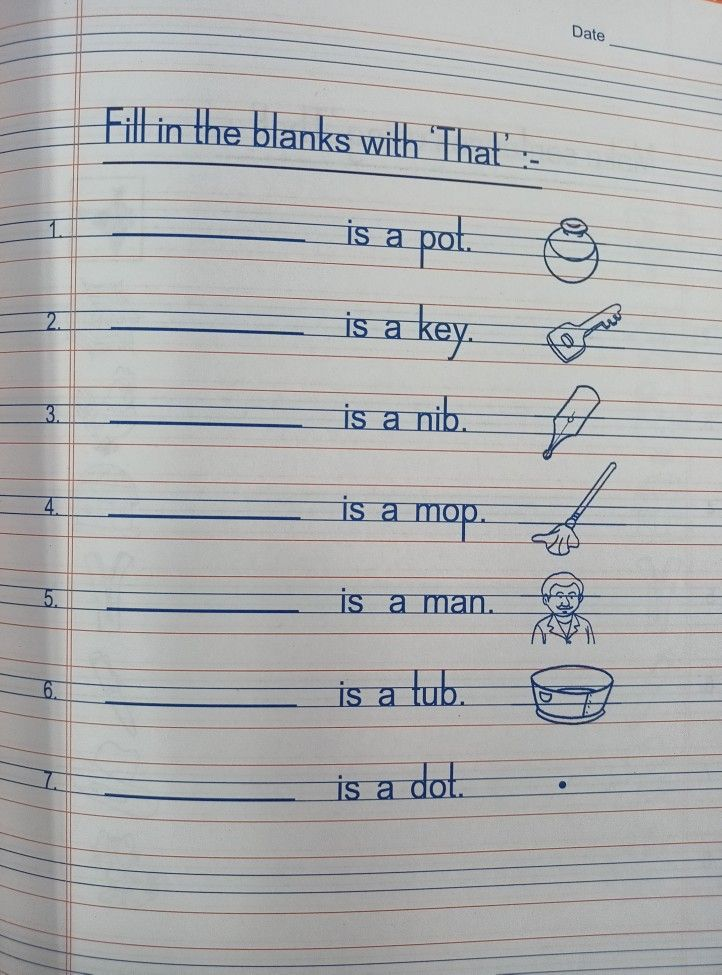

In [8]:
from IPython.display import Image
Image(url=image_url,height=250,width=250)

In [9]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image_url},
            {"type": "text", "text": "Please help a young student understand this homework image. Respond in a kind and simple way, with step-by-step instructions like a tutor."}
        ]
    }
]

In [10]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(model.device, dtype=model.dtype)
input_len = inputs["input_ids"].shape[-1]

outputs = model.generate(**inputs, max_new_tokens=512, disable_compile=True)
text = processor.batch_decode(
    outputs[:, input_len:],
    skip_special_tokens=True,
    clean_up_tokenization_spaces=True
)

In [11]:
text

['Hi there! Let\'s look at this homework together. It looks like you need to put the words in the right place! 😊\n\n**What are we looking for?**\n\nYou see a few pictures of things like a ball, a key, a bottle, a pencil, a person, and a hat. Next to each picture, there are some words. You need to put the word that matches the picture in the blank space.\n\n**Let\'s try them step-by-step:**\n\n1. **The first picture is a ball.**  Look at the words next to it. They are:\n   * **"ball"**\n   * **"key"**\n   * **"bottle"**\n   * **"pencil"**\n   * **"person"**\n   * **"hat"**\n\n   The word that matches the picture of the ball is **"ball"**. So, we write **"ball"** in the first blank space.\n\n2. **Now look at the picture of the key.** The words next to it are:\n   * **"ball"**\n   * **"key"**\n   * **"bottle"**\n   * **"pencil"**\n   * **"person"**\n   * **"hat"**\n\n   The word that matches the picture of the key is **"key"**. So, we write **"key"** in the second blank space.\n\n3. **Nex


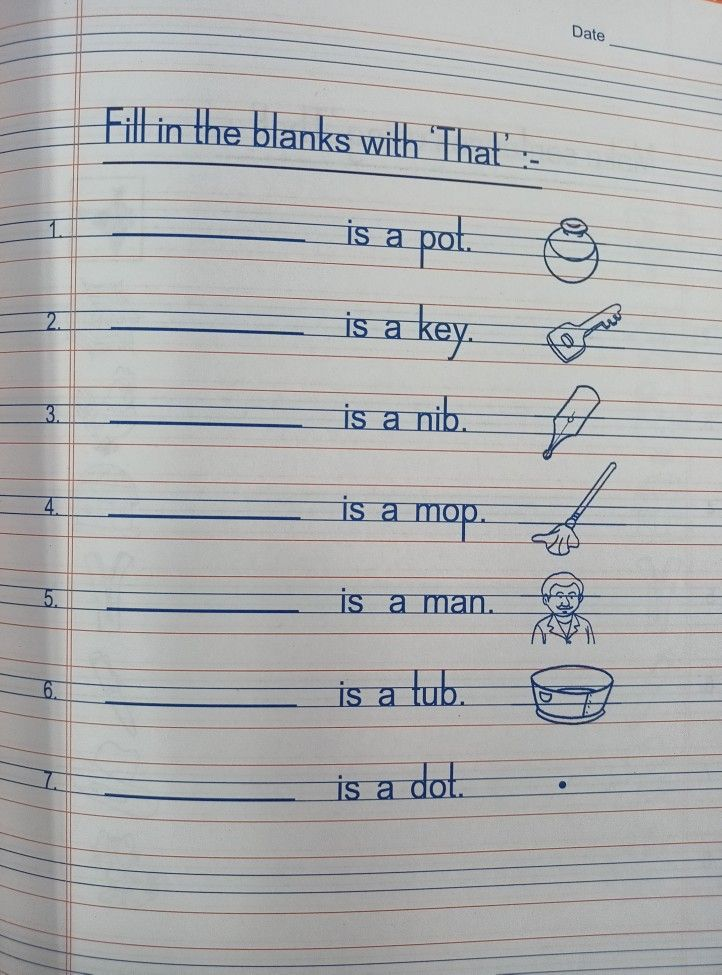

In [12]:
Image(url=image_url,height=250,width=250)